# Carregando Pacotes

In [1]:
library(tidyverse) # data science
library(plotly) # interactive data visualization
library(naniar) # visualize missing data
library(mice) # imputação de dados ausentes
library(scorecard) # discretização de variáveis (muito utilizado em modelos de score de crédito)
library(caret) # machine learning (r base)
library(cvms) # visualização - matriz de confusão mais elegante


Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Warning message:
"package 'tibble' was built under R version 4.0.5"
Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'dplyr' was built under R version 4.0.5"
Warning message:
"package 'forcats' was built under R version 4.0.5"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'plotly' was built under R version 4.0.5"

Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked f

# Leitura de funções

In [2]:
source(paste0(getwd(),'/funcoes/tabela_metadados.R'),encoding='utf-8')
source(paste0(getwd(),'/funcoes/funcoes_analiseunivariada.R'),encoding='utf-8')
source(paste0(getwd(),'/funcoes/funcoes_analisebivariada.R'),encoding='utf-8')


In [3]:
options(digits = 3)
options(max.print = 50)

options(repr.matrix.max.rows = 15)
#options(repr.matrix.max.cols = 30)

# Importando os dados, juntando as tabelas e pré-processamento

In [3]:
#setwd("C:/Users/joaom/OneDrive/JM/Projetos_Extracurriculares/Kaggle/Titanic")
getwd()
options(scipen=999,digits=10)
train <- read.csv("../../train.csv",
                  sep=",", stringsAsFactors = FALSE,
                  na.strings = "")
test <- read.csv("../../test.csv",
                 sep=",", stringsAsFactors = FALSE,
                 na.strings = "")
dim(train)
dim(test)
dim(train)[1]+dim(test)[1]

[1] "c:/Users/joaom/OneDrive/JM/Projetos_Extracurriculares/Kaggle/Titanic/R/Titanic-Kaggle-R"

[1] 891  12

[1] 418  11

[1] 1309

In [4]:
train['Sample'] <- as.factor('train')

test['Survived'] <- NA
test['Sample'] <- as.factor('test')

test <- test[colnames(train)]

In [5]:
df <- rbind(train,test)
df %>% dim()

[1] 1309   13

In [6]:
df[['PassengerId']] <- as.factor(df[['PassengerId']])
df[['Survived']] <- relevel(as.factor(df[['Survived']]),"1")
df[['Pclass']] <- factor(df[['Pclass']],ordered=TRUE)
df[['Sex']] <- as.factor(df[['Sex']])
df[['Cabin']] <- as.factor(df[['Cabin']])
df[['Embarked']] <- as.factor(df[['Embarked']])

# Tabela de Metadados

In [7]:
str(df)

'data.frame':	1309 obs. of  13 variables:
 $ PassengerId: Factor w/ 1309 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "1","0": 2 1 1 1 2 2 2 2 1 1 ...
 $ Pclass     : Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 186 levels "A10","A11","A14",..: NA 107 NA 71 NA NA 164 NA NA NA ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ Sample     : Factor w/ 2 levels "trai

In [8]:
glimpse(df)

Rows: 1,309
Columns: 13
$ PassengerId <fct> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,~
$ Survived    <fct> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1~
$ Pclass      <ord> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3~
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl~
$ Sex         <fct> male, female, female, female, male, male, male, male, fema~
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14, ~
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0~
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0~
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37~
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625,~
$ Cabin       <fct> NA, C85, NA, C123, NA, NA, E46, NA, NA, NA, G6, C103, NA, ~
$ Embarked    <fct> S, C, S, S, S, Q, S, S, S, C, S, S, S, S, S, S, Q, S, S, C~
$ Sample      <f

# Tabela de Metadados (Foco na Análise Exploratória e Tratamento dos dados)

In [9]:
vector_vars_drop <- c('PassengerId','Name','Ticket','Sample')

In [10]:
tabela_metadados(tabela_de_entrada = df[df[['Sample']] == 'train',],
                 sufixo_da_tabela_saida = 'df_train',
                 vector_vars_drop = vector_vars_drop)

index,columns,class,nunique,nunique_with_na,na_value_count,p_na_value_count,p_mode_value_natoo,p_mode_value_notna,drop
<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
1,PassengerId,factor,891,891,0,0.000000000000,0.001122334456,0.001122334456,TRUE
2,Survived,factor,2,2,0,0.000000000000,0.616161616162,0.616161616162,FALSE
3,Pclass,ordered; factor,3,3,0,0.000000000000,0.551066217733,0.551066217733,FALSE
4,Name,character,891,891,0,0.000000000000,0.001122334456,0.001122334456,TRUE
5,Sex,factor,2,2,0,0.000000000000,0.647586980920,0.647586980920,FALSE
6,Age,numeric,88,89,177,0.198653198653,0.198653198653,0.042016806723,FALSE
7,SibSp,integer,7,7,0,0.000000000000,0.682379349046,0.682379349046,FALSE
8,Parch,integer,7,7,0,0.000000000000,0.760942760943,0.760942760943,FALSE
9,Ticket,character,681,681,0,0.000000000000,0.007856341190,0.007856341190,TRUE


In [11]:
tabela_metadados(tabela_de_entrada = df[df[['Sample']] == 'test',],
                 sufixo_da_tabela_saida = 'df_test',
                 vector_vars_drop = vector_vars_drop)

index,columns,class,nunique,nunique_with_na,na_value_count,p_na_value_count,p_mode_value_natoo,p_mode_value_notna,drop
<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
1,PassengerId,factor,418,418,0,0.000000000000,0.002392344498,0.002392344498,TRUE
2,Survived,factor,0,1,418,1.000000000000,1.000000000000,Inf,FALSE
3,Pclass,ordered; factor,3,3,0,0.000000000000,0.521531100478,0.521531100478,FALSE
4,Name,character,418,418,0,0.000000000000,0.002392344498,0.002392344498,TRUE
5,Sex,factor,2,2,0,0.000000000000,0.636363636364,0.636363636364,FALSE
6,Age,numeric,79,80,86,0.205741626794,0.205741626794,0.051204819277,FALSE
7,SibSp,integer,7,7,0,0.000000000000,0.677033492823,0.677033492823,FALSE
8,Parch,integer,8,8,0,0.000000000000,0.775119617225,0.775119617225,FALSE
9,Ticket,character,363,363,0,0.000000000000,0.011961722488,0.011961722488,TRUE


In [12]:
tabela_metadados(tabela_de_entrada = df,
                 sufixo_da_tabela_saida = 'df',
                 vector_vars_drop = vector_vars_drop)

index,columns,class,nunique,nunique_with_na,na_value_count,p_na_value_count,p_mode_value_natoo,p_mode_value_notna,drop
<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
1,PassengerId,factor,1309,1309,0,0.0000000000000,0.0007639419404,0.0007639419404,TRUE
2,Survived,factor,2,3,418,0.3193277310924,0.4194041252865,0.6161616161616,FALSE
3,Pclass,ordered; factor,3,3,0,0.0000000000000,0.5416348357525,0.5416348357525,FALSE
4,Name,character,1307,1307,0,0.0000000000000,0.0015278838808,0.0015278838808,TRUE
5,Sex,factor,2,2,0,0.0000000000000,0.6440030557678,0.6440030557678,FALSE
6,Age,numeric,98,99,263,0.2009167303285,0.2009167303285,0.0449330783939,FALSE
7,SibSp,integer,7,7,0,0.0000000000000,0.6806722689076,0.6806722689076,FALSE
8,Parch,integer,8,8,0,0.0000000000000,0.7654698242934,0.7654698242934,FALSE
9,Ticket,character,929,929,0,0.0000000000000,0.0084033613445,0.0084033613445,TRUE


# Análise Descritiva e Exploratória


## Análise de Dados Faltantes

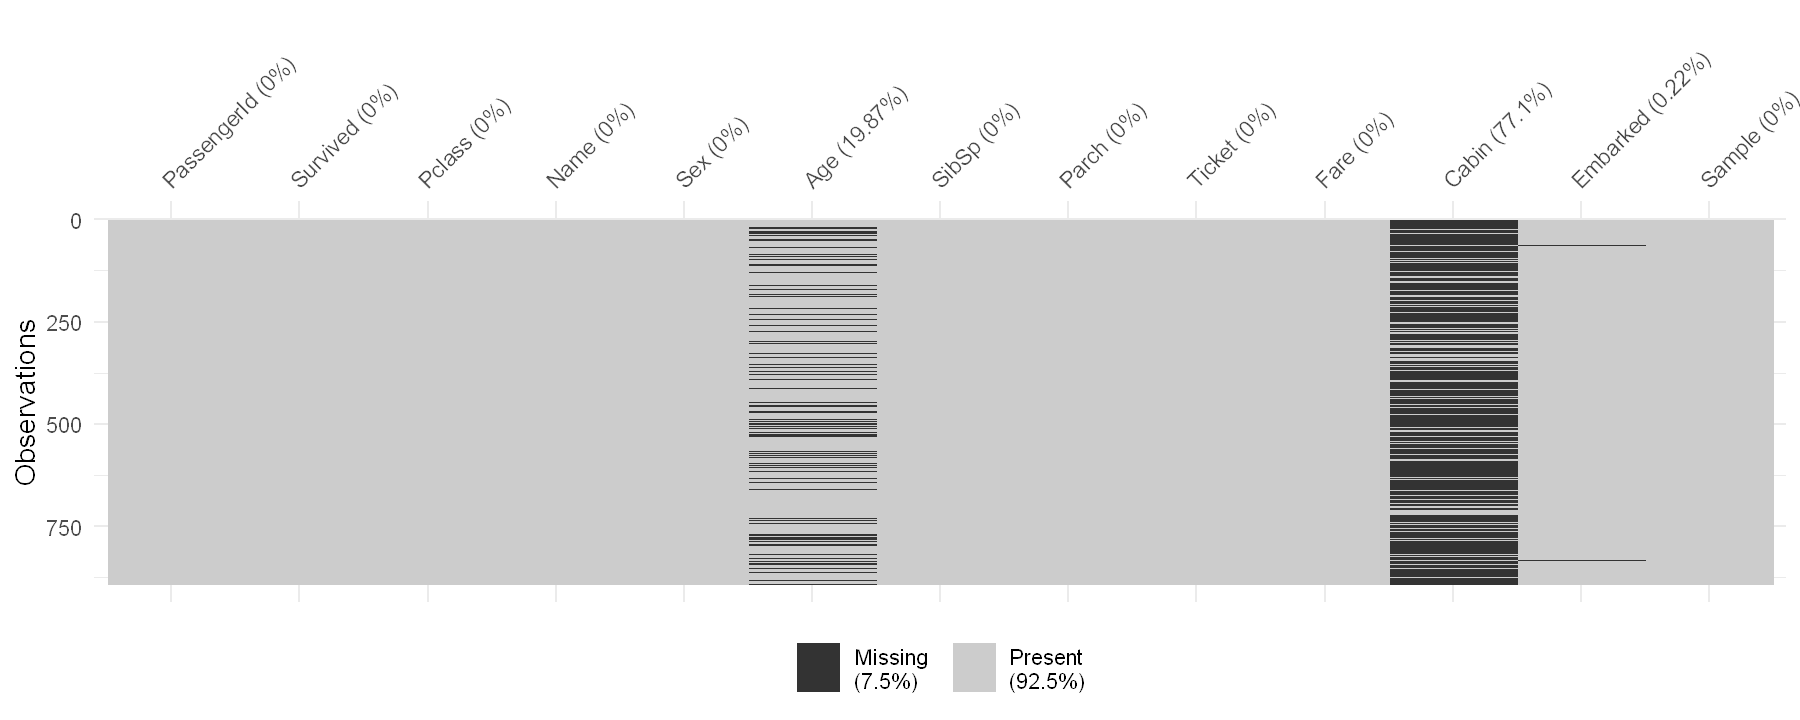

In [13]:
naniar::vis_miss(df[df[['Sample']] == 'train',])

## Análise de Correlação

In [14]:
table_train_for_cor <- df[ df[['Sample']] == 'train', metadata_table_df[metadata_table_df[['drop']] == FALSE, 'columns'] ]

# http://demosophy.org/heterogeneous-correlation-matrix/
rp_train <- polycor::hetcor(table_train_for_cor,std.err = FALSE,
                            use="pairwise.complete.obs",
                            pd=FALSE)
# rp_train[c('correlations','type')] # correlations e type (separados)
rp_train_modified <- rp_train[['correlations']]
rp_train_modified <- round(rp_train_modified,5)
rp_train_modified[upper.tri(rp_train_modified)] <- rp_train[['type']][upper.tri(rp_train_modified)]

Warning message in polychor(x, y, ML = ML, std.err = std.err):
"39 rows with zero marginals removed"
Warning message in polychor(x, y, ML = ML, std.err = std.err):
"39 rows with zero marginals removed"
Warning message in log(P):
"NaNs produced"
Warning message in optimise(f, interval = c(-maxcor, maxcor)):
"NA/Inf replaced by maximum positive value"
Warning message in polychor(x, y, ML = ML, std.err = std.err):
"39 rows with zero marginals removed"
Warning message in polychor(x, y, ML = ML, std.err = std.err):
"40 columns with zero marginals removed"


In [15]:
table_test_for_cor <- df[ df[['Sample']] == 'test', metadata_table_df[metadata_table_df[['drop']] == FALSE, 'columns'] ]

# http://demosophy.org/heterogeneous-correlation-matrix/
rp_test <- polycor::hetcor(table_test_for_cor,std.err = FALSE,
                            use="pairwise.complete.obs",
                            pd=FALSE)
# rp_test[c('correlations','type')] # correlations e type (separados)
rp_test_modified <- rp_test[['correlations']]
rp_test_modified <- round(rp_test_modified,5)
rp_test_modified[upper.tri(rp_test_modified)] <- rp_test[['type']][upper.tri(rp_test_modified)]


Warning message in hetcor.data.frame(table_test_for_cor, std.err = FALSE, use = "pairwise.complete.obs", :
"no cases for pair 1, 2"
Warning message in hetcor.data.frame(table_test_for_cor, std.err = FALSE, use = "pairwise.complete.obs", :
"no cases for pair 1, 3"
Warning message in hetcor.data.frame(table_test_for_cor, std.err = FALSE, use = "pairwise.complete.obs", :
"no cases for pair 1, 4"
Warning message in hetcor.data.frame(table_test_for_cor, std.err = FALSE, use = "pairwise.complete.obs", :
"no cases for pair 1, 5"
Warning message in hetcor.data.frame(table_test_for_cor, std.err = FALSE, use = "pairwise.complete.obs", :
"no cases for pair 1, 6"
Warning message in hetcor.data.frame(table_test_for_cor, std.err = FALSE, use = "pairwise.complete.obs", :
"no cases for pair 1, 7"
Warning message in hetcor.data.frame(table_test_for_cor, std.err = FALSE, use = "pairwise.complete.obs", :
"no cases for pair 1, 8"
Warning message in polychor(x, y, ML = ML, std.err = std.err):
"110 rows wit

In [16]:
rp_train_modified

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1,Polychoric,Polychoric,Polyserial,Polyserial,Polyserial,Polyserial,Polychoric,Polychoric
Pclass,0.48056,1,Polychoric,Polyserial,Polyserial,Polyserial,Polyserial,Polychoric,Polychoric
Sex,0.76091,0.19927,1,Polyserial,Polyserial,Polyserial,Polyserial,Polychoric,Polychoric
Age,0.09778,-0.42742,0.11942,1,Pearson,Pearson,Pearson,Polyserial,Polyserial
SibSp,0.04498,0.09802,-0.14748,-0.30825,1,Pearson,Pearson,Polyserial,Polyserial
Parch,-0.10395,0.02176,-0.31583,-0.18912,0.41484,1,Pearson,Polyserial,Polyserial
Fare,-0.32765,-0.64831,-0.23458,0.09607,0.15965,0.21622,1,Polyserial,Polyserial
Cabin,-0.0335,0.81259,-0.12375,-0.15648,0.06614,0.00919,-0.2624,1,Polychoric
Embarked,0.26736,0.19344,0.18709,-0.04508,0.09023,0.05297,-0.29638,0.30712,1


In [17]:
rp_test_modified

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1,,,,,,,,
Pclass,NA,1,Polychoric,Polyserial,Polyserial,Polyserial,Polyserial,Polychoric,Polychoric
Sex,NA,0.15598,1,Polyserial,Polyserial,Polyserial,Polyserial,Polychoric,Polychoric
Age,NA,-0.56235,0.00002,1,Pearson,Pearson,Pearson,Polyserial,Polyserial
SibSp,NA,0.00127,-0.12807,-0.09159,1,Pearson,Pearson,Polyserial,Polyserial
Parch,NA,0.02186,-0.2039,-0.06125,0.30689,1,Pearson,Polyserial,Polyserial
Fare,NA,-0.67365,-0.24534,0.33793,0.17154,0.23005,1,Polyserial,Polyserial
Cabin,NA,0.89534,0.03681,-0.26728,-0.09806,-0.04412,-0.23547,1,Polychoric
Embarked,NA,0.2764,0.13025,-0.22579,0.06561,0.06794,-0.32,0.11378,1


# Análise Univariada
## Sample

In [18]:
calcula_tab_frequencia(tabela_de_entrada=df,
                        nome_variavel='Sample')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
train,891,68.07,891,68.07
test,418,31.93,1309,100.00


[[1]]
[1] "Nome do gráfico: gg_count_propSample"

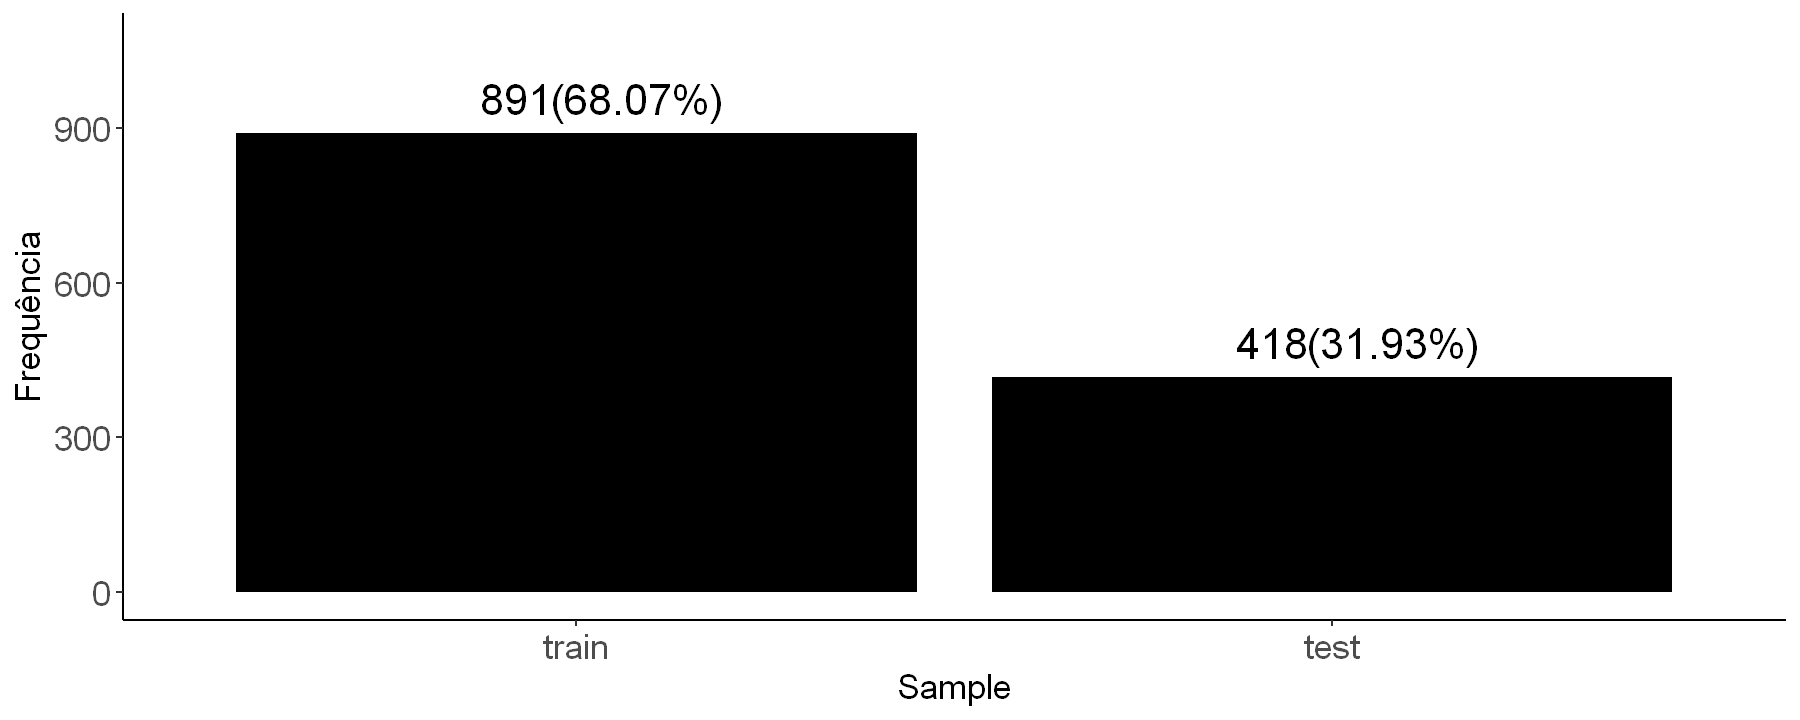

In [21]:
grafico_tab_frequencia(table_count_prop=table_count_propSample,
                        nome_variavel='Sample',
                        cor_grafico='black',
                        hjust_e=-0.08,hjust_d=0.08,
                        size=6,tx1=0.1,tx2=1.2)
gg_count_propSample <- gg_count_propSample + theme(axis.text=element_text(size=14),
                                                    axis.title=element_text(size=14))
gg_count_propSample

## Survived (Resposta)

In [22]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Survived')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
1,342,38.38,342,38.38
0,549,61.62,891,100.00


[[1]]
[1] "Nome do gráfico: gg_count_propSurvived"

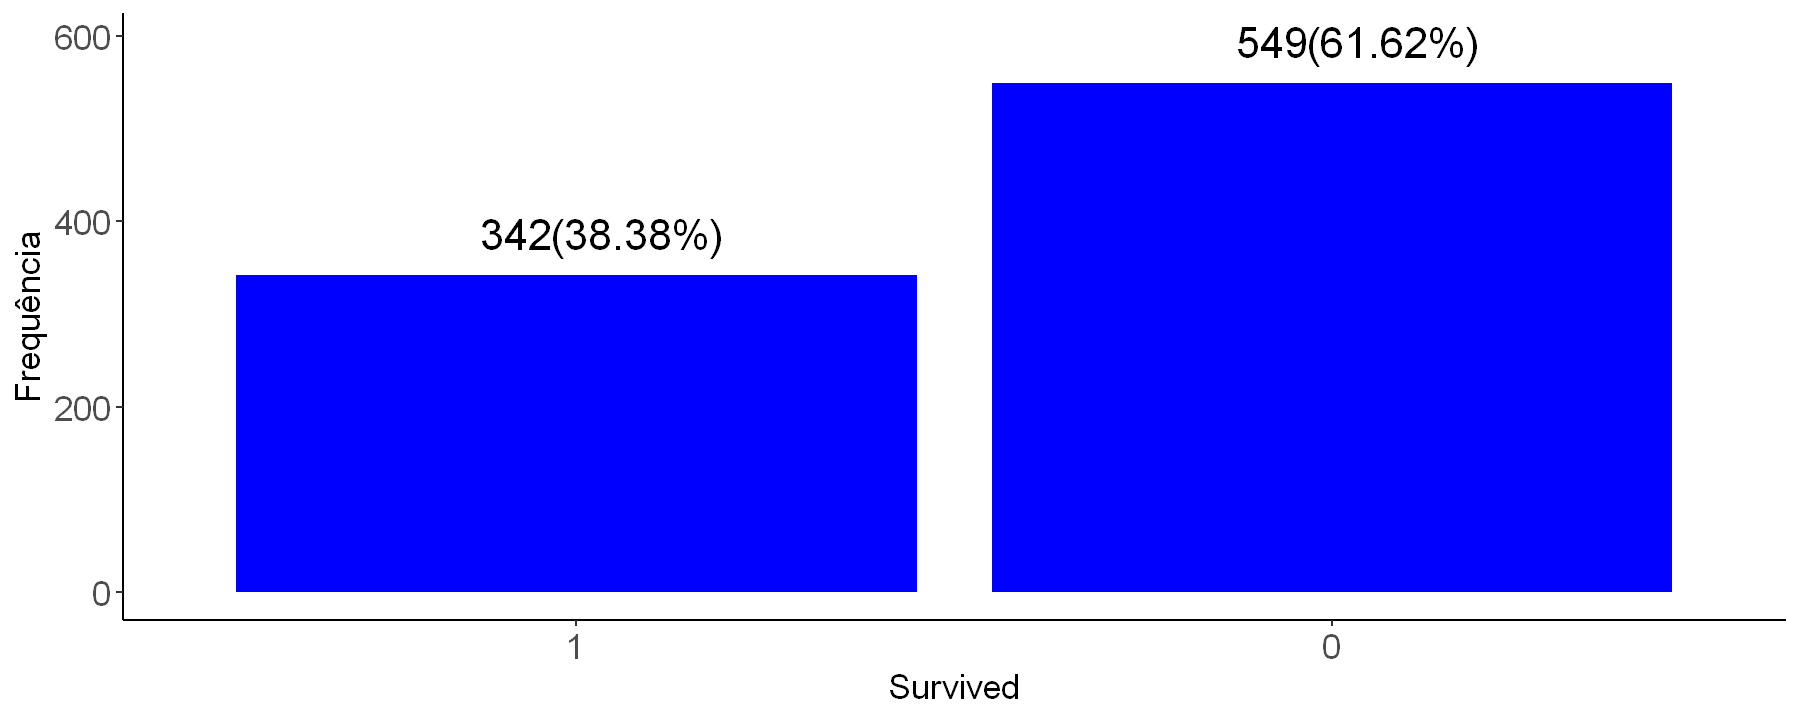

In [23]:
grafico_tab_frequencia(table_count_prop=table_count_propSurvived,
                        nome_variavel='Survived',
                        cor_grafico='blue',
                        hjust_e=-0.08,hjust_d=0.08,
                        size=6,tx1=0.1,tx2=1.05)
gg_count_propSurvived <- gg_count_propSurvived + theme(axis.text=element_text(size=14),
                                                    axis.title=element_text(size=14))
gg_count_propSurvived

# Análise Univariada e Bivariada

## Pclass

In [24]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Pclass')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
1,216,24.24,216,24.24
2,184,20.65,400,44.89
3,491,55.11,891,100.00


[[1]]
[1] "Nome do gráfico: gg_count_propPclass"

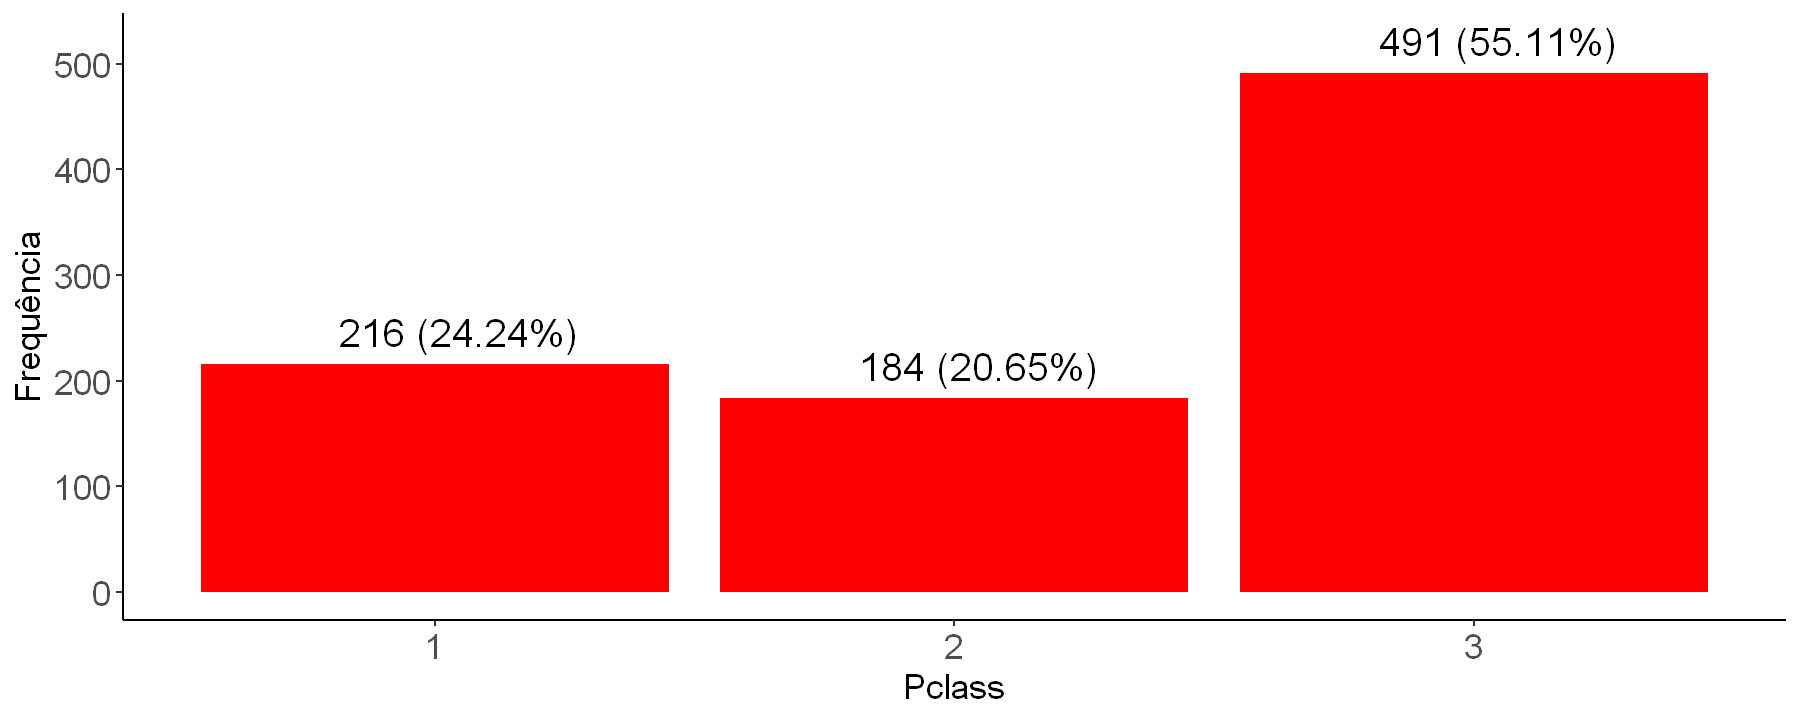

In [25]:
grafico_tab_frequencia(table_count_prop=table_count_propPclass,
                        nome_variavel='Pclass',
                        cor_grafico='red',
                        hjust_e=-0.12,hjust_d=0.12,
                        size=5.5,tx1=0.1,tx2=1.05)
gg_count_propPclass <- gg_count_propPclass + theme(axis.text=element_text(size=14),
                                                    axis.title=element_text(size=14))
gg_count_propPclass

## Survived x Pclass

In [26]:
calcula_tab_frequencia_bivariada(tabela_de_entrada=df[df[['Sample']] == 'train',],
                                 nome_variavel1='Survived',
                                 nome_variavel2='Pclass')

Survived,Pclass,Frequency,sum_x,cumsum_sum_x,percentage_sum_x,Frequency_div_sum_x,percentage_Frequency_div_sum_x
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,136,216,216,24.2,0.6296296296,63.0
0,1,80,216,216,24.2,0.3703703704,37.0
1,2,87,184,400,20.7,0.4728260870,47.3
0,2,97,184,400,20.7,0.5271739130,52.7
1,3,119,491,891,55.1,0.2423625255,24.2
0,3,372,491,891,55.1,0.7576374745,75.8


[1] "Para retirar as porcentagens, use legend = FALSE ou size = 0!"


[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_Pclass"

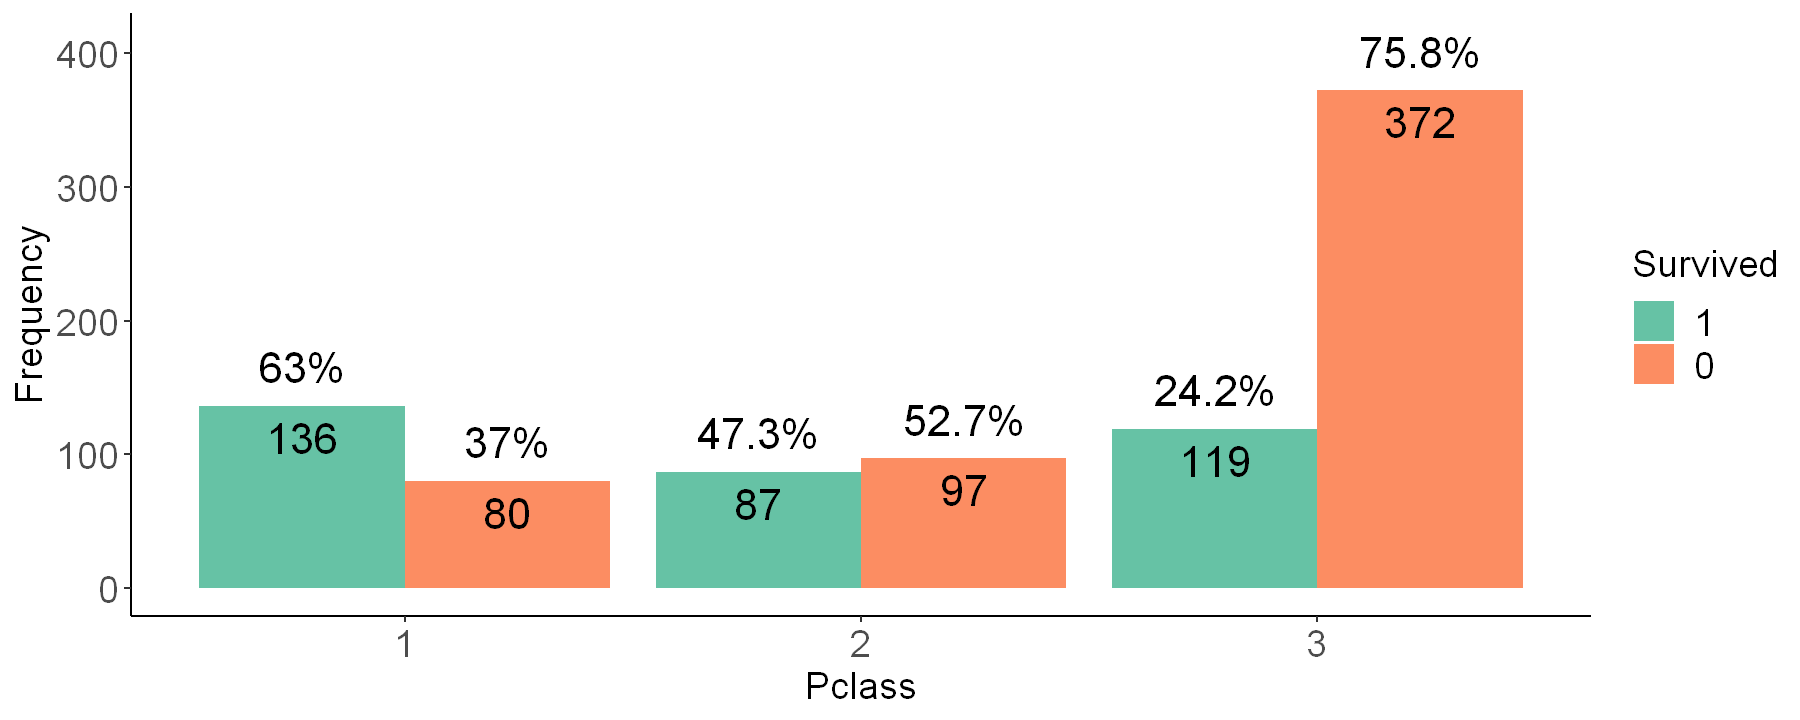

In [27]:
grafico_tab_frequencia_bivariada2(table_count_prop=table_count_propSurvived_Pclass,
                                  nome_variavel1='Survived',
                                  nome_variavel2='Pclass',
                                  tx1=0.2,tx2=1.1,size=6,legend=TRUE)

gg_count_propSurvived_Pclass <- gg_count_propSurvived_Pclass + theme(axis.text=element_text(size=15),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_Pclass

[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_Pclass"

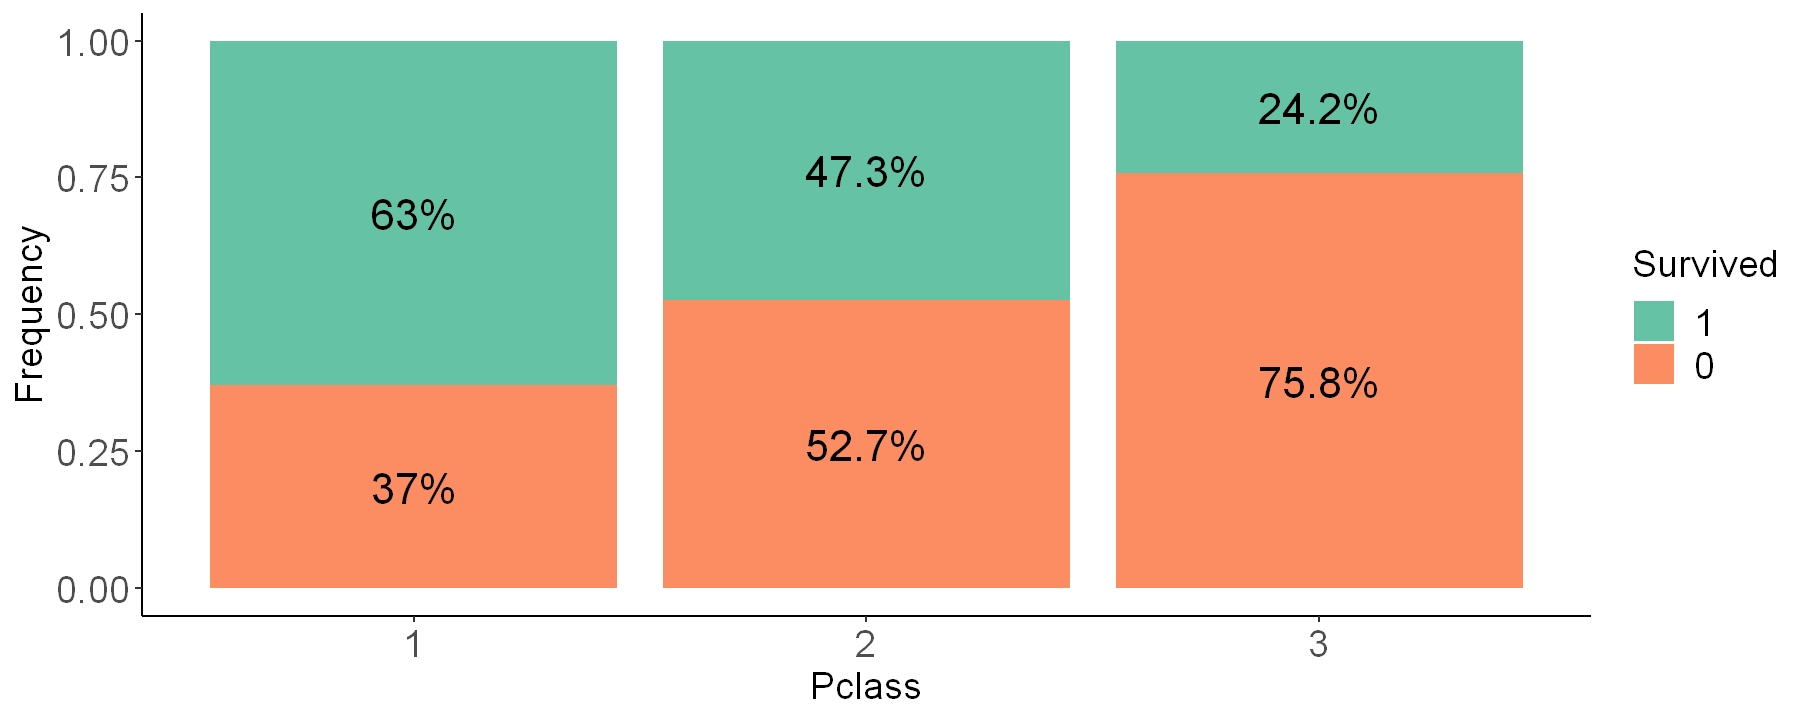

In [28]:
grafico_tab_frequencia_bivariada3(table_count_prop=table_count_propSurvived_Pclass,
                                  nome_variavel1='Survived',
                                  nome_variavel2='Pclass',
                                  size=6,tx=0,legend=TRUE)
gg_count_propSurvived_Pclass <- gg_count_propSurvived_Pclass + theme(axis.text=element_text(size=15),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_Pclass

## Sex

In [29]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Sex')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
female,314,35.24,314,35.24
male,577,64.76,891,100.00


[[1]]
[1] "Nome do gráfico: gg_count_propSex"

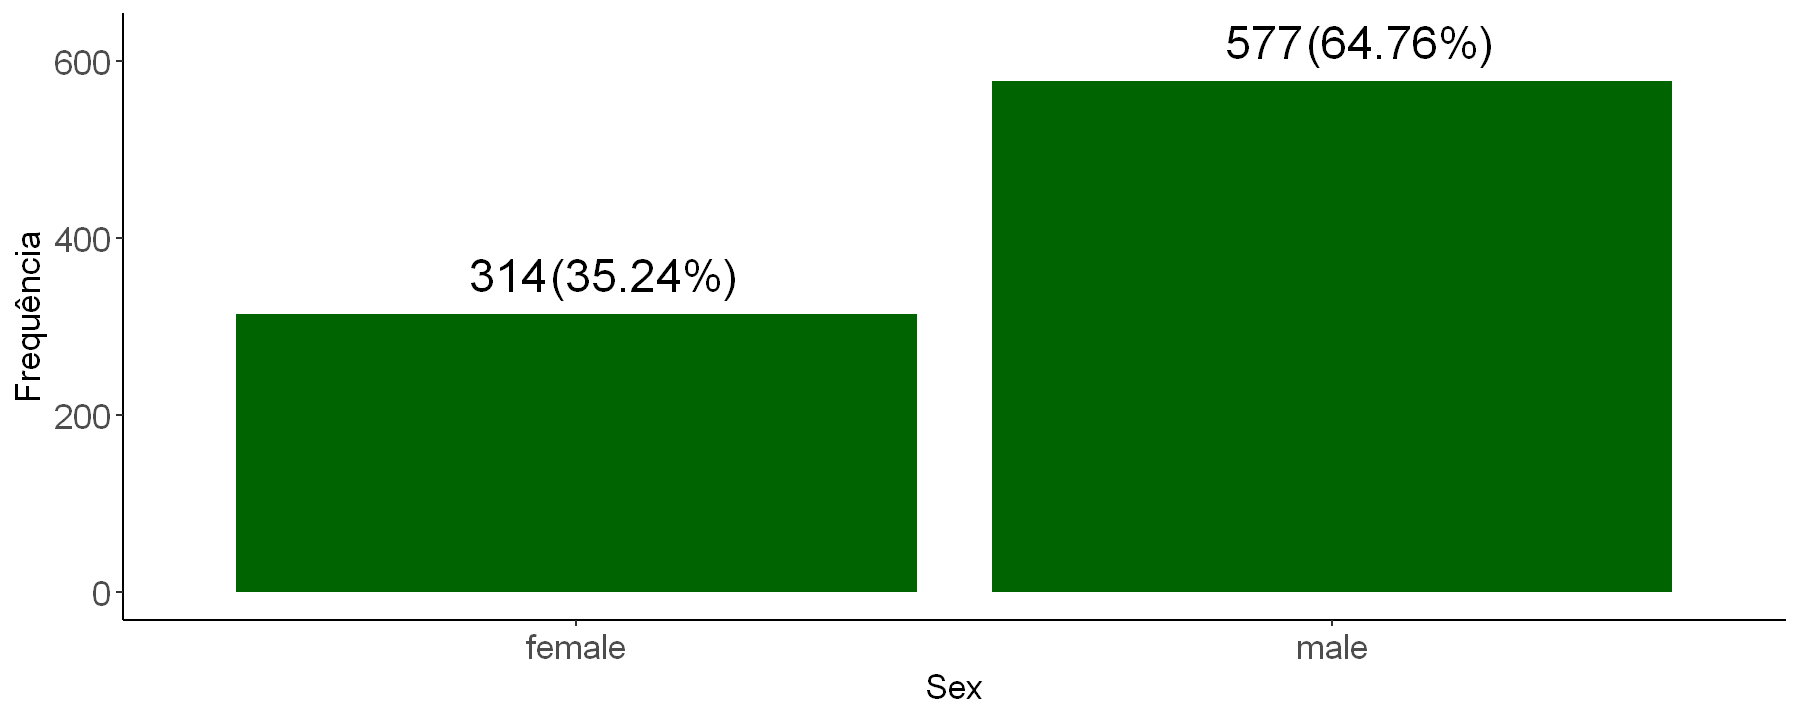

In [30]:
grafico_tab_frequencia(table_count_prop=table_count_propSex,
                        nome_variavel='Sex',
                        cor_grafico='darkgreen',
                        hjust_e=-0.09,hjust_d=0.09,
                        size=6.5,tx1=0.1,tx2=1.05)
gg_count_propSex <- gg_count_propSex + theme(axis.text=element_text(size=14),
                                            axis.title=element_text(size=14))
gg_count_propSex

## Survived x Sex

In [31]:
calcula_tab_frequencia_bivariada(tabela_de_entrada=df[df[['Sample']] == 'train',],
                                 nome_variavel1='Survived',
                                 nome_variavel2='Sex')

Survived,Sex,Frequency,sum_x,cumsum_sum_x,percentage_sum_x,Frequency_div_sum_x,percentage_Frequency_div_sum_x
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,female,233,314,314,35.2,0.7420382166,74.2
0,female,81,314,314,35.2,0.2579617834,25.8
1,male,109,577,891,64.8,0.1889081456,18.9
0,male,468,577,891,64.8,0.8110918544,81.1


[1] "Para retirar as porcentagens, use legend = FALSE ou size = 0!"


[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_Sex"

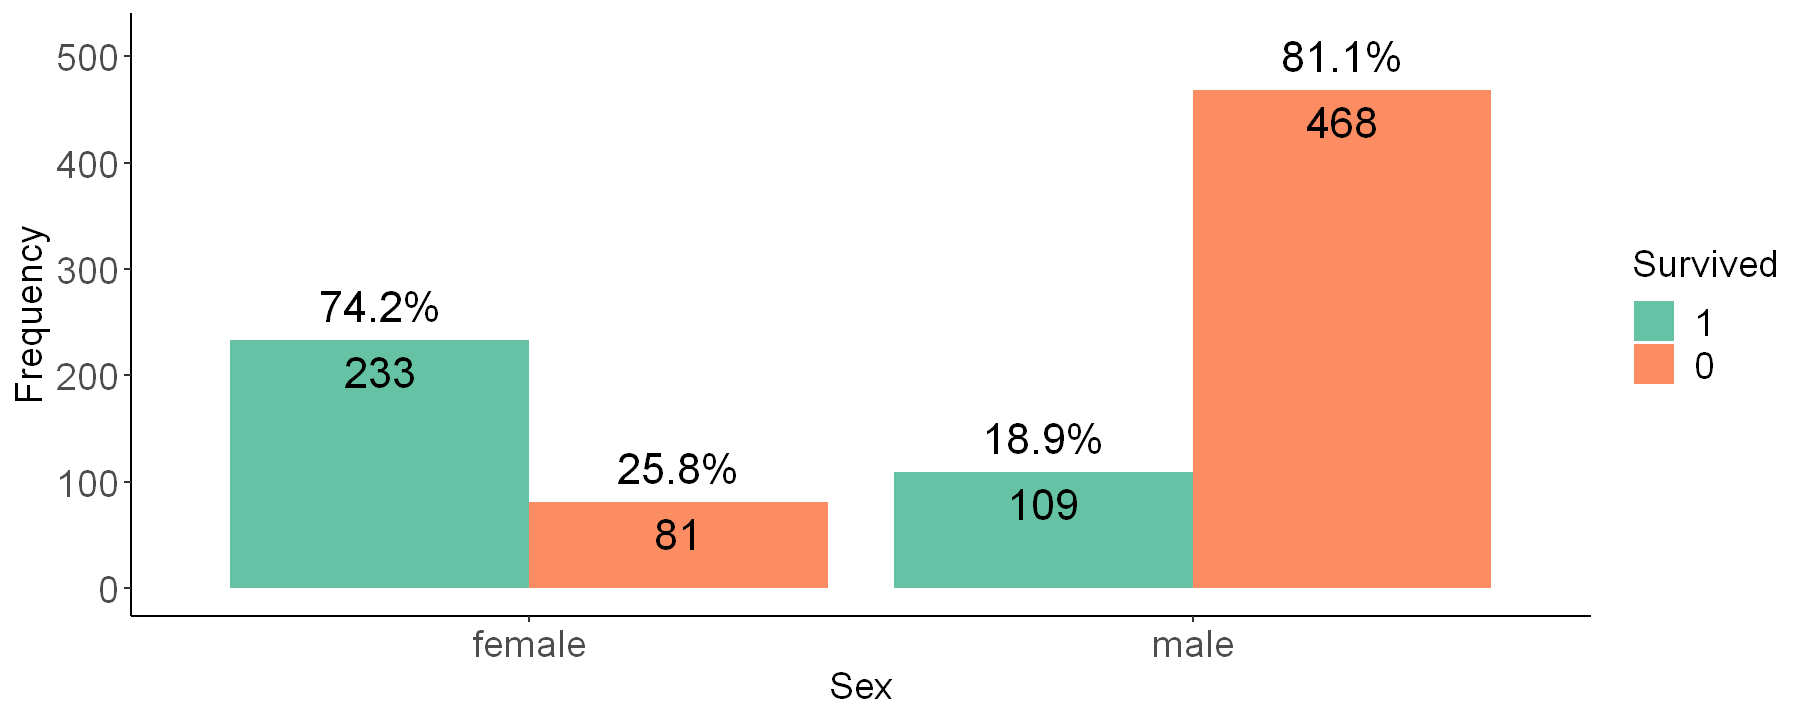

In [32]:
grafico_tab_frequencia_bivariada2(table_count_prop=table_count_propSurvived_Sex,
                                  nome_variavel1='Survived',
                                  nome_variavel2='Sex',
                                  tx1=0.15,tx2=1.1,size=6,legend=TRUE)

gg_count_propSurvived_Sex <- gg_count_propSurvived_Sex + theme(axis.text=element_text(size=15),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_Sex

[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_Sex"

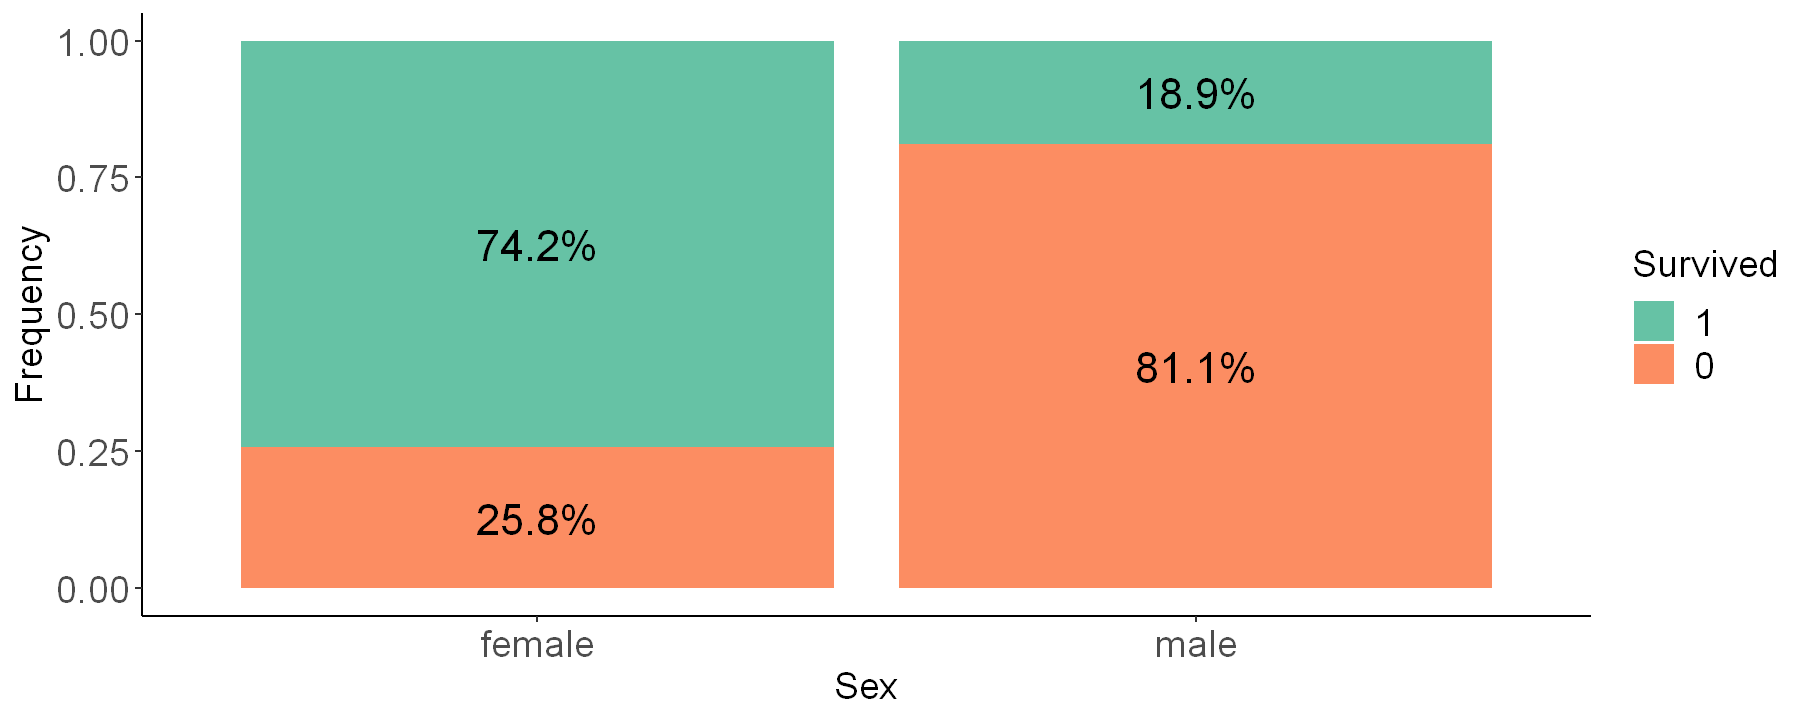

In [33]:
grafico_tab_frequencia_bivariada3(table_count_prop=table_count_propSurvived_Sex,
                                  nome_variavel1='Survived',
                                  nome_variavel2='Sex',
                                  size=6,tx=0,legend=TRUE)
gg_count_propSurvived_Sex <- gg_count_propSurvived_Sex + theme(axis.text=element_text(size=15),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_Sex

## SibSp

In [34]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='SibSp')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
0,608,68.24,608,68.24
1,209,23.46,817,91.69
2,28,3.14,845,94.84
3,16,1.80,861,96.63
4,18,2.02,879,98.65
5,5,0.56,884,99.21
8,7,0.79,891,100.00


[[1]]
[1] "Nome do gráfico: gg_count_propSibSp"

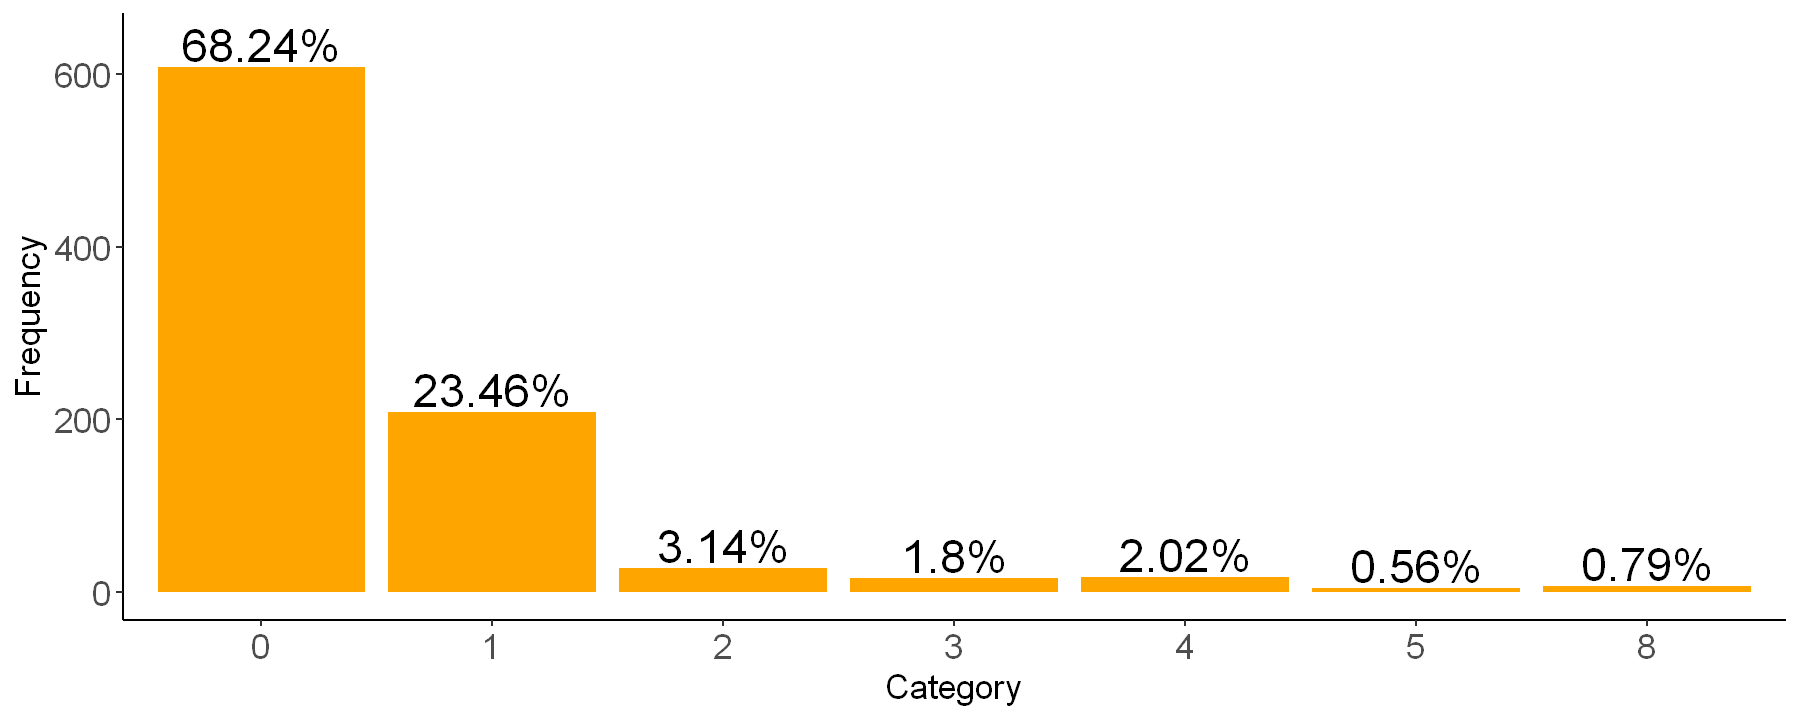

In [35]:
grafico_tab_frequencia2(table_count_prop=table_count_propSibSp,
                        nome_variavel='SibSp',
                        cor_grafico='orange',
                        size=6.5,tx1=0.2,tx2=1.05,
                        coord_flip=FALSE)
gg_count_propSibSp <- gg_count_propSibSp + theme(axis.text=element_text(size=14),
                                            axis.title=element_text(size=14))
gg_count_propSibSp

## Survived x SibSp

In [36]:
calcula_tab_frequencia_bivariada(tabela_de_entrada=df[df[['Sample']] == 'train',],
                                 nome_variavel1='Survived',
                                 nome_variavel2='SibSp')

Survived,SibSp,Frequency,sum_x,cumsum_sum_x,percentage_sum_x,Frequency_div_sum_x,percentage_Frequency_div_sum_x
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,0,210,608,608,68.2,0.3453947368,34.5
0,0,398,608,608,68.2,0.6546052632,65.5
1,1,112,209,817,23.5,0.5358851675,53.6
0,1,97,209,817,23.5,0.4641148325,46.4
1,2,13,28,845,3.1,0.4642857143,46.4
0,2,15,28,845,3.1,0.5357142857,53.6
1,3,4,16,861,1.8,0.2500000000,25.0
0,3,12,16,861,1.8,0.7500000000,75.0
1,4,3,18,879,2.0,0.1666666667,16.7


[1] "Para retirar as porcentagens, use legend = FALSE ou size = 0!"


[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_SibSp"

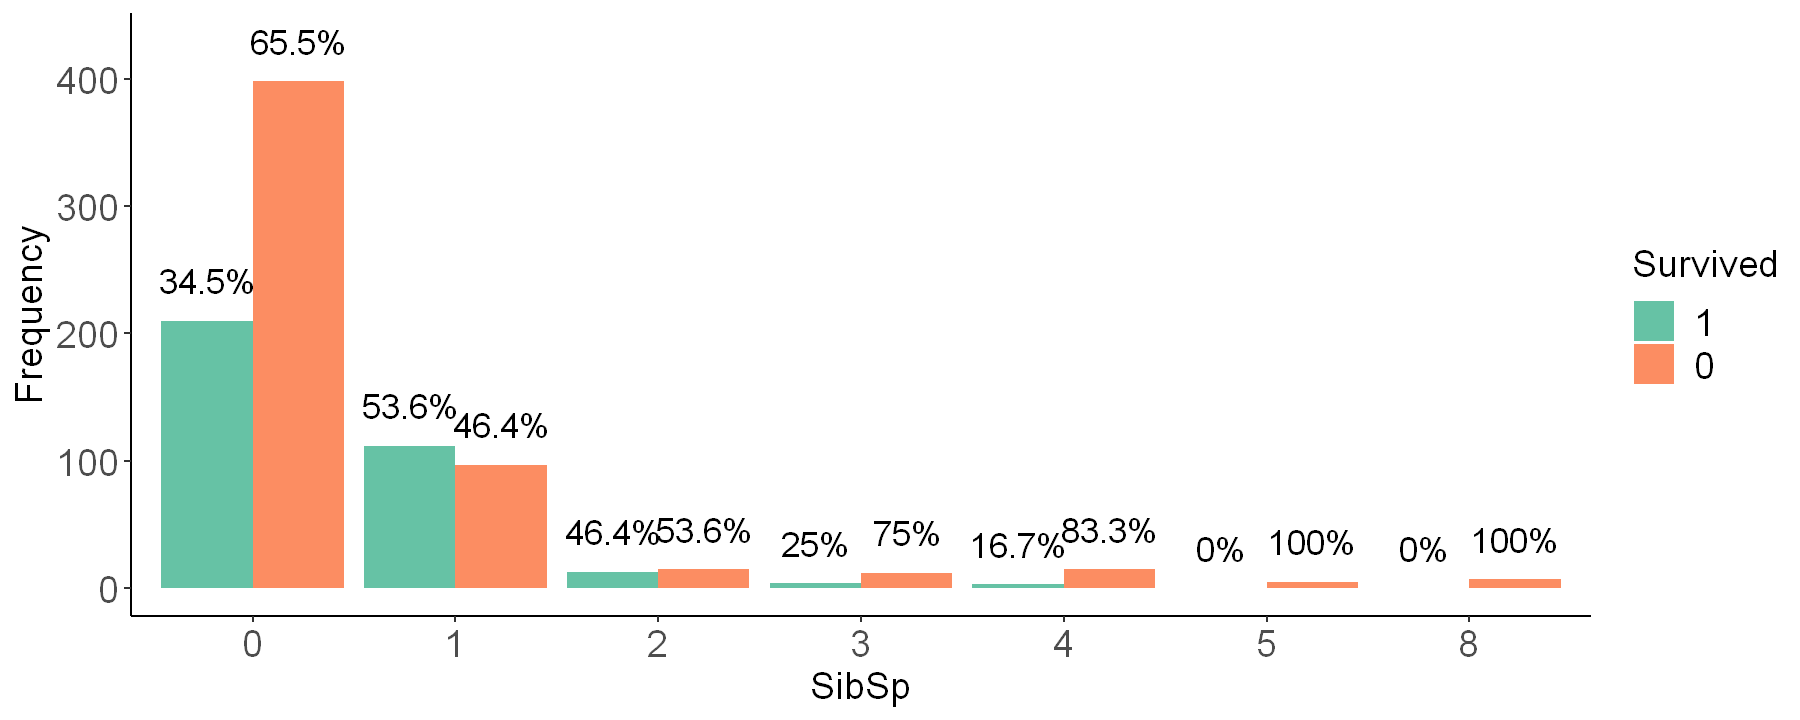

In [37]:
grafico_tab_frequencia_bivariada2(table_count_prop=table_count_propSurvived_SibSp,
                                  nome_variavel1='Survived',
                                  nome_variavel2='SibSp',
                                  tx1=0.5,tx2=1,size=4.8,
                                  legend=TRUE,percentage=TRUE,count=FALSE)

gg_count_propSurvived_SibSp <- gg_count_propSurvived_SibSp + theme(axis.text=element_text(size=15),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_SibSp

[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_SibSp"

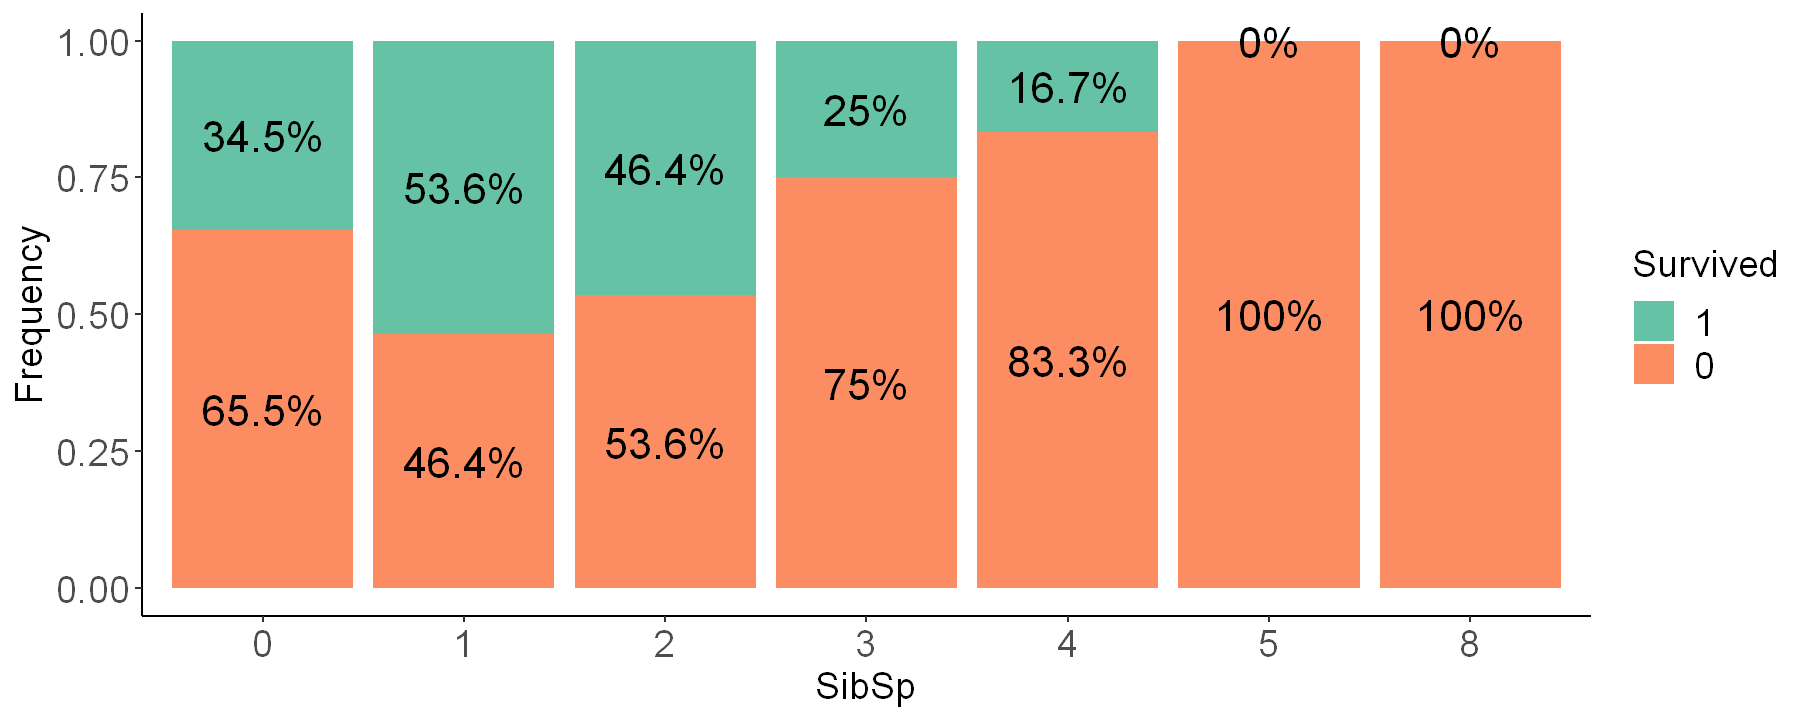

In [38]:
grafico_tab_frequencia_bivariada3(table_count_prop=table_count_propSurvived_SibSp,
                                  nome_variavel1='Survived',
                                  nome_variavel2='SibSp',
                                  size=6,tx=0,legend=TRUE)
gg_count_propSurvived_SibSp <- gg_count_propSurvived_SibSp + theme(axis.text=element_text(size=15),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_SibSp

## Parch

In [39]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Parch')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
0,678,76.09,678,76.09
1,118,13.24,796,89.34
2,80,8.98,876,98.32
3,5,0.56,881,98.88
4,4,0.45,885,99.33
5,5,0.56,890,99.89
6,1,0.11,891,100.00


[[1]]
[1] "Nome do gráfico: gg_count_propParch"

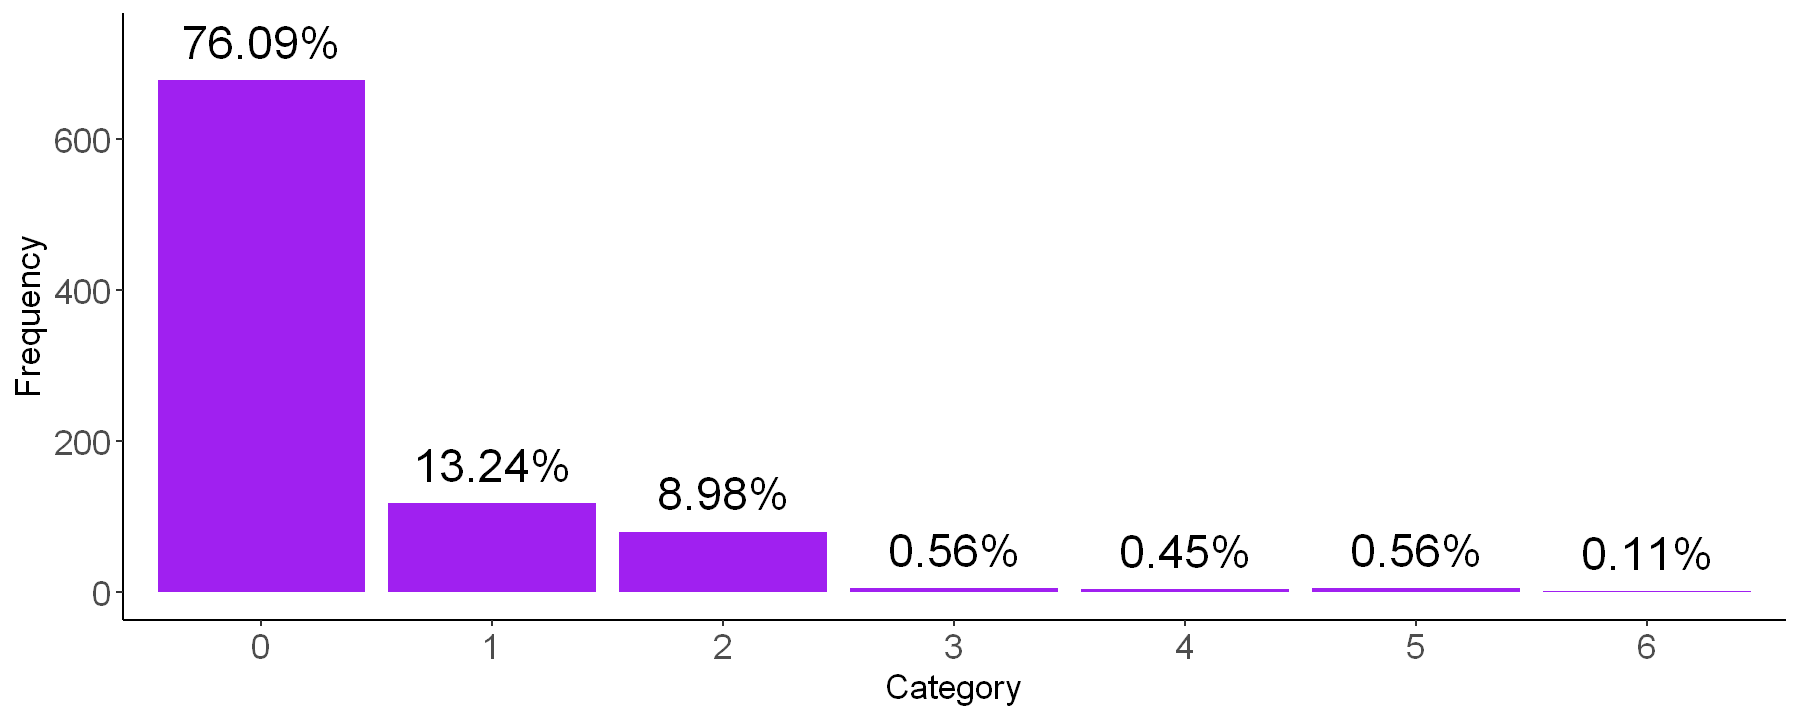

In [40]:
grafico_tab_frequencia2(table_count_prop=table_count_propParch,
                        nome_variavel='Parch',
                        cor_grafico='purple',
                        size=6.5,tx1=0.4,tx2=1.05,
                        coord_flip=FALSE)
gg_count_propParch <- gg_count_propParch + theme(axis.text=element_text(size=14),
                                            axis.title=element_text(size=14))
gg_count_propParch

## Survived x Parch

In [41]:
calcula_tab_frequencia_bivariada(tabela_de_entrada=df[df[['Sample']] == 'train',],
                                 nome_variavel1='Survived',
                                 nome_variavel2='Parch')

Survived,Parch,Frequency,sum_x,cumsum_sum_x,percentage_sum_x,Frequency_div_sum_x,percentage_Frequency_div_sum_x
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,0,233,678,678,76.1,0.3436578171,34.4
0,0,445,678,678,76.1,0.6563421829,65.6
1,1,65,118,796,13.2,0.5508474576,55.1
0,1,53,118,796,13.2,0.4491525424,44.9
1,2,40,80,876,9.0,0.5000000000,50.0
0,2,40,80,876,9.0,0.5000000000,50.0
1,3,3,5,881,0.6,0.6000000000,60.0
0,3,2,5,881,0.6,0.4000000000,40.0
1,4,0,4,885,0.4,0.0000000000,0.0


[1] "Para retirar as porcentagens, use legend = FALSE ou size = 0!"


[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_Parch"

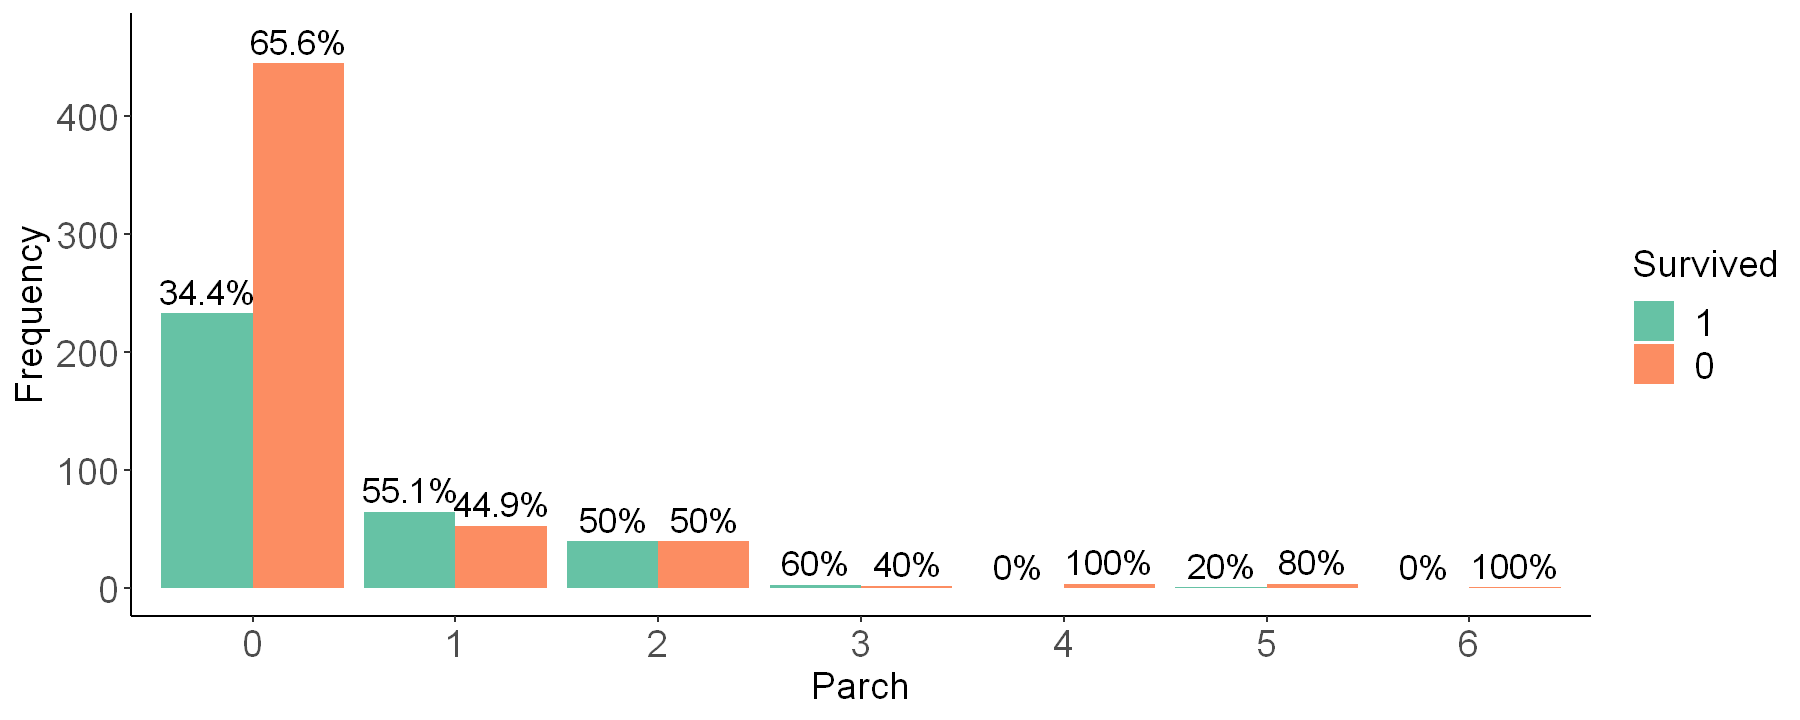

In [42]:
grafico_tab_frequencia_bivariada2(table_count_prop=table_count_propSurvived_Parch,
                                  nome_variavel1='Survived',
                                  nome_variavel2='Parch',
                                  tx1=0.3,tx2=0.7,size=4.8,
                                  legend=TRUE,percentage=TRUE,count=FALSE)

gg_count_propSurvived_Parch <- gg_count_propSurvived_Parch + theme(axis.text=element_text(size=15),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_Parch

[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_Parch"

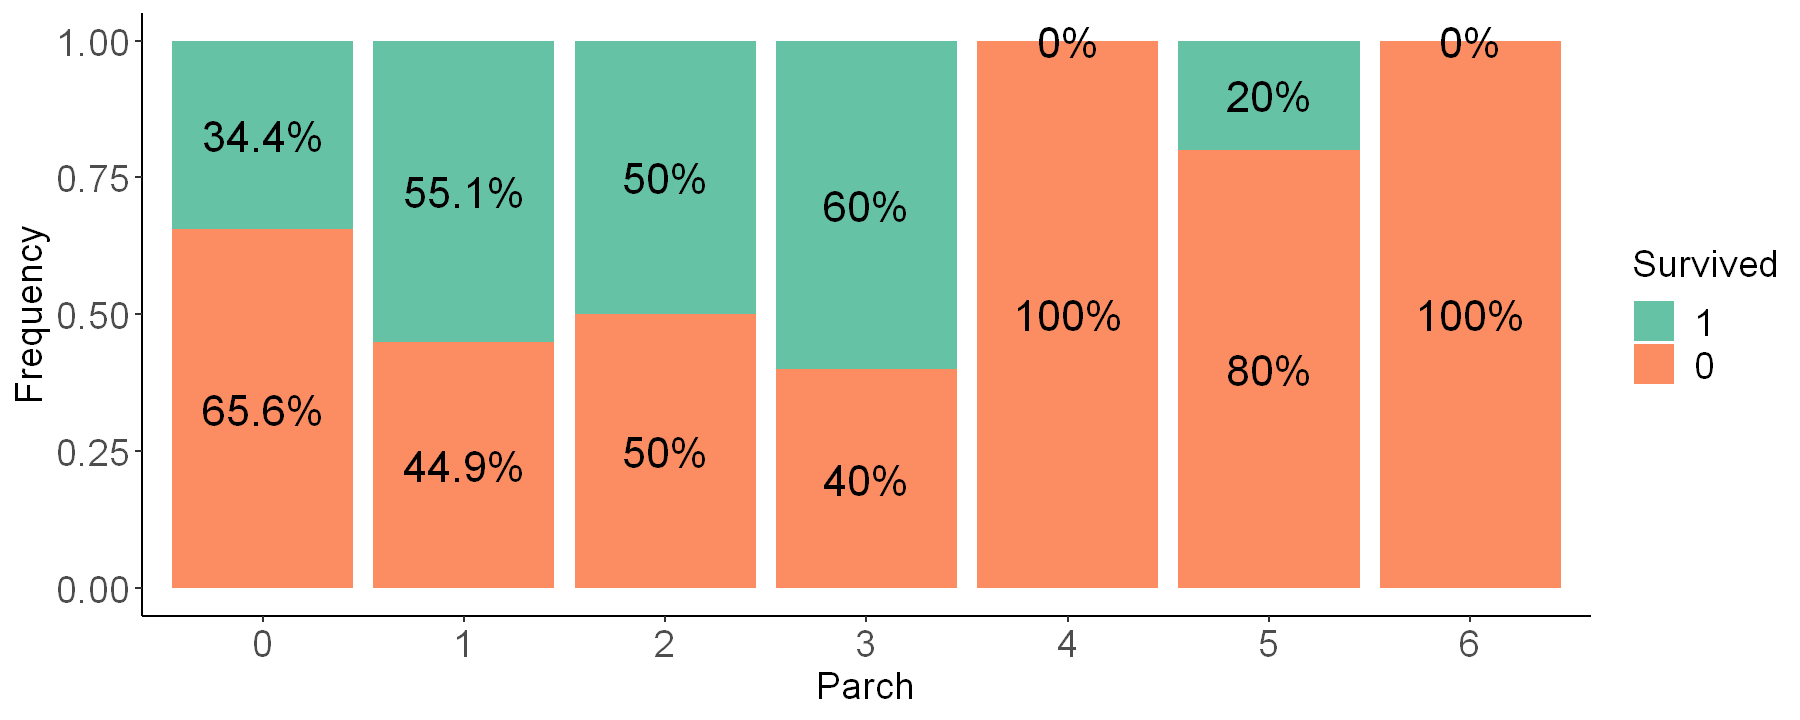

In [43]:
grafico_tab_frequencia_bivariada3(table_count_prop=table_count_propSurvived_Parch,
                                  nome_variavel1='Survived',
                                  nome_variavel2='Parch',
                                  size=6,tx=0,legend=TRUE)
gg_count_propSurvived_Parch <- gg_count_propSurvived_Parch + theme(axis.text=element_text(size=15),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_Parch

## Fare

In [44]:
binning_quantities(dados_entrada=df[df[['Sample']] == 'train',],
                    nome_variavel='Fare',
                    method='Sturges')

[[1]]
[1] "Nome da lista: lista_Fare"

[[2]]
[[2]]$k
[1] 11

[[2]]$limites_intervalos
 [1]  -Inf  46.6  93.2 140.0 186.0 233.0 279.0 326.0 373.0 419.0 466.0   Inf

[[2]]$dados_saida
  [1] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6]
  [7] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
 [13] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
 [19] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
 [25] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (233,279]   (-Inf,46.6] (-Inf,46.6]
 [31] (-Inf,46.6] (140,186]   (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (46.6,93.2]
 [37] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
 [43] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
 [49] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6]
 [55] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2]
 [61] (-Inf,46.6] (46.6,93.2] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
 [67] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2]
 [73] (46.6,93.2] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
 [79] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2]
 [85] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (233,279]   (-Inf,46.6]
 [91] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
 [97] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[103] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[109] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[115] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (233,279]   (-Inf,46.6]
[121] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6]
[127] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[133] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2]
[139] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[145] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[151] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2]
[157] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6]
[163] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6]
[169] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[175] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[181] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2]
[187] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[193] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (140,186]   (-Inf,46.6] (-Inf,46.6]
[199] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6]
[205] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[211] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (93.2,140] 
[217] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[223] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[229] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[235] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[241] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2]
[247] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[253] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (46.6,93.2]
[259] (466,Inf),  (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (-Inf,46.6]
[265] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (140,186]   (93.2,140] 
[271] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (46.6,93.2]
[277] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[283] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6] (-Inf,46.6]
[289] (-Inf,46.6] (-Inf,46.6] (46.6,93.2] (46.6,93.2] (-Inf,46.6] (-Inf,46

In [45]:
df[df[['Sample']] == 'train','Fare_binning'] <- lista_Fare[['dados_saida']]
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Fare_binning')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
"(-Inf,46.6]",720,80.81,720,80.81
"(46.6,93.2]",116,13.02,836,93.83
"(93.2,140]",24,2.69,860,96.52
"(140,186]",11,1.23,871,97.76
"(186,233]",9,1.01,880,98.77
"(233,279]",8,0.90,888,99.66
"(279,326]",0,0.00,888,99.66
"(326,373]",0,0.00,888,99.66
"(373,419]",0,0.00,888,99.66


[[1]]
[1] "Nome do gráfico: gg_count_propFare_binning"

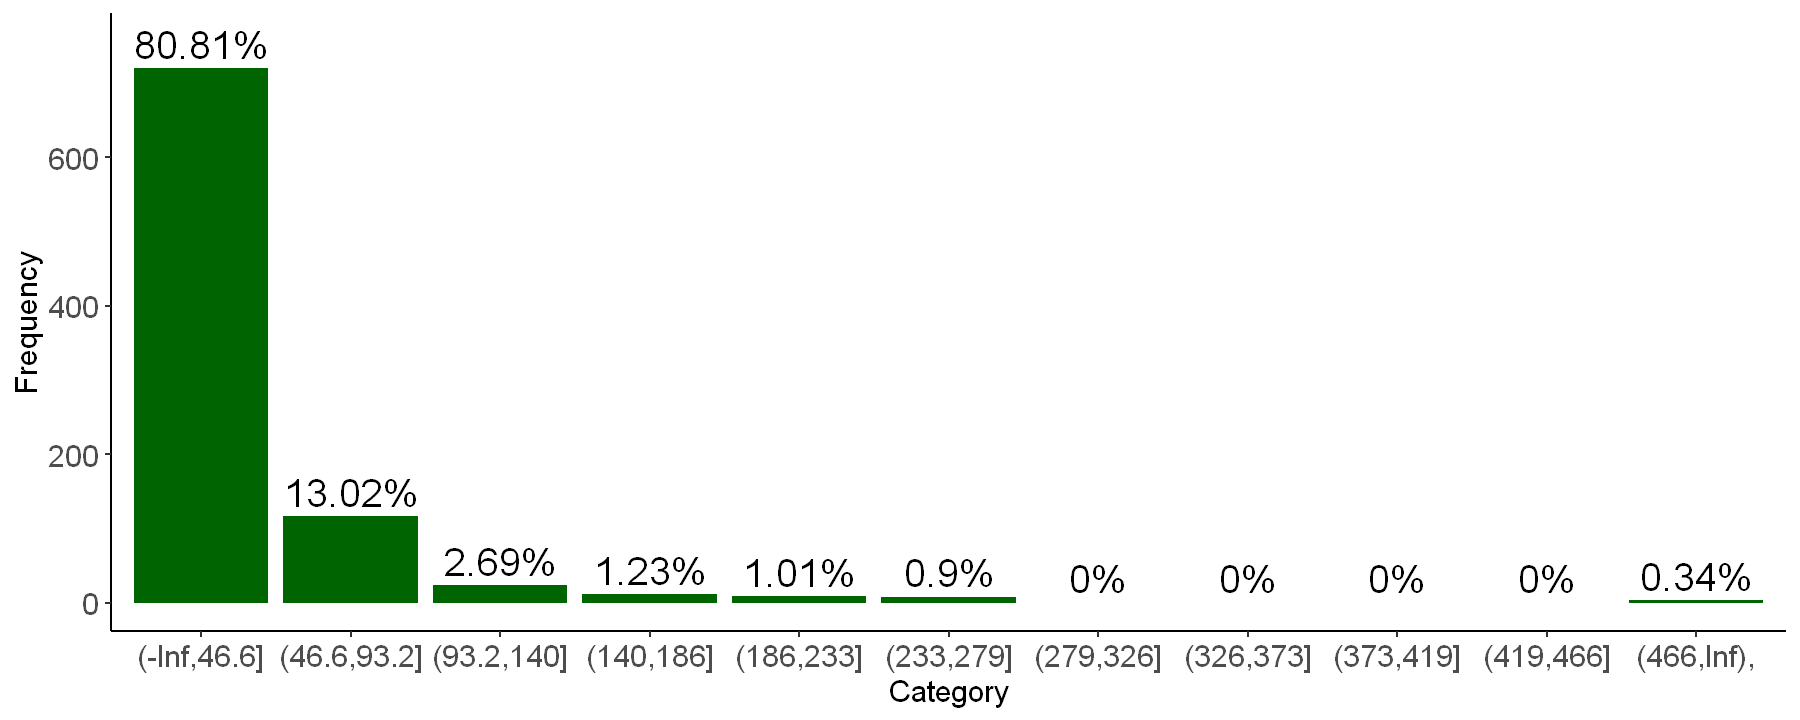

In [46]:
grafico_tab_frequencia2(table_count_prop=table_count_propFare_binning,
                        nome_variavel='Fare_binning',
                        cor_grafico='darkgreen',
                        size=5.5,tx1=0.4,tx2=1.05,
                        coord_flip=FALSE)
gg_count_propFare_binning <- gg_count_propFare_binning + theme(axis.text=element_text(size=12),
                                            axis.title=element_text(size=12))
gg_count_propFare_binning

In [47]:
df <- select(df,-c('Fare_binning')) # drop column Age_binning

## Survived x Fare

In [48]:
tapply(X=df[df[['Sample']] == 'train','Fare'],
        INDEX=df[df[['Sample']] == 'train','Survived'],
        FUN=summary)

$`1`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00000  12.47500  26.00000  48.39541  57.00000 512.32920 

$`0`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00000   7.85420  10.50000  22.11789  26.00000 263.00000 


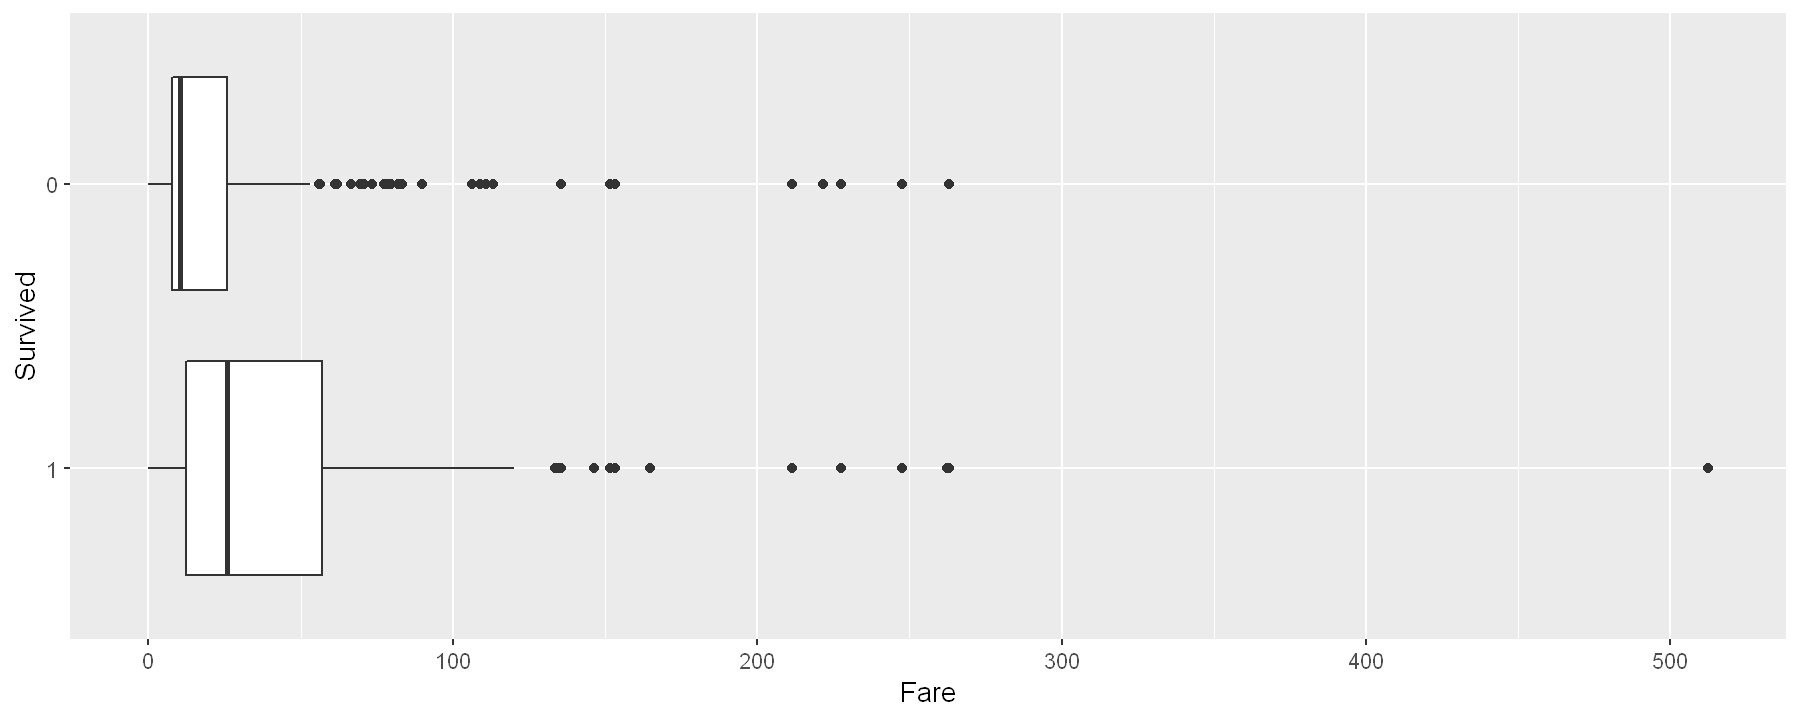

In [49]:
ggplot(aes_string(x='Survived',y='Fare'),data=df[df[['Sample']] == 'train',]) + geom_boxplot() + coord_flip()

# Preenchendo o dado faltante (Mr. Thomas Storey)

In [50]:
df[is.na(df[['Fare']]),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sample
,<fct>,<fct>,<ord>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>
1044,1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,NA,S,test


Uma das técnicas mais rápidas e menos trabalhosas para substituir um dado faltante é a utilização das próprias medidas de posição, apesar de existirem outras técnicas com melhor fundamentação teórica. Considerando que para o caso da variável Fare existe somente um dado faltante, essa técnica foi a escolhida. Além disso, visto que os dados de Fare e Pclass estão negativamente correlacionados, verificou-se o comportamento dessas duas variáveis para que um valor mais lógico pudesse ser utilizado para substituir o dado faltante.

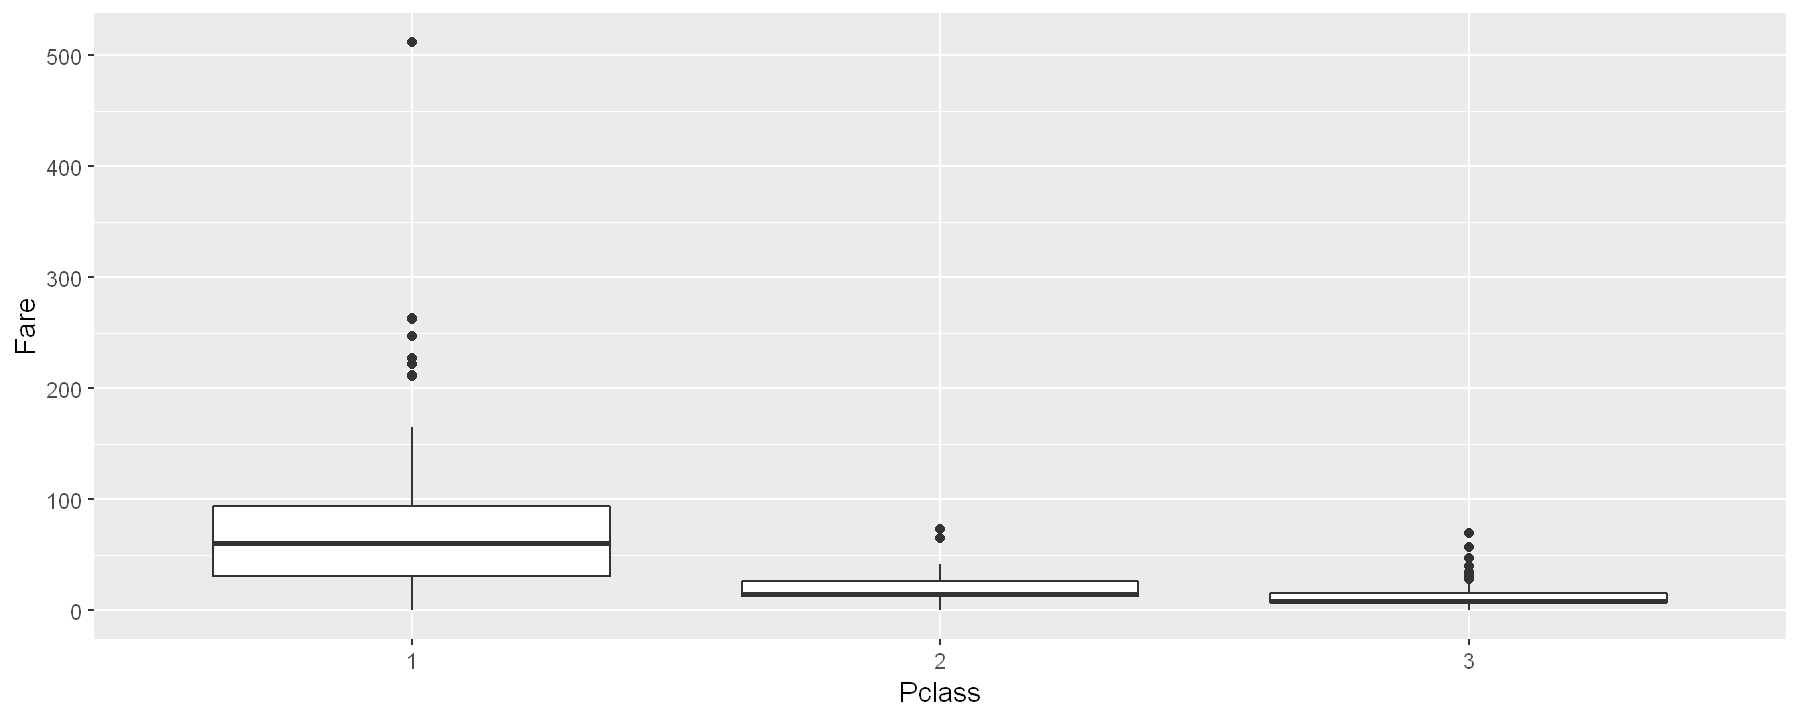

In [51]:
ggplot(aes_string(y='Fare',x='Pclass'),data=df[df[['Sample']] == 'train',]) + geom_boxplot()

A medida de posição escolhida foi a mediana. Além disso, como o indivíduo pertence a terceira classe, foi escolhida a mediana da terceira classe para substituir o dado faltante.

In [52]:
df[df[['Sample']] == 'train',] %>%
    group_by(Pclass) %>%
    summarise(summary = list(c(summary(object = Fare)))) %>%
    unnest_wider(summary)

Pclass,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,30.92395,60.2875,84.15468750,93.5,512.3292
2,0,13.00000,14.2500,20.66218315,26.0,73.5000
3,0,7.75000,8.0500,13.67555010,15.5,69.5500


In [53]:
df[is.na(df[['Fare']]),'Fare'] <- 8.0500

In [54]:
df[is.na(df[['Fare']]),'Fare']

numeric(0)

In [55]:
df[df[['PassengerId']] == 1044,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sample
,<fct>,<fct>,<ord>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>
1044,1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NA,S,test


## Cabin

In [56]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Cabin',
                        decreasing = TRUE)

,Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
,<fct>,<int>,<table>,<int>,<dbl>
187,NA,687,77.10,687,77.10
61,B96 B98,4,0.45,691,77.55
81,C23 C25 C27,4,0.45,695,78.00
185,G6,4,0.45,699,78.45
80,C22 C26,3,0.34,702,78.79
118,D,3,0.34,705,79.12
149,E101,3,0.34,708,79.46
181,F2,3,0.34,711,79.80
182,F33,3,0.34,714,80.13


## Survived X Cabin

### Método Optimal Binning - Junção de categorias por métodos automáticos

Dicas para discretização via WOE: 

- 1) Todas as categorias calculadas têm pelo menos 5% das observações. 
- 2) Todas as categorias calculadas têm valores diferentes de zero para o número de casos bons e ruins. 
- 3) Os Woe's são distintos para cada categoria calculada. As categorias calculadas que tinham Woe's semelhantes foram agrupadas. 
- 4) Valores ausentes estão em categorias separadas. 
- 5) Os Woe's são monotônicos, isto é, estão crescendo ou diminuindo com os agrupamentos. (Recomendação do uso dessa dica é mais fraca do que para as outras dicas).

In [57]:
df[['Survived_BadGod']] <- df[['Survived']]
levels(df[['Survived_BadGod']]) <- c('bad','good') # factor(c('1','0'))

In [58]:
bins <- woebin(df[df[['Sample']] == 'train',],
                check_cate_num = FALSE, # usar quando o numero de categorias é > 50
                x='Cabin',
                y='Survived_BadGod',
                method='chimerge')
bins

[INFO] creating woe binning ... 


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Cabin,missing,687,0.771043771,481,206,0.2998544396,-0.3747033969,0.1025935099,0.4219625092,missing,TRUE
Cabin,"A10%,%A14%,%A16%,%A19%,%A20%,%A23%,%A24%,%A26%,%A31%,%A32%,%A34%,%A36%,%A5%,%A6%,%A7%,%B101%,%B102%,%B18%,%B19%,%B20%,%B22%,%B28%,%B3%,%B30%,%B35%,%B37%,%B38%,%B39%,%B4%,%B41%,%B42%,%B49%,%B5%,%B50%,%B51 B53 B55%,%B57 B59 B63 B66%,%B58 B60%,%B69%,%B71%,%B73%,%B77%,%B78%,%B79%,%B80%,%B82 B84%,%B86%,%B94%,%B96 B98%,%C101%,%C103%,%C104%,%C106%,%C110%,%C111%,%C118%,%C123%,%C124%,%C125%,%C126%,%C128%,%C148%,%C2%,%C22 C26%,%C23 C25 C27%,%C30%,%C32%,%C45%,%C46%,%C47%,%C49%,%C50%,%C52%,%C54%,%C62 C64%,%C65%,%C68%,%C7%,%C70%,%C78%,%C82%,%C83%,%C85%,%C86%,%C87%,%C90%,%C91%,%C92%,%C93%,%C95%,%C99%,%D%,%D10 D12%,%D11%,%D15%,%D17%,%D19%,%D20%,%D21%,%D26%,%D28%,%D30%,%D33%,%D35%,%D36%,%D37%,%D45%,%D46%,%D47%,%D48%,%D49%,%D50%,%D56%,%D6%,%D7%,%D9%,%E10%,%E101%,%E12%,%E121%,%E17%,%E24%,%E25%,%E31%,%E33%,%E34%,%E36%,%E38%,%E40%,%E44%,%E46%,%E49%,%E50%,%E58%,%E63%,%E67%,%E68%,%E77%,%E8%,%F E69%,%F G63%,%F G73%,%F2%,%F33%,%F38%,%F4%,%G6%,%T",204,0.228956229,68,136,0.6666666667,1.1664348850,0.3193689993,0.4219625092,"A10%,%A14%,%A16%,%A19%,%A20%,%A23%,%A24%,%A26%,%A31%,%A32%,%A34%,%A36%,%A5%,%A6%,%A7%,%B101%,%B102%,%B18%,%B19%,%B20%,%B22%,%B28%,%B3%,%B30%,%B35%,%B37%,%B38%,%B39%,%B4%,%B41%,%B42%,%B49%,%B5%,%B50%,%B51 B53 B55%,%B57 B59 B63 B66%,%B58 B60%,%B69%,%B71%,%B73%,%B77%,%B78%,%B79%,%B80%,%B82 B84%,%B86%,%B94%,%B96 B98%,%C101%,%C103%,%C104%,%C106%,%C110%,%C111%,%C118%,%C123%,%C124%,%C125%,%C126%,%C128%,%C148%,%C2%,%C22 C26%,%C23 C25 C27%,%C30%,%C32%,%C45%,%C46%,%C47%,%C49%,%C50%,%C52%,%C54%,%C62 C64%,%C65%,%C68%,%C7%,%C70%,%C78%,%C82%,%C83%,%C85%,%C86%,%C87%,%C90%,%C91%,%C92%,%C93%,%C95%,%C99%,%D%,%D10 D12%,%D11%,%D15%,%D17%,%D19%,%D20%,%D21%,%D26%,%D28%,%D30%,%D33%,%D35%,%D36%,%D37%,%D45%,%D46%,%D47%,%D48%,%D49%,%D50%,%D56%,%D6%,%D7%,%D9%,%E10%,%E101%,%E12%,%E121%,%E17%,%E24%,%E25%,%E31%,%E33%,%E34%,%E36%,%E38%,%E40%,%E44%,%E46%,%E49%,%E50%,%E58%,%E63%,%E67%,%E68%,%E77%,%E8%,%F E69%,%F G63%,%F G73%,%F2%,%F33%,%F38%,%F4%,%G6%,%T",FALSE


$Cabin


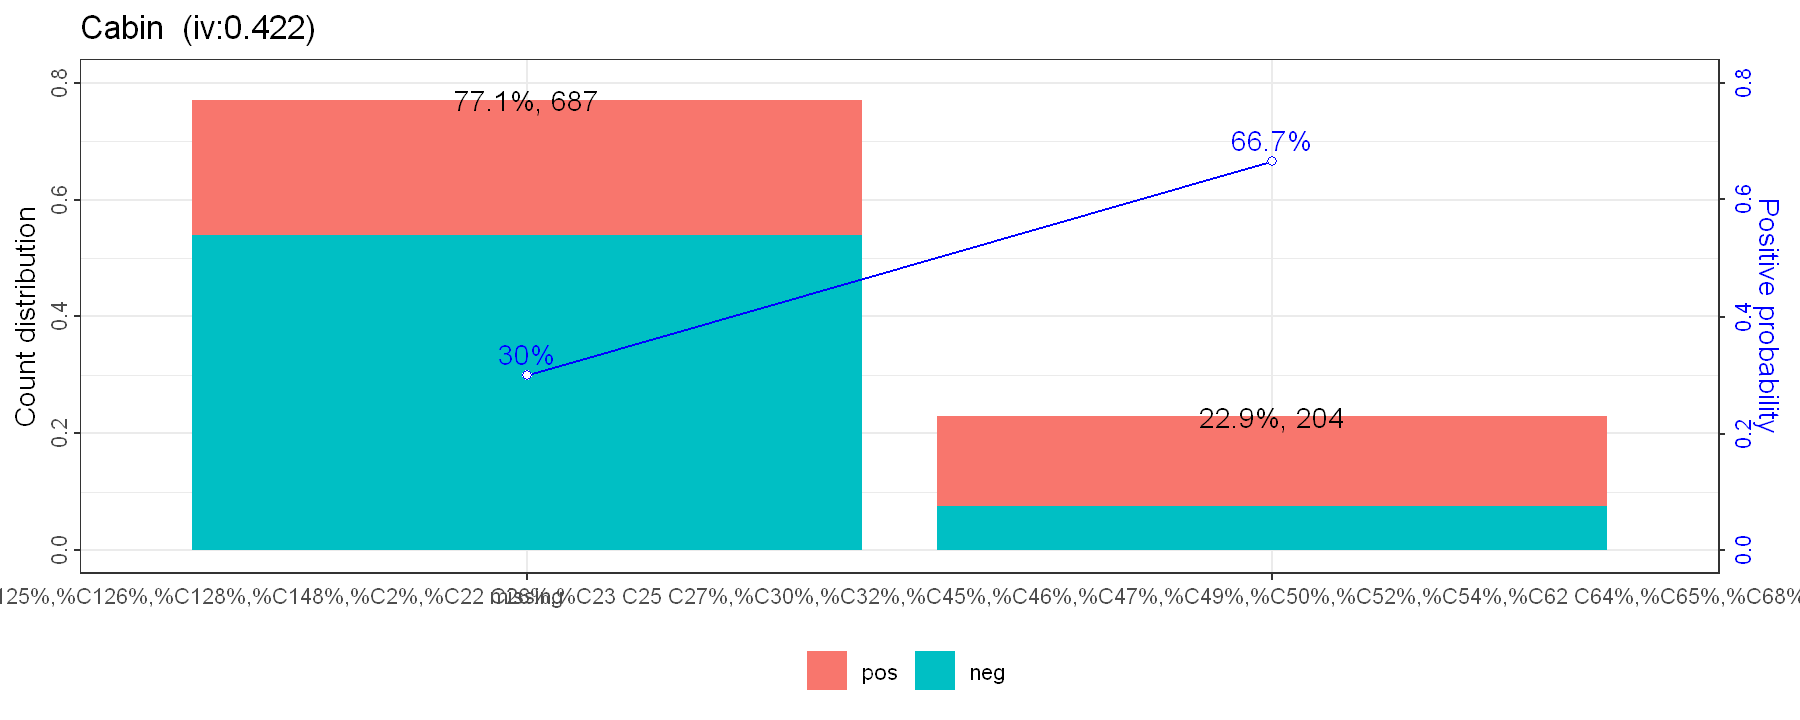

In [59]:
woebin_plot(bins)

O método optimal binning da função **woebin** com o argumento **method='chimerge'** apenas dividiu a variável Cabin em duas categorias: missing e não missing. Se é de interesse ter um maior detalhamento da variável em mais categorias, é interessante utilizar o argumento **method='tree'**. Por simplificação, o método **chimerge** foi escolhido.

In [60]:
# df <- woebin_ply(df, bins=bins, to = "bin", print_step = TRUE) # to = "bin" ou to = "woe"
df[['Cabin']] <- as.factor(ifelse(is.na(df[['Cabin']]),NA,'AnyCabin'))
df <- df %>% select(-c('Survived_BadGod'))
df %>% head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sample
,<fct>,<fct>,<ord>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S,train
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,AnyCabin,C,train
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S,train
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,AnyCabin,S,train
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S,train
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q,train


## Embarked

In [61]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Embarked')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
C,168,18.86,168,18.86
Q,77,8.64,245,27.50
S,644,72.28,889,99.78
NA,2,0.22,891,100.00


[[1]]
[1] "Nome do gráfico: gg_count_propEmbarked"

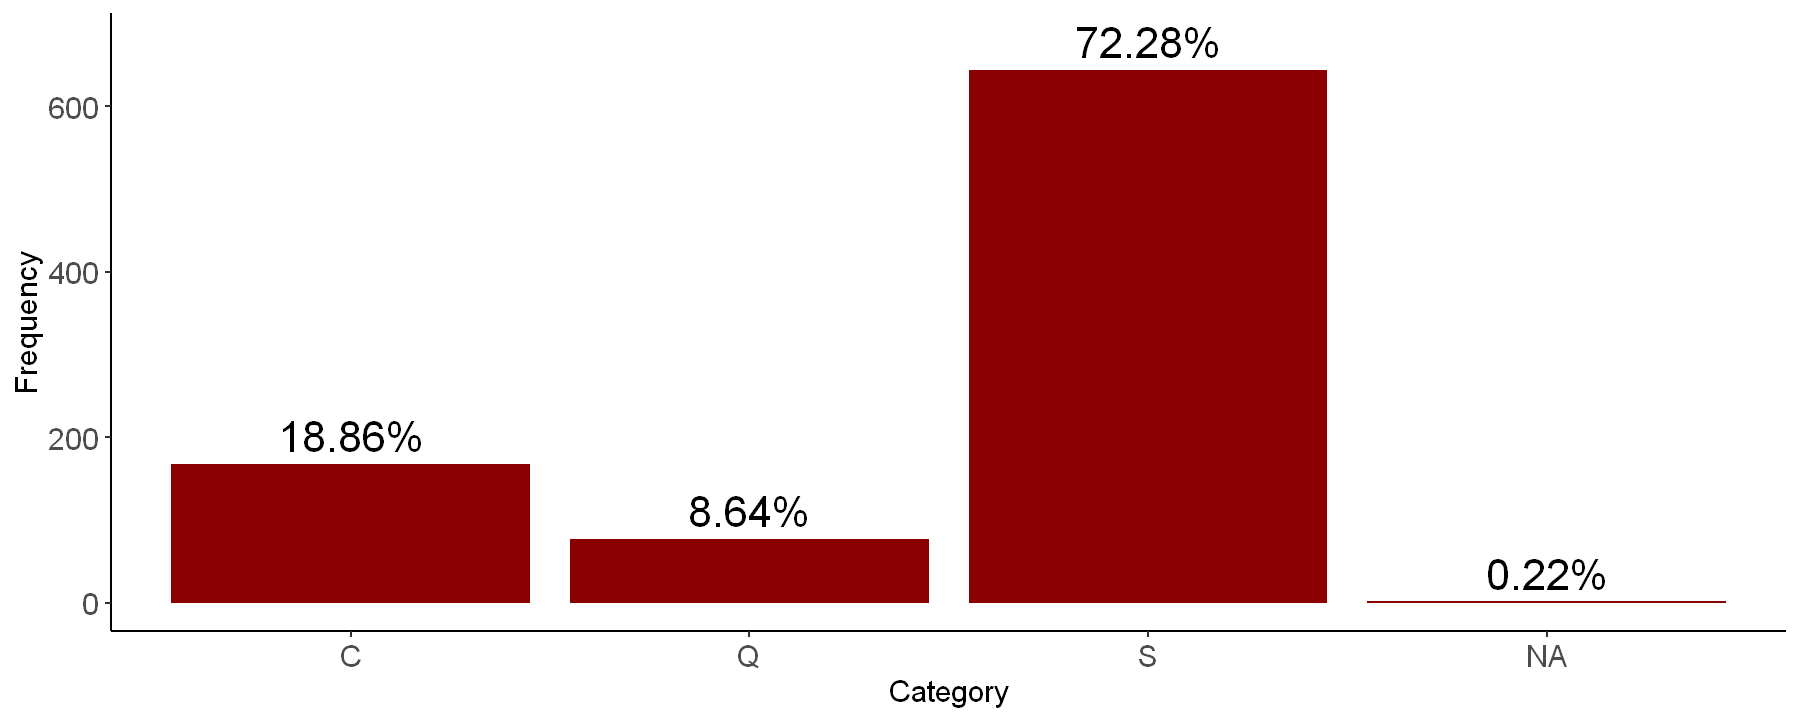

In [62]:
grafico_tab_frequencia2(table_count_prop=table_count_propEmbarked,
                        nome_variavel='Embarked',
                        cor_grafico='darkred',
                        size=6,tx1=0.15,tx2=1.05,
                        coord_flip=FALSE)
gg_count_propEmbarked <- gg_count_propEmbarked + theme(axis.text=element_text(size=12),
                                            axis.title=element_text(size=12))
gg_count_propEmbarked

In [63]:
df[is.na(df[['Embarked']]),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sample
,<fct>,<fct>,<ord>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,AnyCabin,NA,train
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,AnyCabin,NA,train


Intuitivamente, poderia ser utilizado o método de imputação de dados ausentes pela classe mais frequente pois são poucos casos (2 observações). Além disso, em pesquisas pela internet, foi constatado que as duas mulheres embarcaram em Southampton (S). Portanto, faz sentido seguir com esse preenchimento dos dados.

In [64]:
df[is.na(df[['Embarked']]),'Embarked'] <- 'S'

In [65]:
df[df[['PassengerId']] %in% c(62,830),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sample
,<fct>,<fct>,<ord>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,AnyCabin,S,train
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,AnyCabin,S,train


In [66]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Embarked')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
C,168,18.86,168,18.86
Q,77,8.64,245,27.50
S,646,72.50,891,100.00


[[1]]
[1] "Nome do gráfico: gg_count_propEmbarked"

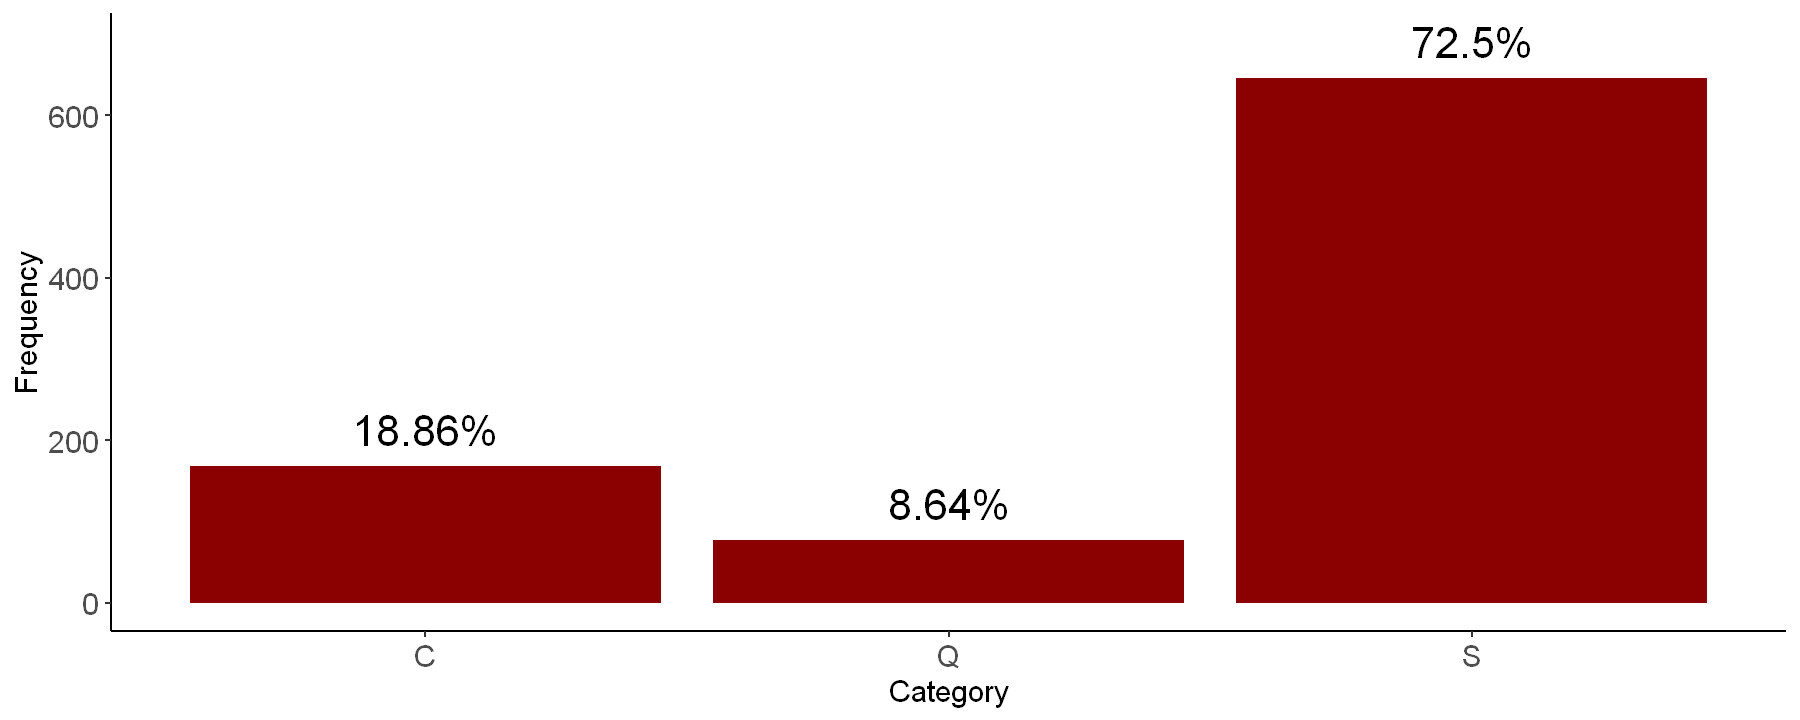

In [67]:
grafico_tab_frequencia2(table_count_prop=table_count_propEmbarked,
                        nome_variavel='Embarked',
                        cor_grafico='darkred',
                        size=6,tx1=0.15,tx2=1.05,
                        coord_flip=FALSE)
gg_count_propEmbarked <- gg_count_propEmbarked + theme(axis.text=element_text(size=12),
                                            axis.title=element_text(size=12))
gg_count_propEmbarked

## Survived X Embarked

In [68]:
calcula_tab_frequencia_bivariada(tabela_de_entrada=df[df[['Sample']] == 'train',],
                                 nome_variavel1='Survived',
                                 nome_variavel2='Embarked')

Survived,Embarked,Frequency,sum_x,cumsum_sum_x,percentage_sum_x,Frequency_div_sum_x,percentage_Frequency_div_sum_x
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,C,93,168,168,18.9,0.5535714286,55.4
0,C,75,168,168,18.9,0.4464285714,44.6
1,Q,30,77,245,8.6,0.3896103896,39.0
0,Q,47,77,245,8.6,0.6103896104,61.0
1,S,219,646,891,72.5,0.3390092879,33.9
0,S,427,646,891,72.5,0.6609907121,66.1


[1] "Para retirar as porcentagens, use legend = FALSE ou size = 0!"


[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_Embarked"

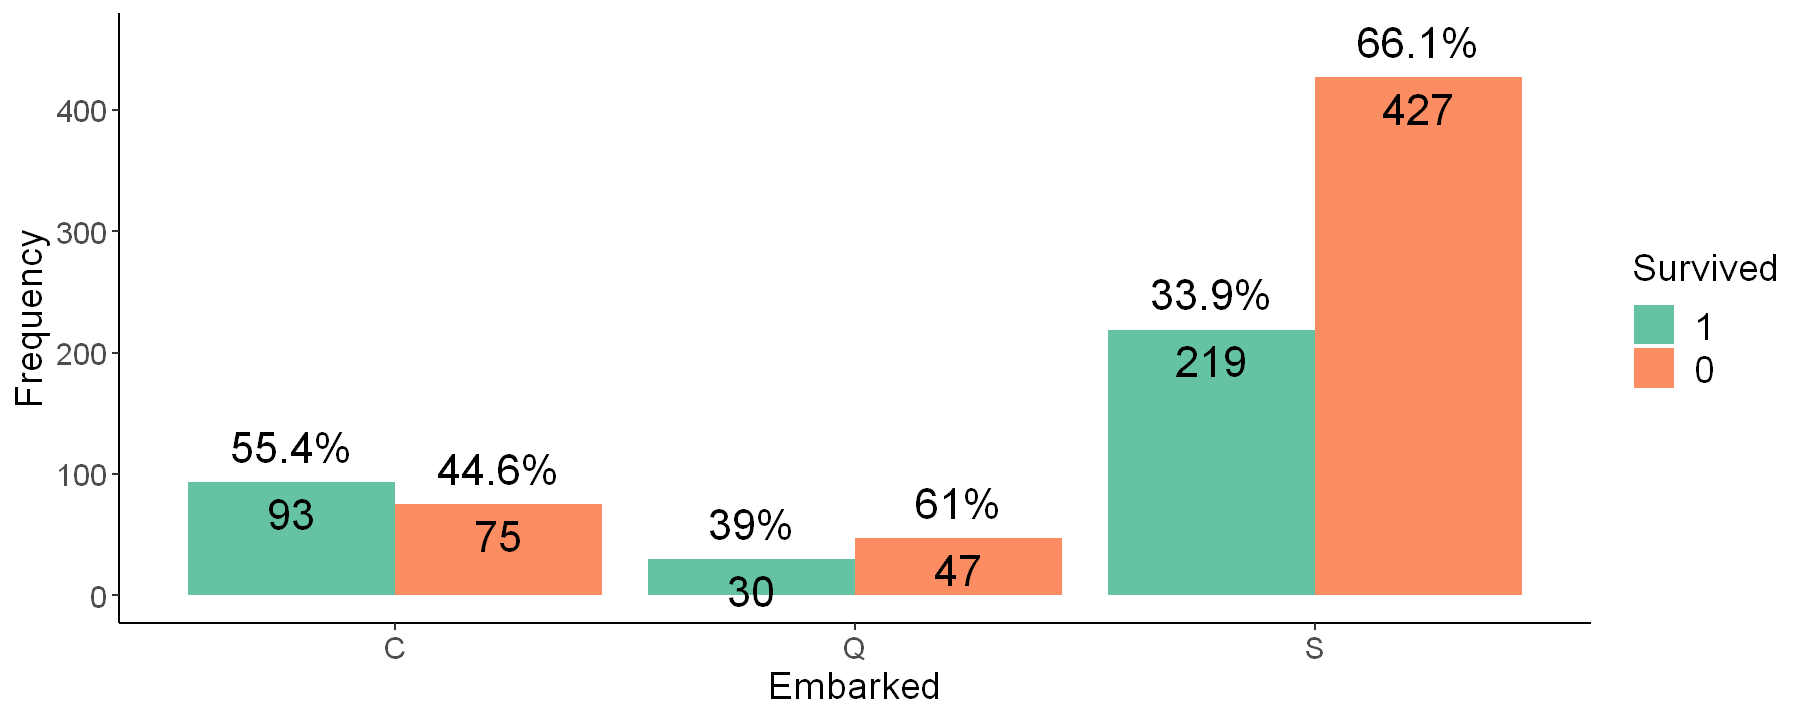

In [69]:
grafico_tab_frequencia_bivariada2(table_count_prop=table_count_propSurvived_Embarked,
                                  nome_variavel1='Survived',
                                  nome_variavel2='Embarked',
                                  tx1=0.2,tx2=0,size=6,
                                  legend=TRUE,percentage=TRUE,count=TRUE)

gg_count_propSurvived_Embarked <- gg_count_propSurvived_Embarked + theme(axis.text=element_text(size=12),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_Embarked

[[1]]
[1] "Nome do gráfico: gg_count_propSurvived_Embarked"

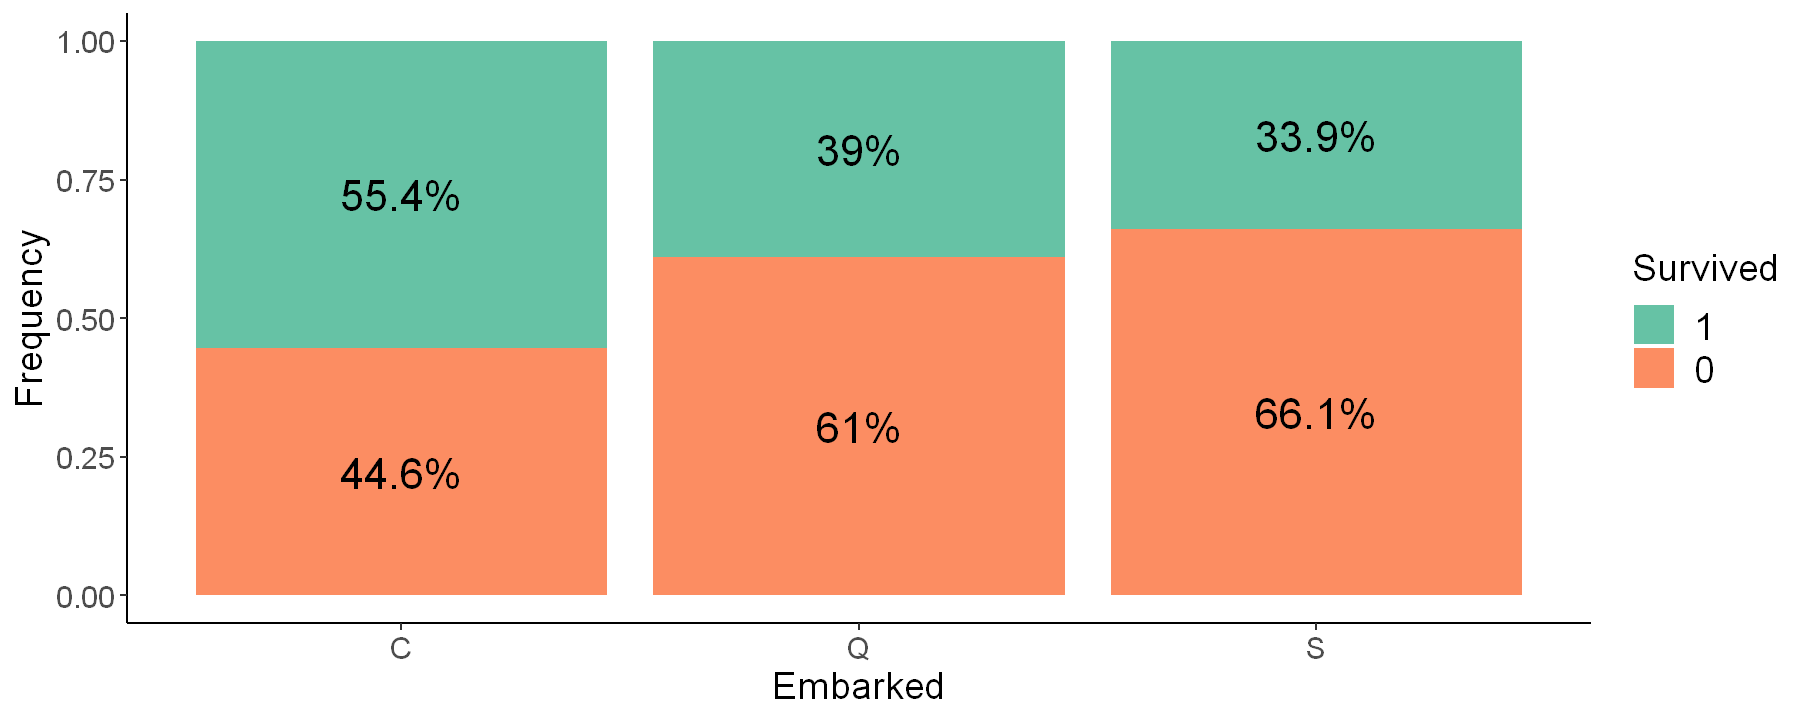

In [70]:
grafico_tab_frequencia_bivariada3(table_count_prop=table_count_propSurvived_Embarked,
                                  nome_variavel1='Survived',
                                  nome_variavel2='Embarked',
                                  size=6,tx=0,legend=TRUE)
gg_count_propSurvived_Embarked <- gg_count_propSurvived_Embarked + theme(axis.text=element_text(size=12),
                                                                axis.title=element_text(size=15),
                                                                legend.title=element_text(size=15),
                                                                legend.text=element_text(size=15)) +
                                                                scale_fill_brewer(palette="Set2")
gg_count_propSurvived_Embarked

## Age

In [71]:
binning_quantities(dados_entrada=df[df[['Sample']] == 'train',],
                    nome_variavel='Age',
                    method='Sturges')

[[1]]
[1] "Nome da lista: lista_Age"

[[2]]
[[2]]$k
[1] 11

[[2]]$limites_intervalos
 [1]  -Inf  7.65 14.90 22.10 29.40 36.60 43.80 51.10 58.30 65.50 72.80   Inf

[[2]]$dados_saida
  [1] (14.9,22.1] (36.6,43.8] (22.1,29.4] (29.4,36.6] (29.4,36.6] <NA>       
  [7] (51.1,58.3] (-Inf,7.65] (22.1,29.4] (7.65,14.9] (-Inf,7.65] (51.1,58.3]
 [13] (14.9,22.1] (36.6,43.8] (7.65,14.9] (51.1,58.3] (-Inf,7.65] <NA>       
 [19] (29.4,36.6] <NA>        (29.4,36.6] (29.4,36.6] (14.9,22.1] (22.1,29.4]
 [25] (7.65,14.9] (36.6,43.8] <NA>        (14.9,22.1] <NA>        <NA>       
 [31] (36.6,43.8] <NA>        <NA>        (65.5,72.8] (22.1,29.4] (36.6,43.8]
 [37] <NA>        (14.9,22.1] (14.9,22.1] (7.65,14.9] (36.6,43.8] (22.1,29.4]
 [43] <NA>        (-Inf,7.65] (14.9,22.1] <NA>        <NA>        <NA>       
 [49] <NA>        (14.9,22.1] (-Inf,7.65] (14.9,22.1] (43.8,51.1] (22.1,29.4]
 [55] (58.3,65.5] <NA>        (14.9,22.1] (22.1,29.4] (-Inf,7.65] (7.65,14.9]
 [61] (14.9,22.1] (36.6,43.8] (43.8,51.1] (-Inf,7.65] <NA>        <NA>       
 [67] (22.1,29.4] (14.9,22.1] (14.9,22.1] (22.1,29.4] (29.4,36.6] (14.9,22.1]
 [73] (14.9,22.1] (22.1,29.4] (29.4,36.6] (22.1,29.4] <NA>        <NA>       
 [79] (-Inf,7.65] (29.4,36.6] (14.9,22.1] (22.1,29.4] <NA>        (22.1,29.4]
 [85] (14.9,22.1] (29.4,36.6] (14.9,22.1] <NA>        (22.1,29.4] (22.1,29.4]
 [91] (22.1,29.4] (14.9,22.1] (43.8,51.1] (22.1,29.4] (58.3,65.5] <NA>       
 [97] (65.5,72.8] (22.1,29.4] (29.4,36.6] (29.4,36.6] (22.1,29.4] <NA>       
[103] (14.9,22.1] (29.4,36.6] (36.6,43.8] (22.1,29.4] (14.9,22.1] <NA>       
[109] (36.6,43.8] <NA>        (43.8,51.1] (7.65,14.9] (14.9,22.1] (14.9,22.1]
[115] (14.9,22.1] (14.9,22.1] (65.5,72.8] (22.1,29.4] (22.1,29.4] (-Inf,7.65]
[121] (14.9,22.1] <NA>        (29.4,36.6] (29.4,36.6] (51.1,58.3] (7.65,14.9]
[127] <NA>        (22.1,29.4] <NA>        (43.8,51.1] (29.4,36.6] (14.9,22.1]
[133] (43.8,51.1] (22.1,29.4] (22.1,29.4] (22.1,29.4] (14.9,22.1] (36.6,43.8]
[139] (14.9,22.1] (22.1,29.4] <NA>        (14.9,22.1] (22.1,29.4] (14.9,22.1]
[145] (14.9,22.1] (14.9,22.1] (22.1,29.4] (7.65,14.9] (29.4,36.6] (36.6,43.8]
[151] (43.8,51.1] (14.9,22.1] (51.1,58.3] (36.6,43.8] <NA>        (43.8,51.1]
[157] (14.9,22.1] (29.4,36.6] <NA>        <NA>        (43.8,51.1] (36.6,43.8]
[163] (22.1,29.4] (14.9,22.1] (-Inf,7.65] (7.65,14.9] <NA>        (43.8,51.1]
[169] <NA>        (22.1,29.4] (58.3,65.5] (-Inf,7.65] (-Inf,7.65] (14.9,22.1]
[175] (51.1,58.3] (14.9,22.1] <NA>        (43.8,51.1] (29.4,36.6] (29.4,36.6]
[181] <NA>        <NA>        (7.65,14.9] (-Inf,7.65] (-Inf,7.65] <NA>       
[187] <NA>        (43.8,51.1] (36.6,43.8] (29.4,36.6] (29.4,36.6] (14.9,22.1]
[193] (14.9,22.1] (-Inf,7.65] (43.8,51.1] (51.1,58.3] <NA>        (36.6,43.8]
[199] <NA>        (22.1,29.4] (22.1,29.4] <NA>        (29.4,36.6] (43.8,51.1]
[205] (14.9,22.1] (-Inf,7.65] (29.4,36.6] (22.1,29.4] (14.9,22.1] (36.6,43.8]
[211] (22.1,29.4] (29.4,36.6] (14.9,22.1] (29.4,36.6] <NA>        (29.4,36.6]
[217] (22.1,29.4] (36.6,43.8] (29.4,36.6] (29.4,36.6] (14.9,22.1] (22.1,29.4]
[223] (43.8,51.1] <NA>        (36.6,43.8] (14.9,22.1] (14.9,22.1] (14.9,22.1]
[229] (14.9,22.1] <NA>        (29.4,36.6] (22.1,29.4] (58.3,65.5] (-Inf,7.65]
[235] (22.1,29.4] <NA>        (43.8,51.1] (7.65,14.9] (14.9,22.1] (29.4,36.6]
[241] <NA>        <NA>        (22.1,29.4] (14.9,22.1] (29.4,36.6] (43.8,51.1]
[247] (22.1,29.4] (22.1,29.4] (36.6,43.8] (51.1,58.3] <NA>        (22.1,29.4]
[253] (58.3,65.5] (29.4,36.6] (36.6,43.8] (22.1,29.4] <NA>        (29.4,36.6]
[259] (29.4,36.6] (43.8,51.1] <NA>        (-Inf,7.65] (51.1,58.3] (36.6,43.8]
[265] <NA>        (29.4,36.6] (14.9,22.1] (22.1,29.4] (51.1,58.3] (29.4,36.6]
[271] <NA>        (22.1,29.4] (36.6,43.8] (36.6,43.8] <NA>        (58.3,65.5]
[277] (43.8,51.1] <NA>        (-Inf,7.65] (29.4,36.6] (58.3,65.5] (22.1,29.4]
[283] (14.9,22.1] (14.9,22.1] <NA>        (29.4,36.6] (29.4,36.6] (14.9,22.1]
[289] (36.6,43.8] (14.9,22.1] (22.1,29.4] (14.9,22.1] (29.4,36.6] (22.1,29.

In [72]:
df[df[['Sample']] == 'train','Age_binning'] <- lista_Age[['dados_saida']]
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Age_binning')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
"(-Inf,7.65]",50,5.61,50,5.61
"(7.65,14.9]",28,3.14,78,8.75
"(14.9,22.1]",153,17.17,231,25.93
"(22.1,29.4]",153,17.17,384,43.10
"(29.4,36.6]",136,15.26,520,58.36
"(36.6,43.8]",70,7.86,590,66.22
"(43.8,51.1]",67,7.52,657,73.74
"(51.1,58.3]",29,3.25,686,76.99
"(58.3,65.5]",20,2.24,706,79.24


[[1]]
[1] "Nome do gráfico: gg_count_propAge_binning"

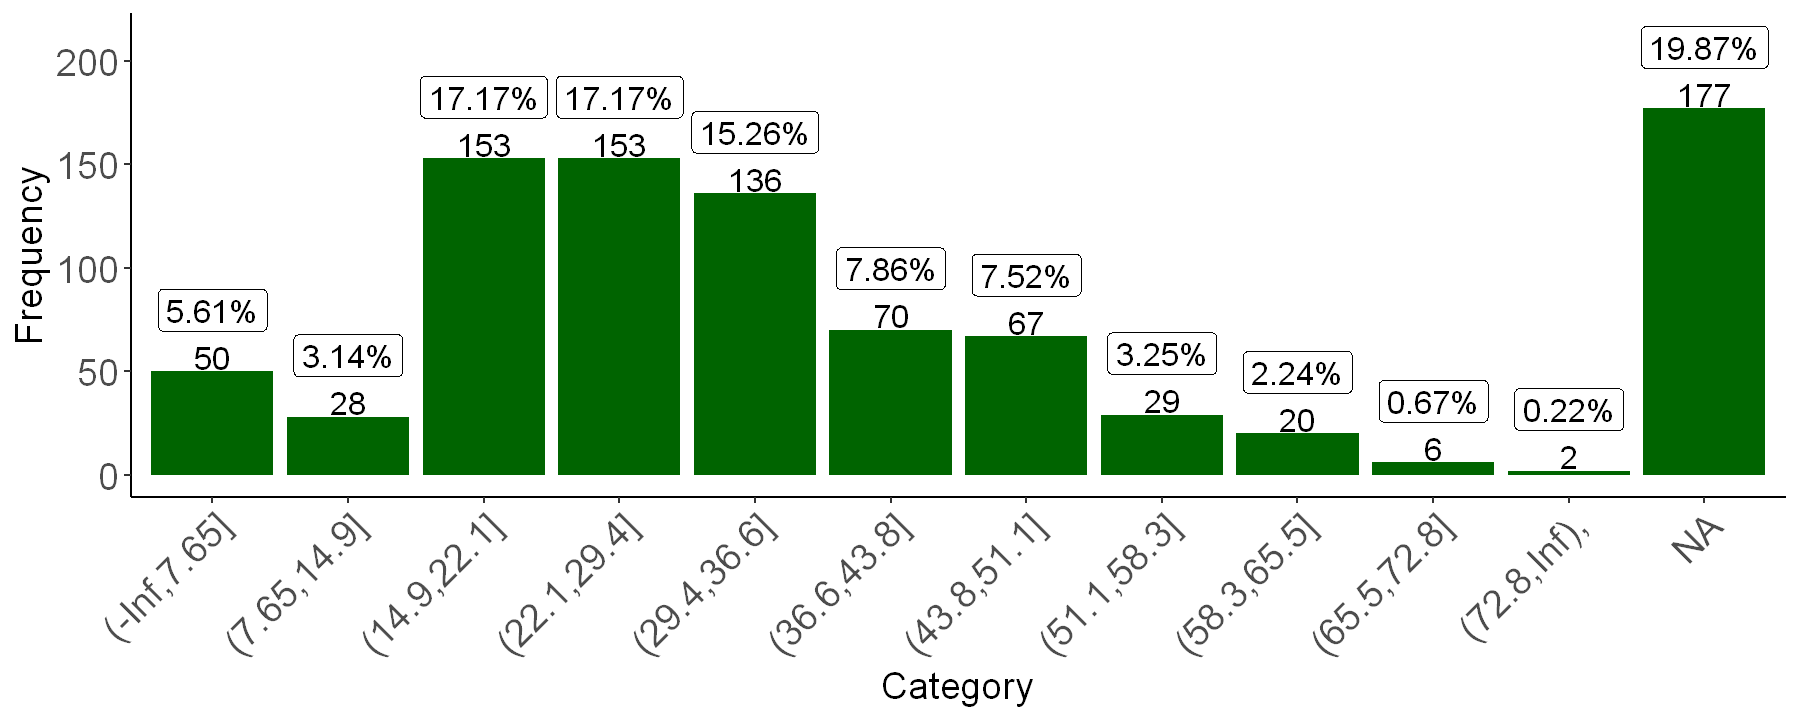

In [73]:
grafico_tab_frequencia3(table_count_prop=table_count_propAge_binning,
                       nome_variavel='Age_binning',
                       cor_grafico='darkgreen',
                       size=4.5,
                       angle=45,tx1=0.4,tx2=1.2,
                       legend=TRUE,percentage=TRUE,count=TRUE)
gg_count_propAge_binning <- gg_count_propAge_binning + theme(axis.text=element_text(size=15),
                                                            axis.title=element_text(size=15))
gg_count_propAge_binning

In [74]:
df <- select(df,-c('Age_binning')) # drop column Age_binning

O gráfico mostra que aproximadamente 19,87% dos indivíduos não tiveram as suas idades registradas. Portanto, há presença de dados ausentes e isso pode gerar predições ruins se não for tratado adequadamente. Uma das abordagens a ser utilizada seria a discretização da variável Age, o que permitiria a separação da categoria NA em uma categoria separada. Como isso já foi feito na resolução em Python, utilizamos uma outra abordagem que é conhecida na literatura como Imputação de Dados Ausentes.

Acreditamos que o mecanismo gerador dos dados é MCAR (Missing Completely at Random). Duas abordagens foram utilizadas: 
- 1) Substituição dos dados faltantes pela mediana;
- 2) Utilização do pacote mice.

### 1 - Substituição dos dados faltantes pela mediana;

In [75]:
df[['Age_t_missing']] <- df[['Age']]
df[df[['Sample']] == 'train' & is.na(df[['Age']]),'Age_t_missing'] <- round(median(df[df[['Sample']] == 'train','Age'], na.rm = T), 2)

In [76]:
round(median(df[df[['Sample']] == 'train','Age'], na.rm = T), 2)

[1] 28

In [77]:
apply_binning_by_limites_intervalos(limites_intervalos=lista_Age$limites_intervalos,
                                    dados_entrada=df[df[['Sample']] == 'train',],
                                    nome_variavel='Age_t_missing')

[[1]]
[1] "Nome da lista: lista_Age_t_missing"

[[2]]
[[2]]$k
[1] 11

[[2]]$limites_intervalos
 [1]  -Inf  7.65 14.90 22.10 29.40 36.60 43.80 51.10 58.30 65.50 72.80   Inf

[[2]]$dados_saida
  [1] (14.9,22.1] (36.6,43.8] (22.1,29.4] (29.4,36.6] (29.4,36.6] (22.1,29.4]
  [7] (51.1,58.3] [-Inf,7.65] (22.1,29.4] (7.65,14.9] [-Inf,7.65] (51.1,58.3]
 [13] (14.9,22.1] (36.6,43.8] (7.65,14.9] (51.1,58.3] [-Inf,7.65] (22.1,29.4]
 [19] (29.4,36.6] (22.1,29.4] (29.4,36.6] (29.4,36.6] (14.9,22.1] (22.1,29.4]
 [25] (7.65,14.9] (36.6,43.8] (22.1,29.4] (14.9,22.1] (22.1,29.4] (22.1,29.4]
 [31] (36.6,43.8] (22.1,29.4] (22.1,29.4] (65.5,72.8] (22.1,29.4] (36.6,43.8]
 [37] (22.1,29.4] (14.9,22.1] (14.9,22.1] (7.65,14.9] (36.6,43.8] (22.1,29.4]
 [43] (22.1,29.4] [-Inf,7.65] (14.9,22.1] (22.1,29.4] (22.1,29.4] (22.1,29.4]
 [49] (22.1,29.4] (14.9,22.1] [-Inf,7.65] (14.9,22.1] (43.8,51.1] (22.1,29.4]
 [55] (58.3,65.5] (22.1,29.4] (14.9,22.1] (22.1,29.4] [-Inf,7.65] (7.65,14.9]
 [61] (14.9,22.1] (36.6,43.8] (43.8,51.1] [-Inf,7.65] (22.1,29.4] (22.1,29.4]
 [67] (22.1,29.4] (14.9,22.1] (14.9,22.1] (22.1,29.4] (29.4,36.6] (14.9,22.1]
 [73] (14.9,22.1] (22.1,29.4] (29.4,36.6] (22.1,29.4] (22.1,29.4] (22.1,29.4]
 [79] [-Inf,7.65] (29.4,36.6] (14.9,22.1] (22.1,29.4] (22.1,29.4] (22.1,29.4]
 [85] (14.9,22.1] (29.4,36.6] (14.9,22.1] (22.1,29.4] (22.1,29.4] (22.1,29.4]
 [91] (22.1,29.4] (14.9,22.1] (43.8,51.1] (22.1,29.4] (58.3,65.5] (22.1,29.4]
 [97] (65.5,72.8] (22.1,29.4] (29.4,36.6] (29.4,36.6] (22.1,29.4] (22.1,29.4]
[103] (14.9,22.1] (29.4,36.6] (36.6,43.8] (22.1,29.4] (14.9,22.1] (22.1,29.4]
[109] (36.6,43.8] (22.1,29.4] (43.8,51.1] (7.65,14.9] (14.9,22.1] (14.9,22.1]
[115] (14.9,22.1] (14.9,22.1] (65.5,72.8] (22.1,29.4] (22.1,29.4] [-Inf,7.65]
[121] (14.9,22.1] (22.1,29.4] (29.4,36.6] (29.4,36.6] (51.1,58.3] (7.65,14.9]
[127] (22.1,29.4] (22.1,29.4] (22.1,29.4] (43.8,51.1] (29.4,36.6] (14.9,22.1]
[133] (43.8,51.1] (22.1,29.4] (22.1,29.4] (22.1,29.4] (14.9,22.1] (36.6,43.8]
[139] (14.9,22.1] (22.1,29.4] (22.1,29.4] (14.9,22.1] (22.1,29.4] (14.9,22.1]
[145] (14.9,22.1] (14.9,22.1] (22.1,29.4] (7.65,14.9] (29.4,36.6] (36.6,43.8]
[151] (43.8,51.1] (14.9,22.1] (51.1,58.3] (36.6,43.8] (22.1,29.4] (43.8,51.1]
[157] (14.9,22.1] (29.4,36.6] (22.1,29.4] (22.1,29.4] (43.8,51.1] (36.6,43.8]
[163] (22.1,29.4] (14.9,22.1] [-Inf,7.65] (7.65,14.9] (22.1,29.4] (43.8,51.1]
[169] (22.1,29.4] (22.1,29.4] (58.3,65.5] [-Inf,7.65] [-Inf,7.65] (14.9,22.1]
[175] (51.1,58.3] (14.9,22.1] (22.1,29.4] (43.8,51.1] (29.4,36.6] (29.4,36.6]
[181] (22.1,29.4] (22.1,29.4] (7.65,14.9] [-Inf,7.65] [-Inf,7.65] (22.1,29.4]
[187] (22.1,29.4] (43.8,51.1] (36.6,43.8] (29.4,36.6] (29.4,36.6] (14.9,22.1]
[193] (14.9,22.1] [-Inf,7.65] (43.8,51.1] (51.1,58.3] (22.1,29.4] (36.6,43.8]
[199] (22.1,29.4] (22.1,29.4] (22.1,29.4] (22.1,29.4] (29.4,36.6] (43.8,51.1]
[205] (14.9,22.1] [-Inf,7.65] (29.4,36.6] (22.1,29.4] (14.9,22.1] (36.6,43.8]
[211] (22.1,29.4] (29.4,36.6] (14.9,22.1] (29.4,36.6] (22.1,29.4] (29.4,36.6]
[217] (22.1,29.4] (36.6,43.8] (29.4,36.6] (29.4,36.6] (14.9,22.1] (22.1,29.4]
[223] (43.8,51.1] (22.1,29.4] (36.6,43.8] (14.9,22.1] (14.9,22.1] (14.9,22.1]
[229] (14.9,22.1] (22.1,29.4] (29.4,36.6] (22.1,29.4] (58.3,65.5] [-Inf,7.65]
[235] (22.1,29.4] (22.1,29.4] (43.8,51.1] (7.65,14.9] (14.9,22.1] (29.4,36.6]
[241] (22.1,29.4] (22.1,29.4] (22.1,29.4] (14.9,22.1] (29.4,36.6] (43.8,51.1]
[247] (22.1,29.4] (22.1,29.4] (36.6,43.8] (51.1,58.3] (22.1,29.4] (22.1,29.4]
[253] (58.3,65.5] (29.4,36.6] (36.6,43.8] (22.1,29.4] (22.1,29.4] (29.4,36.6]
[259] (29.4,36.6] (43.8,51.1] (22.1,29.4] [-Inf,7.65] (51.1,58.3] (36.6,43.8]
[265] (22.1,29.4] (29.4,36.6] (14.9,22.1] (22.1,29.4] (51.1,58.3] (29.4,36.6]
[271] (22.1,29.4] (22.1,29.4] (36.6,43.8] (36.6,43.8] (22.1,29.4] (58.3,65.5]
[277] (43.8,51.1] (22.1,29.4] [-Inf,7.65] (29.4,36.6] (58.3,65.5] (22.1,29.4]
[283] (14.9,22.1] (14.9,22.1] (22.1,29.4] (29.4,36.6] (29.4,36.6] (14.9,22.1]
[289] (36.6,43.8] (14.9,22.1] (22.1,29.4] (14.9,22.1] (29.4,36.6]

In [78]:
df[df[['Sample']] == 'train','Age_t_missing_categ'] <- lista_Age_t_missing[['dados_saida']]

In [79]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Age_t_missing_categ')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
"[-Inf,7.65]",50,5.61,50,5.61
"(7.65,14.9]",28,3.14,78,8.75
"(14.9,22.1]",153,17.17,231,25.93
"(22.1,29.4]",330,37.04,561,62.96
"(29.4,36.6]",136,15.26,697,78.23
"(36.6,43.8]",70,7.86,767,86.08
"(43.8,51.1]",67,7.52,834,93.60
"(51.1,58.3]",29,3.25,863,96.86
"(58.3,65.5]",20,2.24,883,99.10


[[1]]
[1] "Nome do gráfico: gg_count_propAge_t_missing_categ"

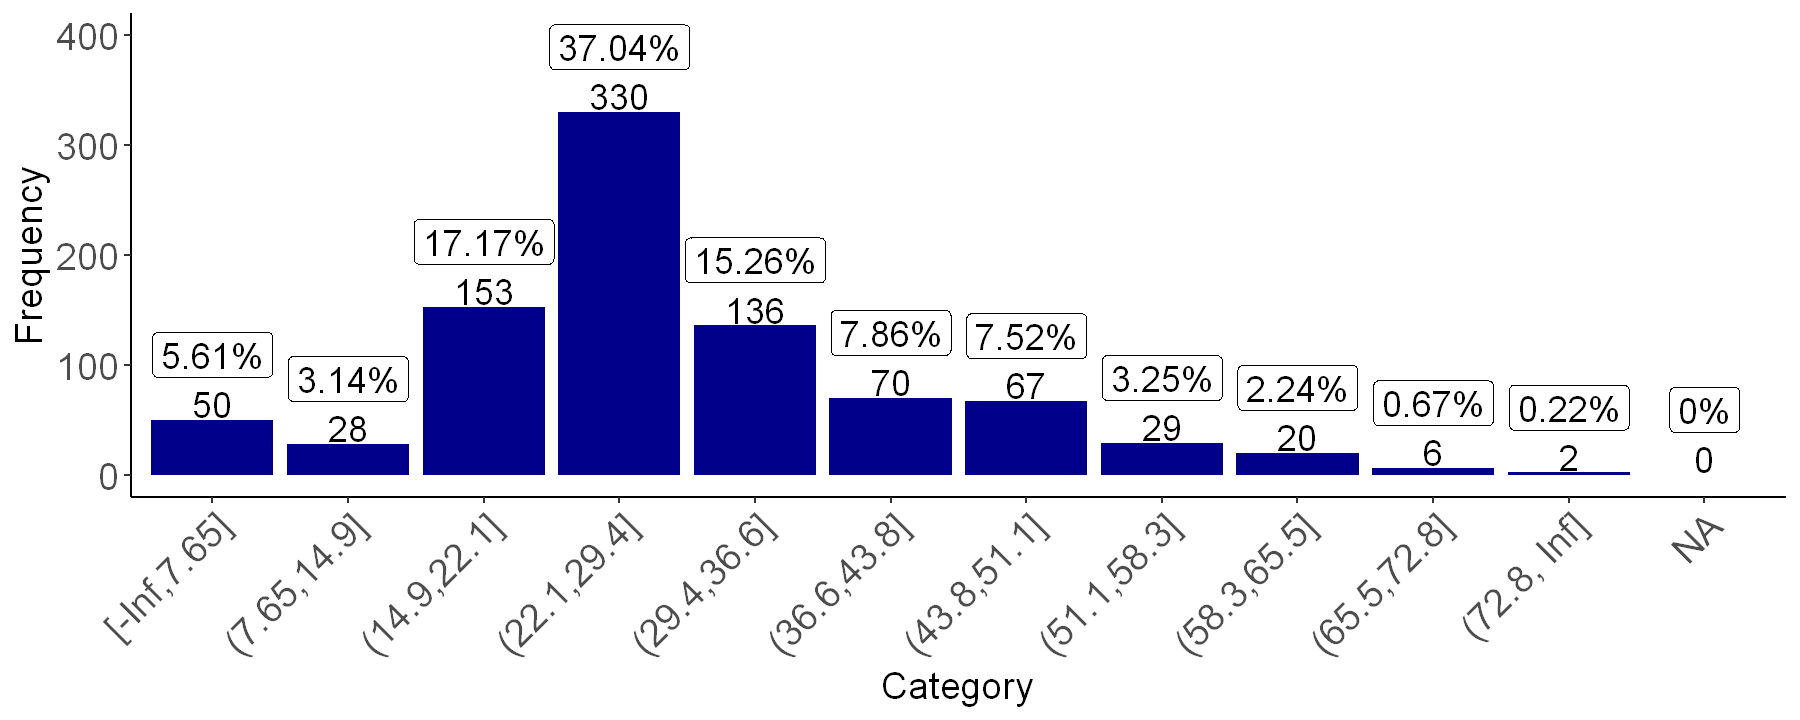

In [80]:
grafico_tab_frequencia3(table_count_prop=table_count_propAge_t_missing_categ,
                       nome_variavel='Age_t_missing_categ',
                       cor_grafico='darkblue',
                       size=5,
                       angle=45,tx1=0.8,tx2=1.2,
                       legend=TRUE,percentage=TRUE,count=TRUE)
gg_count_propAge_t_missing_categ <- gg_count_propAge_t_missing_categ + theme(axis.text=element_text(size=15),
                                                            axis.title=element_text(size=15)) +
                                                            coord_cartesian(ylim=c(0,400))
gg_count_propAge_t_missing_categ

Como essa abordagem utiliza uma medida de tendência central e não considera o perfil de cada indivíduo, é possível que isso altere a qualidade do modelo final. Uma abordagem interessante para fazer isso é utilizar o pacote mice.

In [81]:
df <- select(df,-c('Age_t_missing','Age_t_missing_categ')) # drop columns Age_t_missing, Age_t_missing_categ

### 2 - Utilização do pacote mice.

In [82]:
df[['Age_t_missing']] <- df[['Age']]

In [83]:
apply(is.na(df[df[['Sample']] == 'train',c('Pclass','Sex','SibSp','Parch','Fare','Embarked','Cabin','Age_t_missing')]),2,any)

Pclass           Sex         SibSp         Parch          Fare 
        FALSE         FALSE         FALSE         FALSE         FALSE 
     Embarked         Cabin Age_t_missing 
        FALSE          TRUE          TRUE

In [84]:
dataset <- df[,c('Pclass','Sex','SibSp','Parch','Fare','Embarked','Cabin','Age_t_missing')]
dataset

Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin,Age_t_missing
<ord>,<fct>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>
3,male,1,0,7.2500,S,NA,22
1,female,1,0,71.2833,C,AnyCabin,38
3,female,0,0,7.9250,S,NA,26
1,female,1,0,53.1000,S,AnyCabin,35
3,male,0,0,8.0500,S,NA,35
3,male,0,0,8.4583,Q,NA,NA
1,male,0,0,51.8625,S,AnyCabin,54
3,male,3,1,21.0750,S,NA,2
3,female,0,2,11.1333,S,NA,27


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_t_missing,Cabin,
272,1,1,1,1,1,1,1,1,0
774,1,1,1,1,1,1,1,0,1
23,1,1,1,1,1,1,0,1,1
240,1,1,1,1,1,1,0,0,2
,0,0,0,0,0,0,263,1014,1277


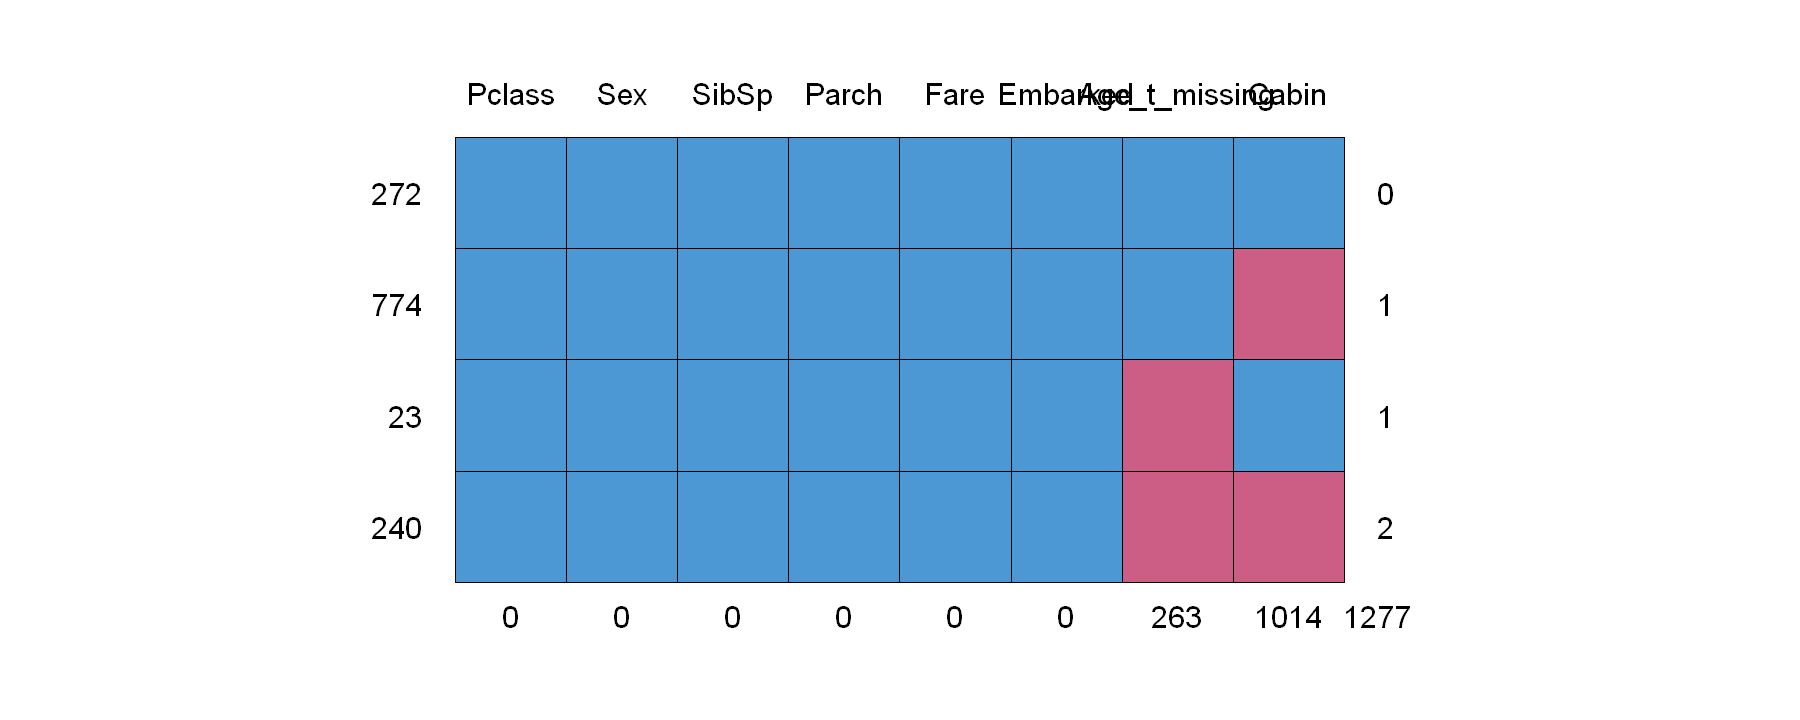

In [85]:
md.pattern(dataset)

In [86]:
imputed_Data <- mice(dataset, m=5, maxit = 50, seed = 500)


 iter imp variable
  1   1  Age_t_missing
  1   2  Age_t_missing
  1   3  Age_t_missing
  1   4  Age_t_missing
  1   5  Age_t_missing
  2   1  Age_t_missing
  2   2  Age_t_missing
  2   3  Age_t_missing
  2   4  Age_t_missing
  2   5  Age_t_missing
  3   1  Age_t_missing
  3   2  Age_t_missing
  3   3  Age_t_missing
  3   4  Age_t_missing
  3   5  Age_t_missing
  4   1  Age_t_missing
  4   2  Age_t_missing
  4   3  Age_t_missing
  4   4  Age_t_missing
  4   5  Age_t_missing
  5   1  Age_t_missing
  5   2  Age_t_missing
  5   3  Age_t_missing
  5   4  Age_t_missing
  5   5  Age_t_missing
  6   1  Age_t_missing
  6   2  Age_t_missing
  6   3  Age_t_missing
  6   4  Age_t_missing
  6   5  Age_t_missing
  7   1  Age_t_missing
  7   2  Age_t_missing
  7   3  Age_t_missing
  7   4  Age_t_missing
  7   5  Age_t_missing
  8   1  Age_t_missing
  8   2  Age_t_missing
  8   3  Age_t_missing
  8   4  Age_t_missing
  8   5  Age_t_missing
  9   1  Age_t_missing
  9   2  Age_t_missing
  9   3  Age_t

Warning message:
"Number of logged events: 1"


In [87]:
summary(imputed_Data)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
       Pclass           Sex         SibSp         Parch          Fare 
           ""            ""            ""            ""            "" 
     Embarked         Cabin Age_t_missing 
           ""            ""         "pmm" 
PredictorMatrix:
         Pclass Sex SibSp Parch Fare Embarked Cabin Age_t_missing
Pclass        0   1     1     1    1        1     0             1
Sex           1   0     1     1    1        1     0             1
SibSp         1   1     0     1    1        1     0             1
Parch         1   1     1     0    1        1     0             1
Fare          1   1     1     1    0        1     0             1
Embarked      1   1     1     1    1        0     0             1
Number of logged events:  1 
  it im dep     meth   out
1  0  0     constant Cabin


In [88]:
imputed_Data$method %>% print()

       Pclass           Sex         SibSp         Parch          Fare 
           ""            ""            ""            ""            "" 
     Embarked         Cabin Age_t_missing 
           ""            ""         "pmm" 


In [89]:
completeData <- mice::complete(imputed_Data)
completeData

Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin,Age_t_missing
<ord>,<fct>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>
3,male,1,0,7.2500,S,NA,22
1,female,1,0,71.2833,C,AnyCabin,38
3,female,0,0,7.9250,S,NA,26
1,female,1,0,53.1000,S,AnyCabin,35
3,male,0,0,8.0500,S,NA,35
3,male,0,0,8.4583,Q,NA,34
1,male,0,0,51.8625,S,AnyCabin,54
3,male,3,1,21.0750,S,NA,2
3,female,0,2,11.1333,S,NA,27


In [90]:
completeData[['Age_t_missing']]

[1] 22.00 38.00 26.00 35.00 35.00 34.00 54.00  2.00 27.00 14.00  4.00 58.00
  [13] 20.00 39.00 14.00 55.00  2.00 30.00 31.00 29.00 35.00 34.00 15.00 28.00
  [25]  8.00 38.00 33.00 19.00 27.00 60.00 40.00 48.00 29.00 66.00 28.00 42.00
  [37]  9.00 21.00 18.00 14.00 40.00 27.00 32.00  3.00 19.00 24.00  9.00 27.00
  [49] 38.00 18.00  7.00 21.00 49.00 29.00 65.00 54.00 21.00 28.50  5.00 11.00
  [61] 22.00 38.00 45.00  4.00 51.00 24.00 29.00 19.00 17.00 26.00 32.00 16.00
  [73] 21.00 26.00 32.00 25.00 29.00 24.00  0.83 30.00 22.00 29.00 27.00 28.00
  [85] 17.00 33.00 16.00 44.00 23.00 24.00 29.00 20.00 46.00 26.00 59.00 27.00
  [97] 71.00 23.00 34.00 34.00 28.00 29.00 21.00 33.00 37.00 28.00 21.00 27.00
 [109] 38.00 36.00 47.00 14.50 22.00 20.00 17.00 21.00 70.50 29.00 24.00  2.00
 [121] 21.00 60.00 32.50 32.50 54.00 12.00 29.00 24.00 38.00 45.00 33.00 20.00
 [133] 47.00 29.00 25.00 23.00 19.00 37.00 16.00 24.00 30.00 22.00 24.00 19.00
 [145] 18.00 19.00 27.00  9.00 36.50 42.00 51.00 22.00 55.50 40.50 27.00 51.00
 [157] 16.00 30.00 27.00 10.00 44.00 40.00 26.00 17.00  1.00  9.00 22.00 45.00
 [169] 47.00 28.00 61.00  4.00  1.00 21.00 56.00 18.00 29.00 50.00 30.00 36.00
 [181] 11.00 21.00  9.00  1.00  4.00 23.00  4.00 45.00 40.00 36.00 32.00 19.00
 [193] 19.00  3.00 44.00 58.00 42.00 42.00 44.00 24.00 28.00 14.00 34.00 45.50
 [205] 18.00  2.00 32.00 26.00 16.00 40.00 24.00 35.00 22.00 30.00 13.00 31.00
 [217] 27.00 42.00 32.00 30.00 16.00 27.00 51.00 29.00 38.00 22.00 19.00 20.50
 [229] 18.00  8.00 35.00 29.00 59.00  5.00 24.00 24.00 44.00  8.00 19.00 33.00
 [241] 18.00 41.00 29.00 22.00 30.00 44.00 25.00 24.00 37.00 54.00 29.00 29.00
 [253] 62.00 30.00 41.00 29.00 35.00 30.00 35.00 50.00 34.00  3.00 52.00 40.00
 [265] 27.00 36.00 16.00 25.00 58.00 35.00 38.00 25.00 41.00 37.00 27.00 63.00
 [277] 45.00 30.00  7.00 35.00 65.00 28.00 16.00 19.00 38.00 33.00 30.00 22.00
 [289] 42.00 22.00 26.00 19.00 36.00 24.00 24.00 51.00 23.50  2.00 21.00 50.00
 [301] 24.00 24.00 19.00 27.00 27.00  0.92 64.00 17.00 30.00 30.00 24.00 18.00
 [313] 26.00 28.00 43.00 26.00 24.00 54.00 31.00 40.00 22.00 27.00 30.00 22.00
 [325] 16.00 36.00 61.00 36.00 31.00 16.00 24.00 45.50 38.00 16.00 49.00 24.00
 [337] 29.00 41.00 45.00 45.00  2.00 24.00 28.00 25.00 36.00 24.00 40.00 30.00
 [349]  3.00 42.00 23.00 47.00 15.00 25.00 16.00 28.00 22.00 38.00 29.00 44.00
 [361] 40.00 29.00 45.00 35.00  0.33 30.00 60.00  1.00 60.00 24.00 25.00 18.00
 [373] 19.00 22.00  3.00 59.00 22.00 27.00 20.00 19.00 42.00  1.00 32.00 35.00
 [385] 24.00 18.00  1.00 36.00 34.00 17.00 36.00 21.00 28.00 23.00 24.00 22.00
 [397] 31.00 46.00 23.00 28.00 39.00 26.00 21.00 28.00 20.00 34.00 51.00  3.00
 [409] 21.00  5.00 29.00 29.00 33.00 50.00 44.00 24.00 34.00 18.00 30.00 10.00
 [421] 18.00 21.00 29.00 28.00 18.00 60.00 28.00 19.00 34.00 32.00 28.00 26.00
 [433] 42.00 17.00 50.00 14.00 21.00 24.00 64.00 31.00 45.00 20.00 25.00 28.00
 [445] 24.00  4.00 13.00 34.00  5.00 52.00 36.00 10.00 30.00 49.00 29.00 29.00
 [457] 65.00 35.00 50.00 34.00 48.00 34.00 47.00 48.00 29.00 38.00 26.00 56.00
 [469] 42.00  0.75 44.00 38.00 33.00 23.00 22.00 21.00 34.00 29.00 22.00  2.00
 [481]  9.00 50.00 50.00 63.00 25.00  3.00 35.00 58.00 30.00  9.00 41.00 21.00
 [493] 55.00 71.00 21.00 33.00 54.00 29.00 25.00 24.00 17.00 21.00 24.00 37.00
 [505] 16.00 18.00 33.00 54.00 28.00 26.00 29.00 24.00 36.00 54.00 24.00 47.00
 [517] 34.00 13.00 36.00 32.00 30.00 22.00 36.00 44.00  9.00 40.50 50.00 35.00
 [529] 39.00 23.00  2.00 18.00 17.00 30.00 30.00  7.00 45.00 30.00 24.00 22.00
 [541] 36.00  9.00 11.00 32.00 50.00 64.00 19.00 26.00 33.00  8.00 17.00 27.00
 [553] 29.00 22.00 22.00 62.00 48.00 36.00 39.00 36.00 42.00 40.00 28.00 24.00
 [565] 14.00 24.00 19.00 29.00 16.00 32.00 62.00 53.00 36.00 24.00 16.00 19.00
 [577] 34.00 39.00 22.00 32.00 25.00 39.00 54.00 36.00 18.00 18.00 47.00 60.00
 [589] 22.00 24.00 35.00 52.00 47.00 13.00 37.00 36.00 26.00 49.00 33.00 49.00
 [601] 24.00 60.00 47.00 44.00 35.00 36.00 30.00 27.0

In [91]:
df[,c('Age')] <- completeData[['Age_t_missing']]

In [92]:
apply_binning_by_limites_intervalos(limites_intervalos=lista_Age$limites_intervalos,
                                    dados_entrada=df[df[['Sample']] == 'train',],
                                    nome_variavel='Age')

[[1]]
[1] "Nome da lista: lista_Age"

[[2]]
[[2]]$k
[1] 11

[[2]]$limites_intervalos
 [1]  -Inf  7.65 14.90 22.10 29.40 36.60 43.80 51.10 58.30 65.50 72.80   Inf

[[2]]$dados_saida
  [1] (14.9,22.1] (36.6,43.8] (22.1,29.4] (29.4,36.6] (29.4,36.6] (29.4,36.6]
  [7] (51.1,58.3] [-Inf,7.65] (22.1,29.4] (7.65,14.9] [-Inf,7.65] (51.1,58.3]
 [13] (14.9,22.1] (36.6,43.8] (7.65,14.9] (51.1,58.3] [-Inf,7.65] (29.4,36.6]
 [19] (29.4,36.6] (22.1,29.4] (29.4,36.6] (29.4,36.6] (14.9,22.1] (22.1,29.4]
 [25] (7.65,14.9] (36.6,43.8] (29.4,36.6] (14.9,22.1] (22.1,29.4] (58.3,65.5]
 [31] (36.6,43.8] (43.8,51.1] (22.1,29.4] (65.5,72.8] (22.1,29.4] (36.6,43.8]
 [37] (7.65,14.9] (14.9,22.1] (14.9,22.1] (7.65,14.9] (36.6,43.8] (22.1,29.4]
 [43] (29.4,36.6] [-Inf,7.65] (14.9,22.1] (22.1,29.4] (7.65,14.9] (22.1,29.4]
 [49] (36.6,43.8] (14.9,22.1] [-Inf,7.65] (14.9,22.1] (43.8,51.1] (22.1,29.4]
 [55] (58.3,65.5] (51.1,58.3] (14.9,22.1] (22.1,29.4] [-Inf,7.65] (7.65,14.9]
 [61] (14.9,22.1] (36.6,43.8] (43.8,51.1] [-Inf,7.65] (43.8,51.1] (22.1,29.4]
 [67] (22.1,29.4] (14.9,22.1] (14.9,22.1] (22.1,29.4] (29.4,36.6] (14.9,22.1]
 [73] (14.9,22.1] (22.1,29.4] (29.4,36.6] (22.1,29.4] (22.1,29.4] (22.1,29.4]
 [79] [-Inf,7.65] (29.4,36.6] (14.9,22.1] (22.1,29.4] (22.1,29.4] (22.1,29.4]
 [85] (14.9,22.1] (29.4,36.6] (14.9,22.1] (43.8,51.1] (22.1,29.4] (22.1,29.4]
 [91] (22.1,29.4] (14.9,22.1] (43.8,51.1] (22.1,29.4] (58.3,65.5] (22.1,29.4]
 [97] (65.5,72.8] (22.1,29.4] (29.4,36.6] (29.4,36.6] (22.1,29.4] (22.1,29.4]
[103] (14.9,22.1] (29.4,36.6] (36.6,43.8] (22.1,29.4] (14.9,22.1] (22.1,29.4]
[109] (36.6,43.8] (29.4,36.6] (43.8,51.1] (7.65,14.9] (14.9,22.1] (14.9,22.1]
[115] (14.9,22.1] (14.9,22.1] (65.5,72.8] (22.1,29.4] (22.1,29.4] [-Inf,7.65]
[121] (14.9,22.1] (58.3,65.5] (29.4,36.6] (29.4,36.6] (51.1,58.3] (7.65,14.9]
[127] (22.1,29.4] (22.1,29.4] (36.6,43.8] (43.8,51.1] (29.4,36.6] (14.9,22.1]
[133] (43.8,51.1] (22.1,29.4] (22.1,29.4] (22.1,29.4] (14.9,22.1] (36.6,43.8]
[139] (14.9,22.1] (22.1,29.4] (29.4,36.6] (14.9,22.1] (22.1,29.4] (14.9,22.1]
[145] (14.9,22.1] (14.9,22.1] (22.1,29.4] (7.65,14.9] (29.4,36.6] (36.6,43.8]
[151] (43.8,51.1] (14.9,22.1] (51.1,58.3] (36.6,43.8] (22.1,29.4] (43.8,51.1]
[157] (14.9,22.1] (29.4,36.6] (22.1,29.4] (7.65,14.9] (43.8,51.1] (36.6,43.8]
[163] (22.1,29.4] (14.9,22.1] [-Inf,7.65] (7.65,14.9] (14.9,22.1] (43.8,51.1]
[169] (43.8,51.1] (22.1,29.4] (58.3,65.5] [-Inf,7.65] [-Inf,7.65] (14.9,22.1]
[175] (51.1,58.3] (14.9,22.1] (22.1,29.4] (43.8,51.1] (29.4,36.6] (29.4,36.6]
[181] (7.65,14.9] (14.9,22.1] (7.65,14.9] [-Inf,7.65] [-Inf,7.65] (22.1,29.4]
[187] [-Inf,7.65] (43.8,51.1] (36.6,43.8] (29.4,36.6] (29.4,36.6] (14.9,22.1]
[193] (14.9,22.1] [-Inf,7.65] (43.8,51.1] (51.1,58.3] (36.6,43.8] (36.6,43.8]
[199] (43.8,51.1] (22.1,29.4] (22.1,29.4] (7.65,14.9] (29.4,36.6] (43.8,51.1]
[205] (14.9,22.1] [-Inf,7.65] (29.4,36.6] (22.1,29.4] (14.9,22.1] (36.6,43.8]
[211] (22.1,29.4] (29.4,36.6] (14.9,22.1] (29.4,36.6] (7.65,14.9] (29.4,36.6]
[217] (22.1,29.4] (36.6,43.8] (29.4,36.6] (29.4,36.6] (14.9,22.1] (22.1,29.4]
[223] (43.8,51.1] (22.1,29.4] (36.6,43.8] (14.9,22.1] (14.9,22.1] (14.9,22.1]
[229] (14.9,22.1] (7.65,14.9] (29.4,36.6] (22.1,29.4] (58.3,65.5] [-Inf,7.65]
[235] (22.1,29.4] (22.1,29.4] (43.8,51.1] (7.65,14.9] (14.9,22.1] (29.4,36.6]
[241] (14.9,22.1] (36.6,43.8] (22.1,29.4] (14.9,22.1] (29.4,36.6] (43.8,51.1]
[247] (22.1,29.4] (22.1,29.4] (36.6,43.8] (51.1,58.3] (22.1,29.4] (22.1,29.4]
[253] (58.3,65.5] (29.4,36.6] (36.6,43.8] (22.1,29.4] (29.4,36.6] (29.4,36.6]
[259] (29.4,36.6] (43.8,51.1] (29.4,36.6] [-Inf,7.65] (51.1,58.3] (36.6,43.8]
[265] (22.1,29.4] (29.4,36.6] (14.9,22.1] (22.1,29.4] (51.1,58.3] (29.4,36.6]
[271] (36.6,43.8] (22.1,29.4] (36.6,43.8] (36.6,43.8] (22.1,29.4] (58.3,65.5]
[277] (43.8,51.1] (29.4,36.6] [-Inf,7.65] (29.4,36.6] (58.3,65.5] (22.1,29.4]
[283] (14.9,22.1] (14.9,22.1] (36.6,43.8] (29.4,36.6] (29.4,36.6] (14.9,22.1]
[289] (36.6,43.8] (14.9,22.1] (22.1,29.4] (14.9,22.1] (29.4,36.6] (22.1,29.

In [93]:
df[df[['Sample']] == 'train','Age_t_missing_categ'] <- lista_Age[['dados_saida']]

In [94]:
calcula_tab_frequencia(tabela_de_entrada=df[df[['Sample']] == 'train',],
                        nome_variavel='Age_t_missing_categ')

Category,Frequency,Percentage,Cumulative.Frequency,Cumulative.Percentage
<fct>,<int>,<table>,<int>,<dbl>
"[-Inf,7.65]",55,6.17,55,6.17
"(7.65,14.9]",46,5.16,101,11.34
"(14.9,22.1]",172,19.30,273,30.64
"(22.1,29.4]",218,24.47,491,55.11
"(29.4,36.6]",159,17.85,650,72.95
"(36.6,43.8]",87,9.76,737,82.72
"(43.8,51.1]",85,9.54,822,92.26
"(51.1,58.3]",33,3.70,855,95.96
"(58.3,65.5]",28,3.14,883,99.10


[[1]]
[1] "Nome do gráfico: gg_count_propAge_t_missing_categ"

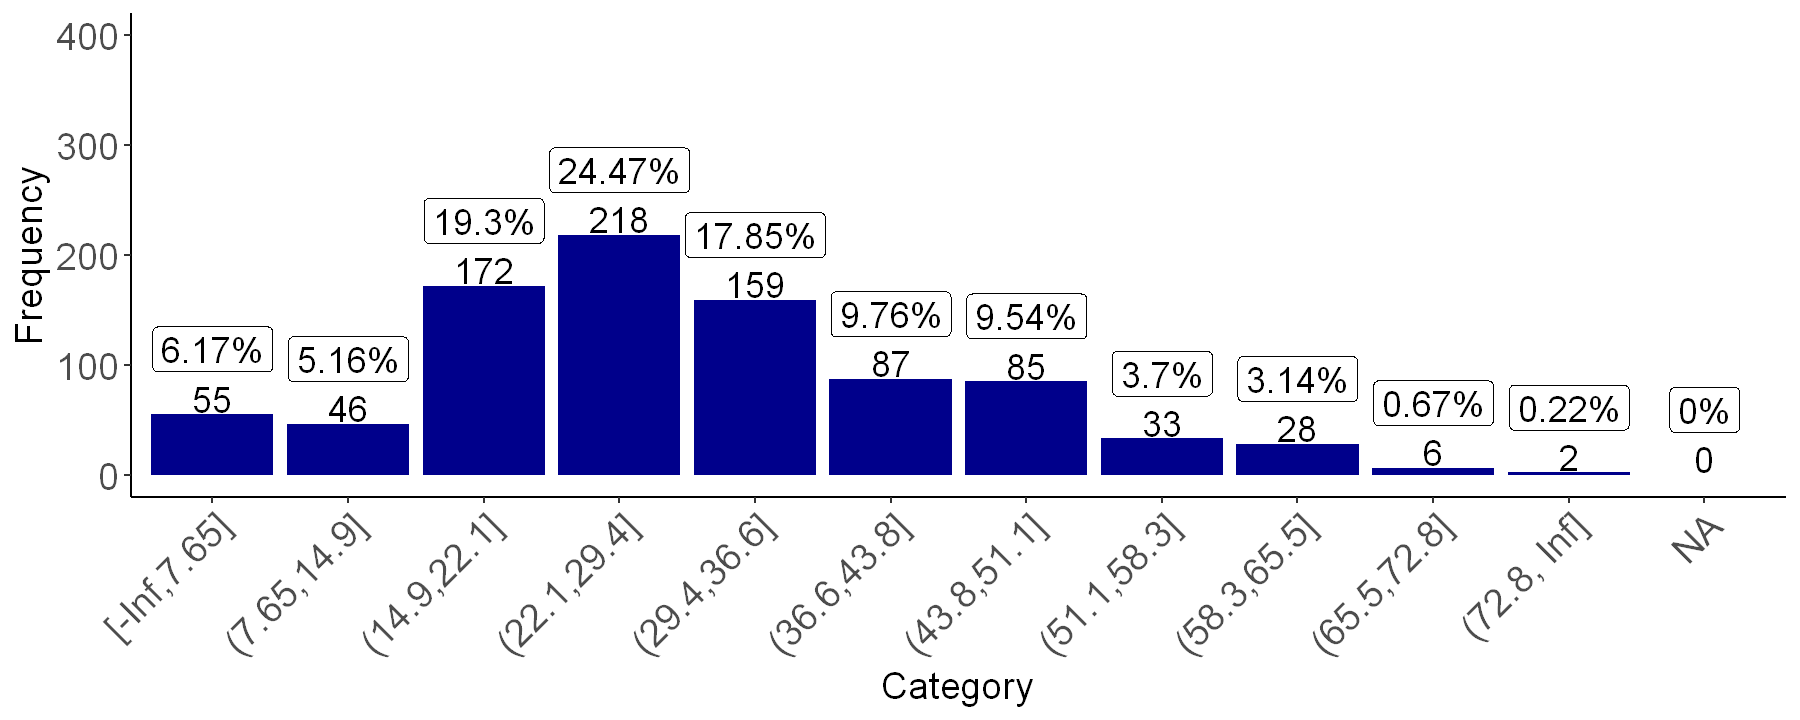

In [95]:
grafico_tab_frequencia3(table_count_prop=table_count_propAge_t_missing_categ,
                       nome_variavel='Age_t_missing_categ',
                       cor_grafico='darkblue',
                       size=5,
                       angle=45,tx1=0.8,tx2=1.2,
                       legend=TRUE,percentage=TRUE,count=TRUE)
gg_count_propAge_t_missing_categ <- gg_count_propAge_t_missing_categ + theme(axis.text=element_text(size=15),
                                                            axis.title=element_text(size=15)) +
                                                            coord_cartesian(ylim=c(0,400))
gg_count_propAge_t_missing_categ

Essa aplicação gerou novos dados para os indivíduos que não tinham as suas idades preenchidas. A utilização do pacote mice permitiu que isso fosse feito considerando o perfil de cada indivíduo, o que deixou o novo histograma com uma distribuição mais simétrica. Portanto, essa ténica foi escolhida como tratamento de dados para a variável Age.

In [96]:
df <- select(df,-c('Age_t_missing','Age_t_missing_categ')) # drop columns Age_t_missing, Age_t_missing_categ

# Cria tabelas finais (com dados tratados)

In [97]:
saveRDS(df,file="df_tidy.rda")
saveRDS(df[df[['Sample']] == 'train',],
        file="train_tidy.rda")
saveRDS(df[df[['Sample']] == 'test',],
        file="test_tidy.rda")

In [98]:
df_tidy <- readRDS(file="df_tidy.rda")
train_tidy <- readRDS(file="train_tidy.rda")
test_tidy <- readRDS(file="test_tidy.rda")

# Tabela de Metadados (Foco em Modelagem Estatística/Machine Learning)

In [99]:
vector_vars_drop <- c('PassengerId','Name','Ticket','Sample')

In [100]:
tabela_metadados(tabela_de_entrada = train_tidy,
                 sufixo_da_tabela_saida = 'train_tidy',
                 vector_vars_drop = vector_vars_drop)

index,columns,class,nunique,nunique_with_na,na_value_count,p_na_value_count,p_mode_value_natoo,p_mode_value_notna,drop
<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
1,PassengerId,factor,891,891,0,0.000000000,0.001122334456,0.001122334456,TRUE
2,Survived,factor,2,2,0,0.000000000,0.616161616162,0.616161616162,FALSE
3,Pclass,ordered; factor,3,3,0,0.000000000,0.551066217733,0.551066217733,FALSE
4,Name,character,891,891,0,0.000000000,0.001122334456,0.001122334456,TRUE
5,Sex,factor,2,2,0,0.000000000,0.647586980920,0.647586980920,FALSE
6,Age,numeric,89,89,0,0.000000000,0.057239057239,0.057239057239,FALSE
7,SibSp,integer,7,7,0,0.000000000,0.682379349046,0.682379349046,FALSE
8,Parch,integer,7,7,0,0.000000000,0.760942760943,0.760942760943,FALSE
9,Ticket,character,681,681,0,0.000000000,0.007856341190,0.007856341190,TRUE


In [101]:
tabela_metadados(tabela_de_entrada = test_tidy,
                 sufixo_da_tabela_saida = 'test_tidy',
                 vector_vars_drop = vector_vars_drop)

index,columns,class,nunique,nunique_with_na,na_value_count,p_na_value_count,p_mode_value_natoo,p_mode_value_notna,drop
<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
1,PassengerId,factor,418,418,0,0.0000000000,0.002392344498,0.002392344498,TRUE
2,Survived,factor,0,1,418,1.0000000000,1.000000000000,Inf,FALSE
3,Pclass,ordered; factor,3,3,0,0.0000000000,0.521531100478,0.521531100478,FALSE
4,Name,character,418,418,0,0.0000000000,0.002392344498,0.002392344498,TRUE
5,Sex,factor,2,2,0,0.0000000000,0.636363636364,0.636363636364,FALSE
6,Age,numeric,80,80,0,0.0000000000,0.052631578947,0.052631578947,FALSE
7,SibSp,integer,7,7,0,0.0000000000,0.677033492823,0.677033492823,FALSE
8,Parch,integer,8,8,0,0.0000000000,0.775119617225,0.775119617225,FALSE
9,Ticket,character,363,363,0,0.0000000000,0.011961722488,0.011961722488,TRUE


In [102]:
tabela_metadados(tabela_de_entrada = df_tidy,
                 sufixo_da_tabela_saida = 'df_tidy',
                 vector_vars_drop = vector_vars_drop)

index,columns,class,nunique,nunique_with_na,na_value_count,p_na_value_count,p_mode_value_natoo,p_mode_value_notna,drop
<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
1,PassengerId,factor,1309,1309,0,0.0000000000,0.0007639419404,0.0007639419404,TRUE
2,Survived,factor,2,3,418,0.3193277311,0.4194041252865,0.6161616161616,FALSE
3,Pclass,ordered; factor,3,3,0,0.0000000000,0.5416348357525,0.5416348357525,FALSE
4,Name,character,1307,1307,0,0.0000000000,0.0015278838808,0.0015278838808,TRUE
5,Sex,factor,2,2,0,0.0000000000,0.6440030557678,0.6440030557678,FALSE
6,Age,numeric,98,98,0,0.0000000000,0.0557677616501,0.0557677616501,FALSE
7,SibSp,integer,7,7,0,0.0000000000,0.6806722689076,0.6806722689076,FALSE
8,Parch,integer,8,8,0,0.0000000000,0.7654698242934,0.7654698242934,FALSE
9,Ticket,character,929,929,0,0.0000000000,0.0084033613445,0.0084033613445,TRUE


Retira as variáveis com drop == TRUE

In [103]:
df_tidy_ml <- df_tidy[,metadata_table_df_tidy[!metadata_table_df_tidy[['drop']],'columns']]
train_tidy_ml <- train_tidy[,metadata_table_train_tidy[!metadata_table_train_tidy[['drop']],'columns']]
test_tidy_ml <- test_tidy[,metadata_table_test_tidy[!metadata_table_test_tidy[['drop']],'columns']]


Transforma os NA das covariáveis em strings 'NA'

In [104]:
columns_add_missing_level <- colnames(df_tidy_ml)[apply(is.na(df_tidy_ml),2,any)]
columns_add_missing_level

[1] "Survived" "Cabin"

Survived

In [105]:
levels(df_tidy_ml[['Survived']]) <- c('bad','good') # factor(c('1','0'))
levels(train_tidy_ml[['Survived']]) <- c('bad','good') # factor(c('1','0'))
levels(train_tidy_ml[['Survived']]) <- c('bad','good') # factor(c('1','0'))

Cabin

In [106]:
for(j in 2:length(columns_add_missing_level)){
    df_tidy_ml[[columns_add_missing_level[j]]] <- addNA(df_tidy_ml[[columns_add_missing_level[j]]])
    levels(df_tidy_ml[[columns_add_missing_level[j]]])[length(levels(df_tidy_ml[[columns_add_missing_level[j]]]))] <- 'NA'

    train_tidy_ml[[columns_add_missing_level[j]]] <- addNA(train_tidy_ml[[columns_add_missing_level[j]]])
    levels(train_tidy_ml[[columns_add_missing_level[j]]])[length(levels(train_tidy_ml[[columns_add_missing_level[j]]]))] <- 'NA'

    test_tidy_ml[[columns_add_missing_level[j]]] <- addNA(test_tidy_ml[[columns_add_missing_level[j]]])
    levels(test_tidy_ml[[columns_add_missing_level[j]]])[length(levels(test_tidy_ml[[columns_add_missing_level[j]]]))] <- 'NA'
}


In [107]:
str(train_tidy_ml)

'data.frame':	891 obs. of  9 variables:
 $ Survived: Factor w/ 2 levels "bad","good": 2 1 1 1 2 2 2 2 1 1 ...
 $ Pclass  : Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 34 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin   : Factor w/ 2 levels "AnyCabin","NA": 2 1 2 1 2 2 1 2 2 2 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


In [108]:
str(test_tidy_ml)

'data.frame':	418 obs. of  9 variables:
 $ Survived: Factor w/ 2 levels "1","0": NA NA NA NA NA NA NA NA NA NA ...
 $ Pclass  : Ord.factor w/ 3 levels "1"<"2"<"3": 3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age     : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch   : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Fare    : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin   : Factor w/ 2 levels "AnyCabin","NA": 2 2 2 2 2 2 2 2 2 2 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


In [109]:
str(df_tidy_ml)

'data.frame':	1309 obs. of  9 variables:
 $ Survived: Factor w/ 2 levels "bad","good": 2 1 1 1 2 2 2 2 1 1 ...
 $ Pclass  : Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 34 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin   : Factor w/ 2 levels "AnyCabin","NA": 2 1 2 1 2 2 1 2 2 2 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


In [110]:
#saveRDS(df_tidy_ml,file="df_tidy_ml.rda")
saveRDS(train_tidy_ml,
        file="train_tidy_ml.rda")
saveRDS(test_tidy_ml,
        file="test_tidy_ml.rda")

In [4]:
#df_tidy_ml <- readRDS(file="df_tidy_ml.rda")
train_tidy_ml <- readRDS(file="train_tidy_ml.rda")
test_tidy_ml <- readRDS(file="test_tidy_ml.rda")

# Feature Selection

In [5]:
fit1 <- glm(Survived ~ .,  data = train_tidy_ml,
            family = binomial(link = "logit"))
summary(fit1)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = train_tidy_ml)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.473  -0.619   0.405   0.621   2.591  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50451    0.44030   -7.96  1.7e-15 ***
Pclass.L     1.02000    0.28527    3.58  0.00035 ***
Pclass.Q     0.37891    0.20833    1.82  0.06895 .  
Sexmale      2.70663    0.20169   13.42  < 2e-16 ***
Age          0.03195    0.00731    4.37  1.2e-05 ***
SibSp        0.33318    0.10882    3.06  0.00220 ** 
Parch        0.10854    0.11883    0.91  0.36103    
Fare        -0.00207    0.00247   -0.84  0.40025    
CabinNA      0.90103    0.33306    2.71  0.00682 ** 
EmbarkedQ    0.02356    0.38134    0.06  0.95073    
 [ reached getOption("max.print") -- omitted 1 row ]
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118

In [6]:
## Selecionando covariáveis: Método stepwise
fit1_featureselection <- step(fit1, direction = "both")
print(fit1_featureselection)

Start:  AIC=803
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Cabin + 
    Embarked

           Df Deviance  AIC
- Fare      1      782  802
- Parch     1      782  802
<none>             781  803
- Embarked  2      786  804
- Cabin     1      789  809
- SibSp     1      792  812
- Age       1      801  821
- Pclass    2      811  829
- Sex       1     1007 1027

Step:  AIC=802
Survived ~ Pclass + Sex + Age + SibSp + Parch + Cabin + Embarked

           Df Deviance  AIC
- Parch     1      783  801
<none>             782  802
- Embarked  2      787  803
+ Fare      1      781  803
- Cabin     1      790  808
- SibSp     1      792  810
- Age       1      803  821
- Pclass    2      817  833
- Sex       1     1011 1029

Step:  AIC=801
Survived ~ Pclass + Sex + Age + SibSp + Cabin + Embarked

           Df Deviance  AIC
<none>             783  801
- Embarked  2      788  802
+ Parch     1      782  802
+ Fare      1      782  802
- Cabin     1      790  806
- SibSp     1      796

In [7]:
fit1_featureselection %>% str()

List of 31
 $ coefficients     : Named num [1:9] -3.5417 1.1298 0.3393 2.6808 0.0322 ...
  ..- attr(*, "names")= chr [1:9] "(Intercept)" "Pclass.L" "Pclass.Q" "Sexmale" ...
 $ residuals        : Named num [1:891] 1.08 -1.07 -1.67 -1.11 1.08 ...
  ..- attr(*, "names")= chr [1:891] "1" "2" "3" "4" ...
 $ fitted.values    : Named num [1:891] 0.9236 0.067 0.4 0.0952 0.9286 ...
  ..- attr(*, "names")= chr [1:891] "1" "2" "3" "4" ...
 $ effects          : Named num [1:891] -4.398 5.104 -0.646 13.247 -3.837 ...
  ..- attr(*, "names")= chr [1:891] "(Intercept)" "Pclass.L" "Pclass.Q" "Sexmale" ...
 $ R                : num [1:9, 1:9] -11.2 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "(Intercept)" "Pclass.L" "Pclass.Q" "Sexmale" ...
  .. ..$ : chr [1:9] "(Intercept)" "Pclass.L" "Pclass.Q" "Sexmale" ...
 $ rank             : int 9
 $ qr               :List of 5
  ..$ qr   : num [1:891, 1:9] -11.1672 0.0224 0.0439 0.0263 0.0231 ...
  .. ..- attr(*, "dimnames")=List of 2
  

In [8]:
fit1_featureselection$call

glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Cabin + 
    Embarked, family = binomial(link = "logit"), data = train_tidy_ml)

In [9]:
fit1_featureselection$model %>% colnames()

[1] "Survived" "Pclass"   "Sex"      "Age"      "SibSp"    "Cabin"    "Embarked"

In [10]:
summary(fit1_featureselection)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Cabin + 
    Embarked, family = binomial(link = "logit"), data = train_tidy_ml)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.437  -0.619   0.402   0.617   2.588  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.54174    0.41253   -8.59  < 2e-16 ***
Pclass.L     1.12976    0.26055    4.34  1.5e-05 ***
Pclass.Q     0.33934    0.20357    1.67  0.09552 .  
Sexmale      2.68076    0.19599   13.68  < 2e-16 ***
Age          0.03220    0.00728    4.42  9.8e-06 ***
SibSp        0.34528    0.10373    3.33  0.00087 ***
CabinNA      0.88361    0.32844    2.69  0.00714 ** 
EmbarkedQ    0.01212    0.37819    0.03  0.97443    
EmbarkedS    0.47814    0.23616    2.02  0.04291 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  782.61  o

In [11]:
print(anova(fit1_featureselection, test = "Chisq"))

Analysis of Deviance Table

Model: binomial, link: logit

Response: Survived

Terms added sequentially (first to last)


         Df Deviance Resid. Df Resid. Dev Pr(>Chi)    
NULL                       890       1187             
Pclass    2    103.5       888       1083  < 2e-16 ***
Sex       1    256.2       887        827  < 2e-16 ***
Age       1     15.9       886        811  6.6e-05 ***
SibSp     1     16.2       885        795  5.6e-05 ***
Cabin     1      6.8       884        788   0.0093 ** 
Embarked  2      5.4       882        783   0.0680 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [12]:
## Fator de influência na variância (VIF) acima de 5 ou 10 indica problema
# VIF measures the correlation and strength of correlation between the predictor variables in a regression model.
# A value of 1 indicates there is no correlation between a given predictor variable and any other predictor variables in the model.
# A value between 1 and 5 indicates moderate correlation between a given predictor variable and other predictor variables in the model, but this is often not severe enough to require attention.
# A value greater than 5 indicates potentially severe correlation between a given predictor variable and other predictor variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

# Note that a correlation matrix and a VIF will provide you with similar information:
# they both tell you when one variable is highly correlated with one or more other variables in a regression model.
print(car::vif(fit1_featureselection))

         GVIF Df GVIF^(1/(2*Df))
Pclass   3.38  2            1.36
Sex      1.15  1            1.07
Age      1.37  1            1.17
SibSp    1.17  1            1.08
Cabin    2.55  1            1.60
Embarked 1.22  2            1.05


# Seleção do Modelo Preditivo

In [13]:
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"

In [14]:
names(getModelInfo())

[1] "ada"            "AdaBag"         "AdaBoost.M1"    "adaboost"      
 [5] "amdai"          "ANFIS"          "avNNet"         "awnb"          
 [9] "awtan"          "bag"            "bagEarth"       "bagEarthGCV"   
[13] "bagFDA"         "bagFDAGCV"      "bam"            "bartMachine"   
[17] "bayesglm"       "binda"          "blackboost"     "blasso"        
[21] "blassoAveraged" "bridge"         "brnn"           "BstLm"         
[25] "bstSm"          "bstTree"        "C5.0"           "C5.0Cost"      
[29] "C5.0Rules"      "C5.0Tree"       "cforest"        "chaid"         
[33] "CSimca"         "ctree"          "ctree2"         "cubist"        
[37] "dda"            "deepboost"      "DENFIS"         "dnn"           
[41] "dwdLinear"      "dwdPoly"        "dwdRadial"      "earth"         
[45] "elm"            "enet"           "evtree"         "extraTrees"    
[49] "fda"            "FH.GBML"       
 [ reached getOption("max.print") -- omitted 188 entries ]

Warning message:
"'trials' should be <= 7 for this object. Predictions generated using 7 trials"
Warning message:
"'trials' should be <= 7 for this object. Predictions generated using 7 trials"
Warning message:
"'trials' should be <= 7 for this object. Predictions generated using 7 trials"
Warning message:
"'trials' should be <= 6 for this object. Predictions generated using 6 trials"


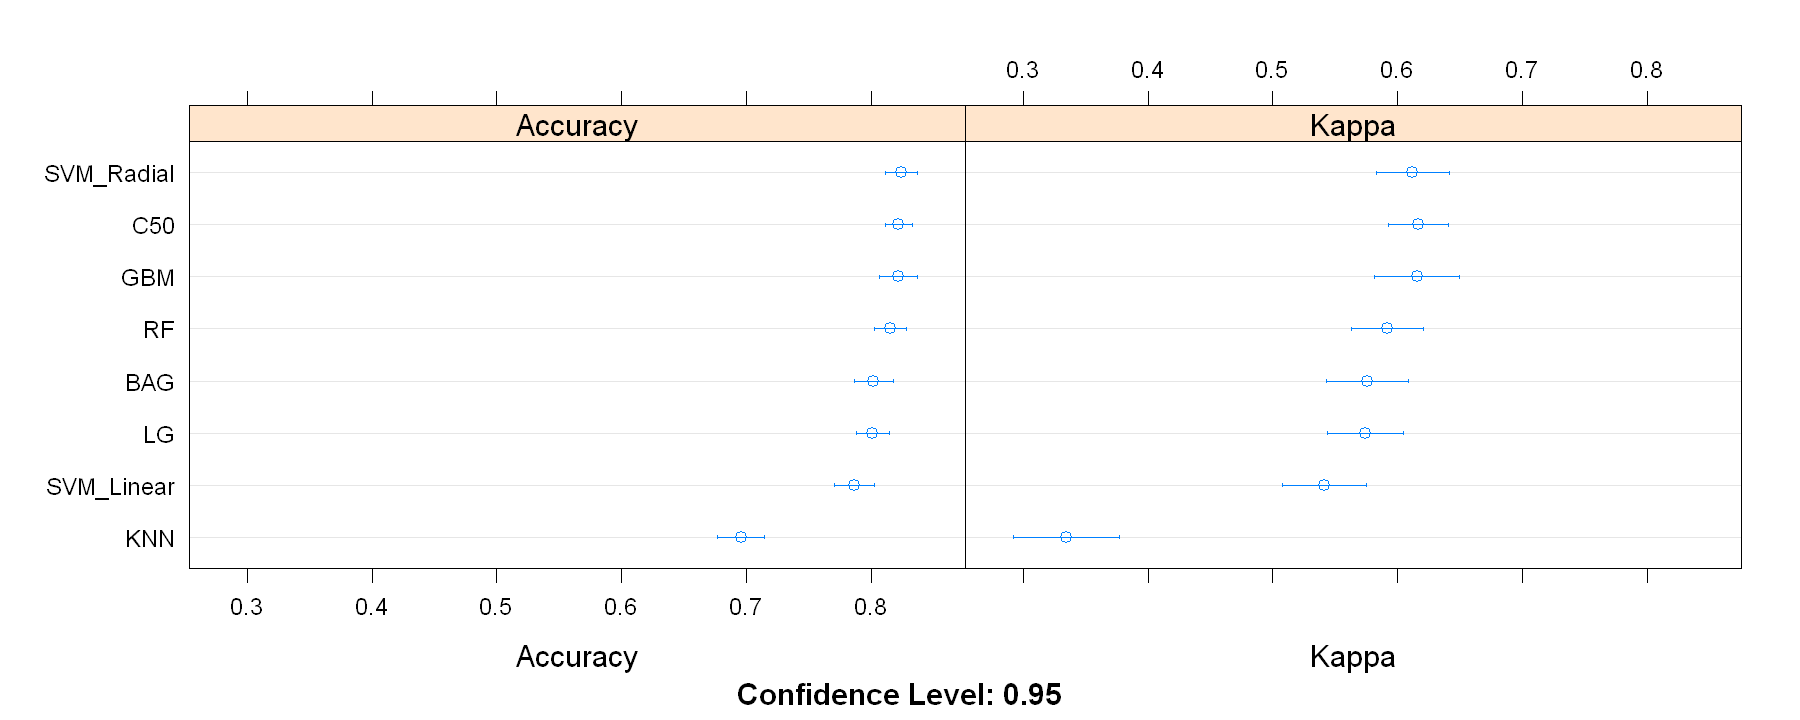

In [15]:
set.seed(7)
fit.glm1 <- train(Survived~., data=train_tidy_ml, method="glm", metric=metric, trControl=trainControl)
fit.knn1 <- train(Survived~., data=train_tidy_ml, method="knn", metric=metric, trControl=trainControl)
fit.svm1 <- train(Survived~., data=train_tidy_ml, method="svmLinear", metric=metric,trControl=trainControl) # Support Vector Machines with Radial Linear Kernel
fit.svm2 <- train(Survived~., data=train_tidy_ml, method="svmRadial", metric=metric,trControl=trainControl) # Support Vector Machines with Radial Basis Function Kernel

# Bagging:
fit.treebag <- train(Survived~., data=train_tidy_ml, method="treebag", metric=metric,trControl=trainControl) # BAG: Bagged CART (Técnicas de bootstrap)
fit.rf <- train(Survived~., data=train_tidy_ml, method="rf", metric=metric,trControl=trainControl) # RF: Random Forest (Combina diversas árvores de decisão e adiciona um componente estocástico)
# Boosting:
fit.gbm <- train(Survived~., data=train_tidy_ml, method="gbm", metric=metric, trControl=trainControl, verbose=FALSE) # GBM: Stochastic Gradient Boosting (Extensão do Adaboost)
fit.c50 <- train(Survived~., data=train_tidy_ml, method="C5.0", metric=metric, trControl=trainControl) # C5.0

results <- resamples(list(LG=fit.glm1, KNN=fit.knn1, SVM_Linear=fit.svm1,SVM_Radial=fit.svm2,
                        BAG=fit.treebag, RF=fit.rf,
                        GBM=fit.gbm, C50=fit.c50))

dotplot(results)

# Otimização do Modelo - Ajuste de Hyperparâmetros

In [16]:
grid <- expand.grid(.sigma=c(0.025, 0.05, 0.1, 0.15), .C=seq(1, 10, by=1))
fit.svm_final <- train(Survived~., data=train_tidy_ml, method="svmRadial", metric=metric, tuneGrid=grid, trControl=trainControl)
print(fit.svm_final)

Support Vector Machines with Radial Basis Function Kernel 

891 samples
  8 predictor
  2 classes: 'bad', 'good' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 802, 801, 801, 802, 803, 802, ... 
Resampling results across tuning parameters:

  sigma  C   Accuracy  Kappa
  0.025   1  0.810     0.587
  0.025   2  0.819     0.605
  0.025   3  0.816     0.597
  0.025   4  0.820     0.604
  0.025   5  0.820     0.603
  0.025   6  0.822     0.607
  0.025   7  0.820     0.602
  0.025   8  0.821     0.603
  0.025   9  0.821     0.604
  0.025  10  0.819     0.600
  0.050   1  0.816     0.596
  0.050   2  0.822     0.607
 [ reached getOption("max.print") -- omitted 28 rows ]

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1 and C = 2.


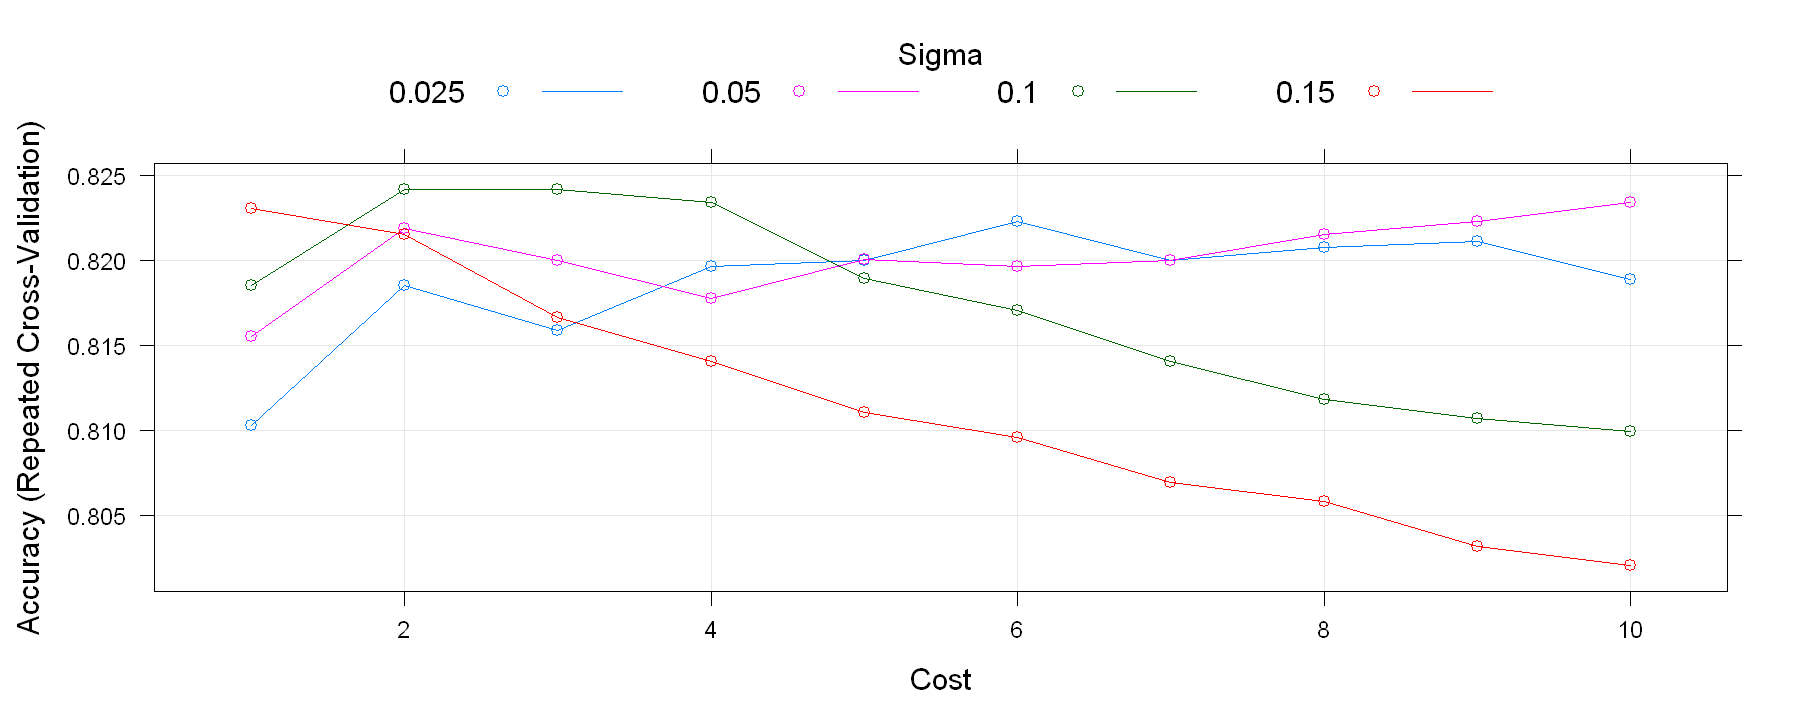

In [17]:
plot(fit.svm_final)

# Split em treino e teste

In [18]:
set.seed(1234)
indxTrain <- sample(1:dim(train_tidy_ml)[1], round(dim(train_tidy_ml)[1]*0.75,0))
train_final <- train_tidy_ml[indxTrain,]
test_final <- train_tidy_ml[-indxTrain,]
train_final %>% dim()
test_final %>% dim()

[1] 668   9

[1] 223   9

# Métricas para Algoritmos de Classificação

In [19]:
train_final$predictions <- predict(object=fit.svm_final, newdata=train_final, type="raw")
test_final$predictions <- predict(object=fit.svm_final, newdata=test_final, type="raw")

In [20]:
cM_train_final <- confusionMatrix(train_final$predictions, train_final$Survived)
cM_test_final <- confusionMatrix(test_final$predictions, test_final$Survived)

In [21]:
cM_train_final

Confusion Matrix and Statistics

          Reference
Prediction bad good
      bad  188   24
      good  76  380
                                        
               Accuracy : 0.85          
                 95% CI : (0.821, 0.877)
    No Information Rate : 0.605         
    P-Value [Acc > NIR] : < 2e-16       
                                        
                  Kappa : 0.676         
                                        
 Mcnemar's Test P-Value : 3.4e-07       
                                        
            Sensitivity : 0.712         
            Specificity : 0.941         
         Pos Pred Value : 0.887         
         Neg Pred Value : 0.833         
             Prevalence : 0.395         
         Detection Rate : 0.281         
   Detection Prevalence : 0.317         
      Balanced Accuracy : 0.826         
                                        
       'Positive' Class : bad           
                                        

In [22]:
cM_test_final

Confusion Matrix and Statistics

          Reference
Prediction bad good
      bad   50    7
      good  28  138
                                        
               Accuracy : 0.843         
                 95% CI : (0.789, 0.888)
    No Information Rate : 0.65          
    P-Value [Acc > NIR] : 1.05e-10      
                                        
                  Kappa : 0.632         
                                        
 Mcnemar's Test P-Value : 0.000723      
                                        
            Sensitivity : 0.641         
            Specificity : 0.952         
         Pos Pred Value : 0.877         
         Neg Pred Value : 0.831         
             Prevalence : 0.350         
         Detection Rate : 0.224         
   Detection Prevalence : 0.256         
      Balanced Accuracy : 0.796         
                                        
       'Positive' Class : bad           
                                        

Warning message in cvms::plot_confusion_matrix(as_tibble(cM_train_final$table), :
"'ggimage' is missing. Will not plot arrows and zero-shading."
Warning message in cvms::plot_confusion_matrix(as_tibble(cM_train_final$table), :
"'rsvg' is missing. Will not plot arrows and zero-shading."


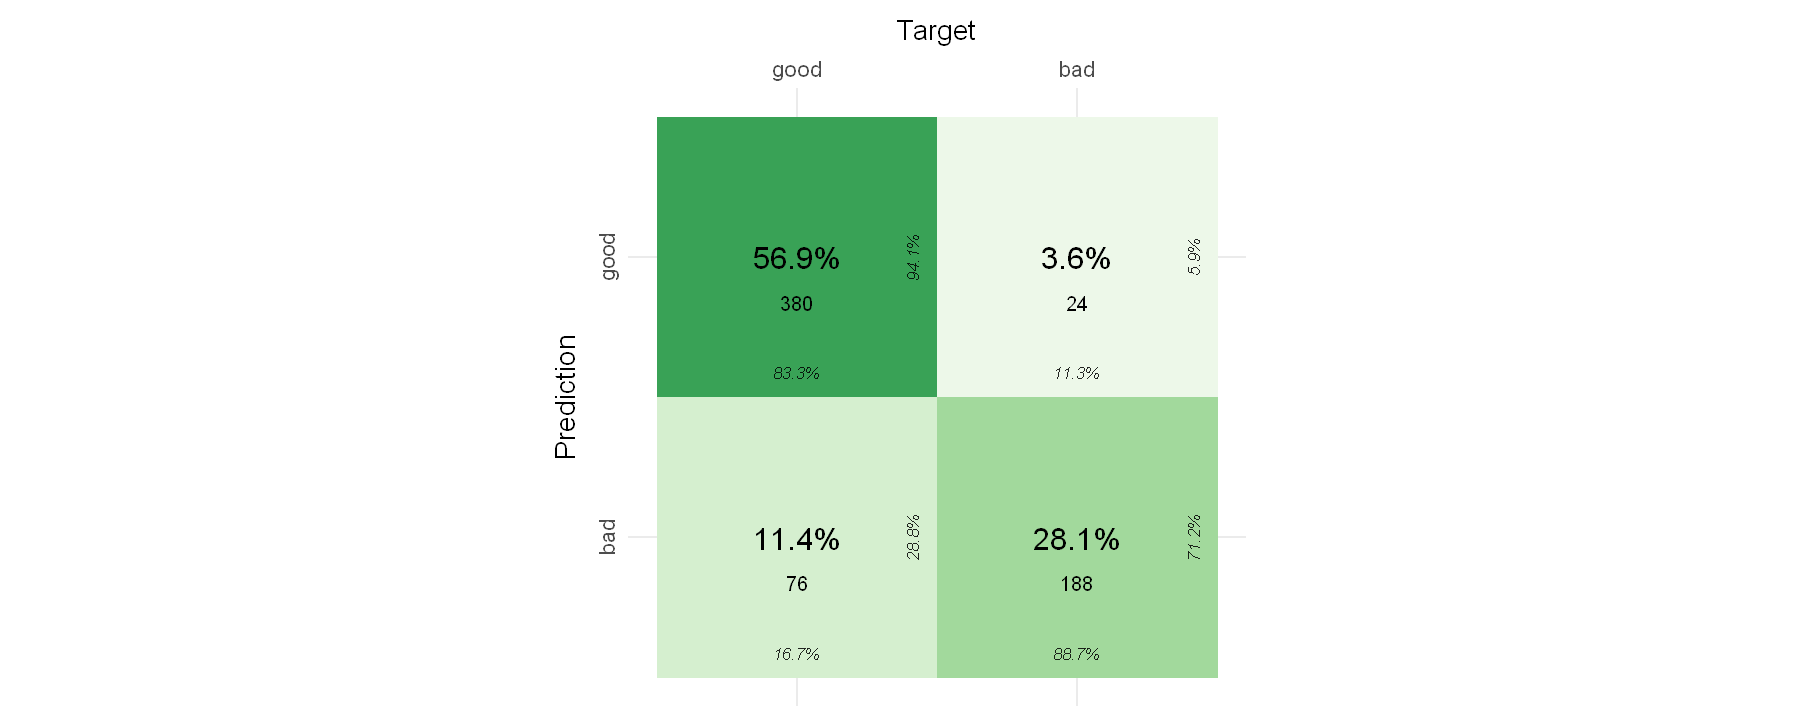

In [23]:
cvms::plot_confusion_matrix(as_tibble(cM_train_final$table), 
                      target_col = "Prediction", 
                      prediction_col = "Reference",
                      counts_col = "n",
                      palette = "Greens")

Warning message in cvms::plot_confusion_matrix(as_tibble(cM_test_final$table), target_col = "Prediction", :
"'ggimage' is missing. Will not plot arrows and zero-shading."
Warning message in cvms::plot_confusion_matrix(as_tibble(cM_test_final$table), target_col = "Prediction", :
"'rsvg' is missing. Will not plot arrows and zero-shading."


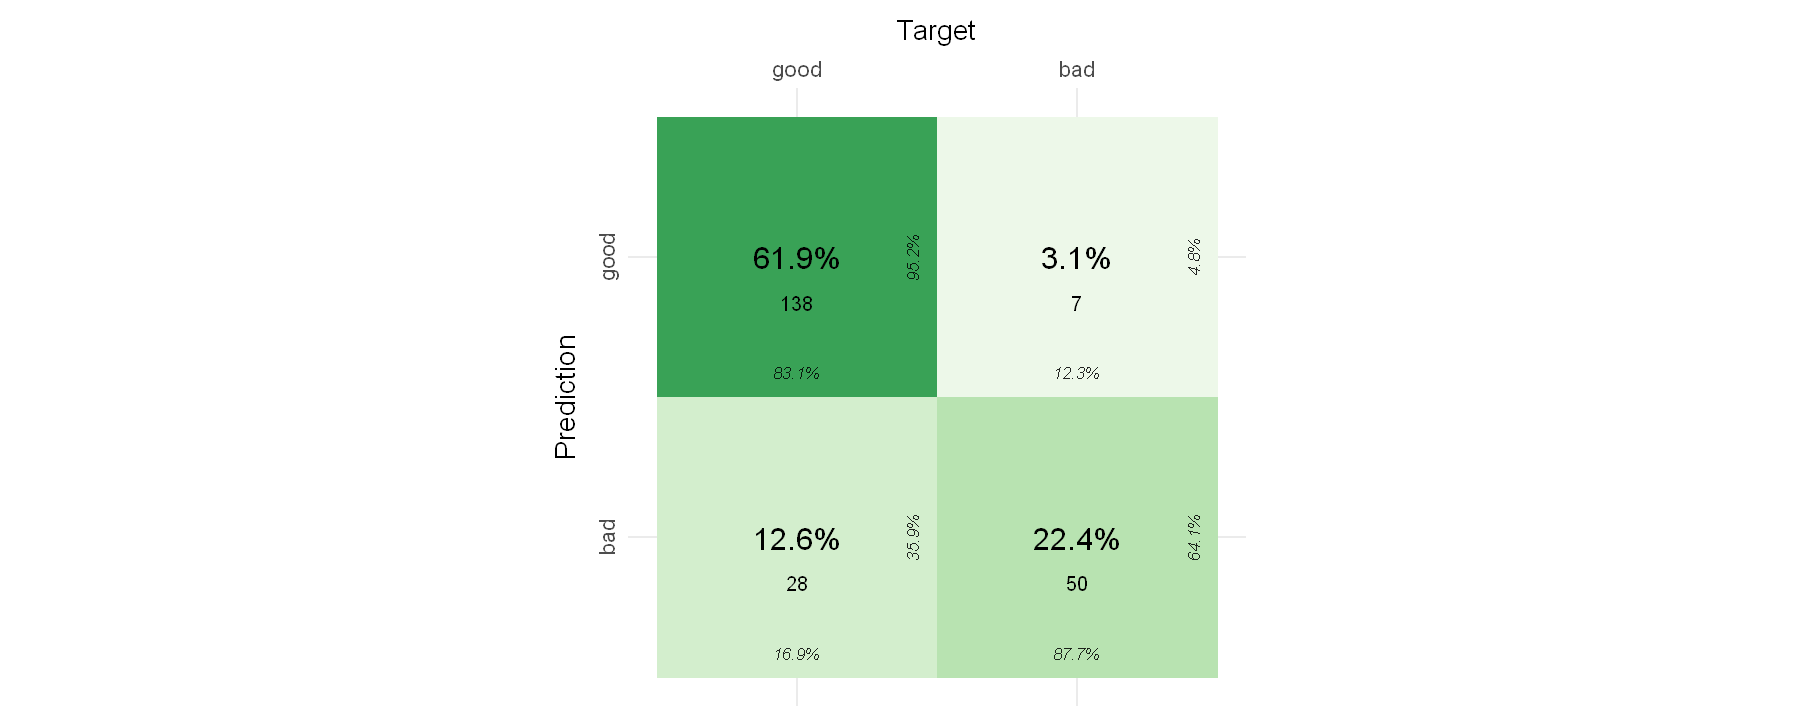

In [24]:
cvms::plot_confusion_matrix(as_tibble(cM_test_final$table), 
                      target_col = "Prediction", 
                      prediction_col = "Reference",
                      counts_col = "n",
                      palette = "Greens")

In [25]:
round(cbind(cM_overall_train_final=cM_train_final$overall,
        cM_overall_test_final=cM_test_final$overall),4)

,cM_overall_train_final,cM_overall_test_final
Accuracy,0.850,0.8430
Kappa,0.676,0.6321
AccuracyLower,0.821,0.7885
AccuracyUpper,0.876,0.8882
AccuracyNull,0.605,0.6502
AccuracyPValue,0.000,0.0000
McnemarPValue,0.000,0.0007


In [26]:
round(cbind(cM_overall_train_final=cM_train_final$byClass,
        cM_overall_test_final=cM_test_final$byClass),4)

,cM_overall_train_final,cM_overall_test_final
Sensitivity,0.712,0.641
Specificity,0.941,0.952
Pos Pred Value,0.887,0.877
Neg Pred Value,0.833,0.831
Precision,0.887,0.877
Recall,0.712,0.641
F1,0.790,0.741
Prevalence,0.395,0.350
Detection Rate,0.281,0.224
Detection Prevalence,0.317,0.256


# Salvando o resultado do seu trabalho

In [27]:
saveRDS(fit.svm_final,file="modelo_classificador_final.rda")

In [28]:
modelo_classificador_final <- readRDS(file="modelo_classificador_final.rda")

In [29]:
modelo_classificador_final

Support Vector Machines with Radial Basis Function Kernel 

891 samples
  8 predictor
  2 classes: 'bad', 'good' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 802, 801, 801, 802, 803, 802, ... 
Resampling results across tuning parameters:

  sigma  C   Accuracy  Kappa
  0.025   1  0.810     0.587
  0.025   2  0.819     0.605
  0.025   3  0.816     0.597
  0.025   4  0.820     0.604
  0.025   5  0.820     0.603
  0.025   6  0.822     0.607
  0.025   7  0.820     0.602
  0.025   8  0.821     0.603
  0.025   9  0.821     0.604
  0.025  10  0.819     0.600
  0.050   1  0.816     0.596
  0.050   2  0.822     0.607
 [ reached getOption("max.print") -- omitted 28 rows ]

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1 and C = 2.

In [30]:
final_predict <- predict(modelo_classificador_final, newdata = test_tidy_ml, type = "raw")
final_predict <- ifelse(final_predict == 'bad',1,0)
final_predict

[1] 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
[39] 0 0 0 0 0 1 1 0 0 0 1 0
 [ reached getOption("max.print") -- omitted 368 entries ]

In [31]:
test <- read.csv("../../test.csv",
                 sep=",", stringsAsFactors = FALSE,
                 na.strings = "")

In [32]:
predict_submission <- data.frame(PassengerId=test$PassengerId,Survived=final_predict)
#write.csv(predict_submission,'predict_submission.csv',row.names = FALSE,fileEncoding = "utf-8", quote = FALSE)
write_csv(predict_submission,'predict_submission.csv')

In [33]:
predict_submission

PassengerId,Survived
<int>,<dbl>
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
...,...
